# **Exponential Distribuiton**

## *Functions Implementation*

In [ ]:
# These functions is to generate a time value adhering to an exponential distribution

import random
import math
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


def generate_time_exponential(start_time, end_time, lambda_val, flipped=False):
    while True:
        # Generate a random time using exponential distribution
        u = random.random()  # Generate a random number between 0 and 1
        t = -math.log(1-u) / lambda_val  # Compute the random value using the inverse CDF of exponential distribution

        # decide wether it is exponential distribution or flipped exponential distribution
        if(flipped):
          t_exp = end_time - timedelta(seconds=t)  # subtract the computed value from the end time
        else:
          t_exp = start_time + timedelta(seconds=t) # Add the computed value to the start time

        # Ensure the generated time is within the interval [start_time - end_time]
        if start_time <= t_exp <= end_time:
            return t_exp


def run_experiment_exp(num_trials_per_experiment, start_time, end_time, lambda_val, flipped=False):
    experiment_results = []
    for _ in range(num_trials_per_experiment):
        t_exp = generate_time_exponential(start_time, end_time, lambda_val, flipped)
        if t_exp.day != start_time.day:
          sigma = 24
        else:
          sigma = 0
        experiment_results.append((t_exp.hour+sigma) * 60 + t_exp.minute)
    return experiment_results


def run_experiments_exp(num_experiments, num_trials_per_experiment, start_time, end_time, lambda_values, flipped=False):
    all_results = []
    for lambda_val in lambda_values:
        experiment_results = run_experiment_exp(num_trials_per_experiment, start_time, end_time, lambda_val, flipped)
        all_results.append(experiment_results)
    return all_results


def plot_histograms_exp(experiment_results, start_time, end_time, lambda_values):
    if start_time.day != end_time.day:
      sigma = 24
    else:
      sigma = 0
    for i, experiment in enumerate(experiment_results, start=1):
        plt.figure(figsize=(8, 6))
        plt.hist(experiment, bins=range(start_time.hour*60 + start_time.minute - 5, (end_time.hour+sigma)*60 + end_time.minute + 5), edgecolor='black', alpha=0.7)
        start_time_str = start_time.strftime("%I:%M %p")
        end_time_str = end_time.strftime("%I:%M %p")
        plt.xlabel(f"Minutes from {start_time_str} to {end_time_str}")
        plt.ylabel('Frequency')
        plt.title(f'Experiment {i} - lambda = {lambda_values[i-1]}')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

In [ ]:
# These functions is to generate an integer value adhering to an exponential distribution
import random
import math
import matplotlib.pyplot as plt

def generate_integer_exponential(start_val, end_val, lambda_val, flipped=False):
    while True:
        # Generate a random value using exponential distribution
        u = random.random()  # Generate a random number between 0 and 1
        t = -math.log(1-u) / lambda_val  # Compute the random value using the inverse CDF of exponential distribution

        # Decide whether it is exponential distribution or flipped exponential distribution
        if flipped:
            random_value = end_val - int(t)  # Subtract the computed value from the end value
        else:
            random_value = start_val + int(t)  # Add the computed value to the start value

        # Ensure the generated value is within the specified range
        if start_val <= random_value <= end_val:
            return random_value

def run_experiment_exp_int(num_trials_per_experiment, start_val, end_val, lambda_val, flipped=False):
    experiment_results = []
    for _ in range(num_trials_per_experiment):
        t_exp = generate_integer_exponential(start_val, end_val, lambda_val, flipped)
        experiment_results.append(t_exp)
    return experiment_results

def run_experiments_exp_int(num_experiments, num_trials_per_experiment, start_val, end_val, lambda_values, flipped=False):
    all_results = []
    for lambda_val in lambda_values:
        experiment_results = run_experiment_exp_int(num_trials_per_experiment, start_val, end_val, lambda_val, flipped)
        all_results.append(experiment_results)
    return all_results

def plot_histograms_exp_int(experiment_results, start_val, end_val, lambda_values):
    for i, experiment in enumerate(experiment_results, start=1):
        plt.figure(figsize=(8, 6))
        plt.hist(experiment, bins=range(start_val - 5, end_val + 5), edgecolor='black', alpha=0.7)
        plt.xlabel(f"Values from {start_val} to {end_val}")
        plt.ylabel('Frequency')
        plt.title(f'Experiment {i} - lambda = {lambda_values[i-1]}')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

## *t_start_abnormal_early: Selecting the lambda parameter of the exponential distirbution that will be used to draw a value from the interval [03:30 AM - 07:29 AM]*

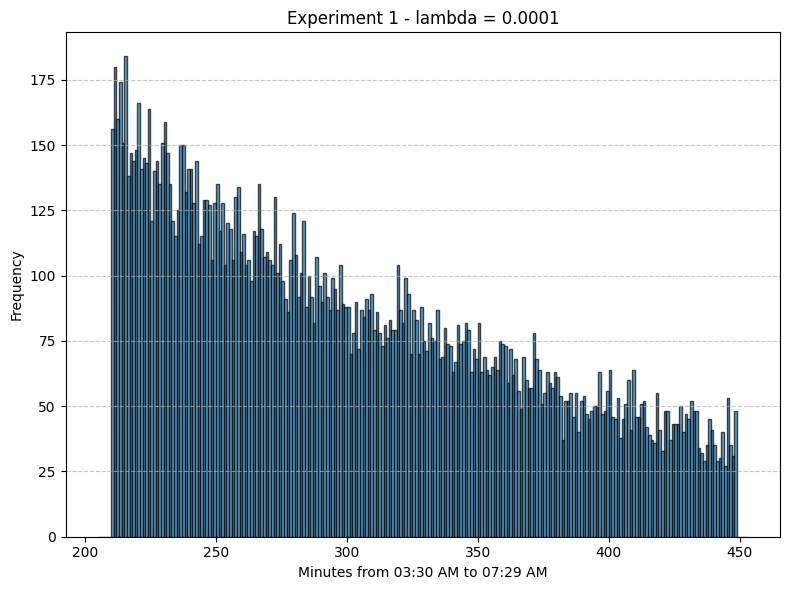

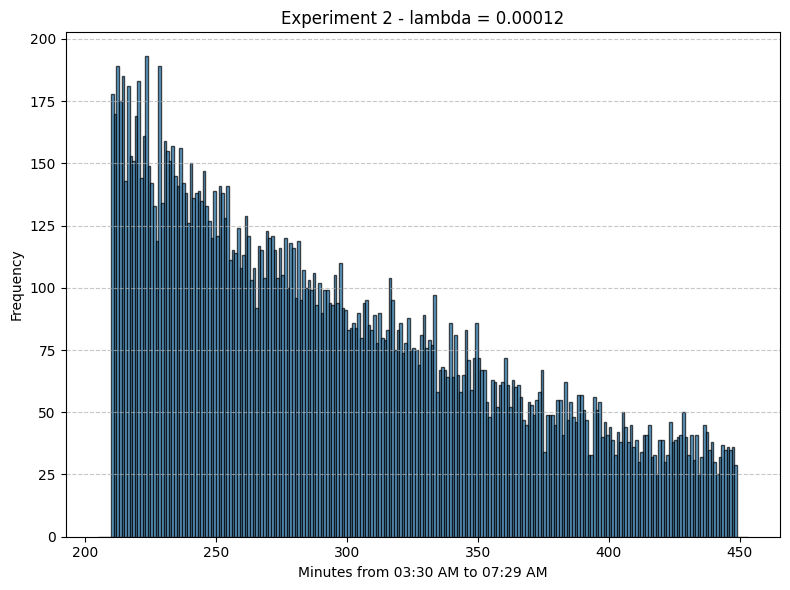

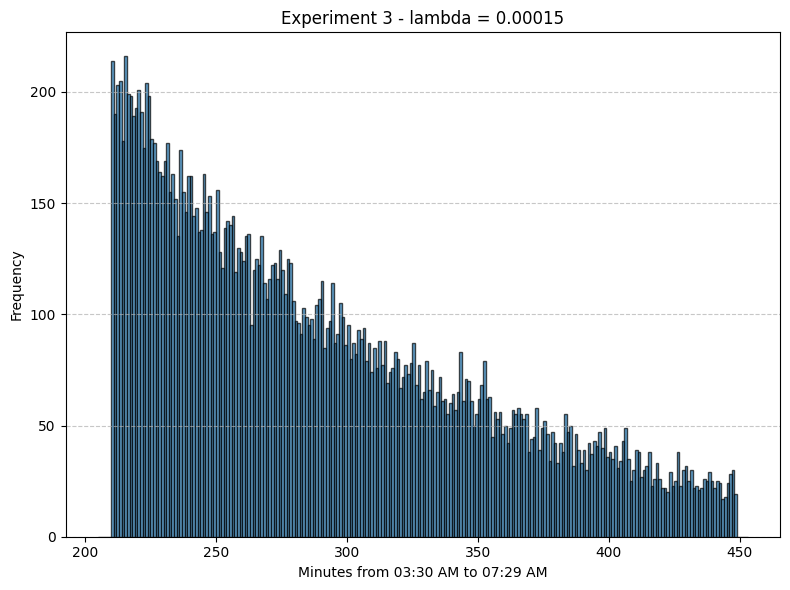

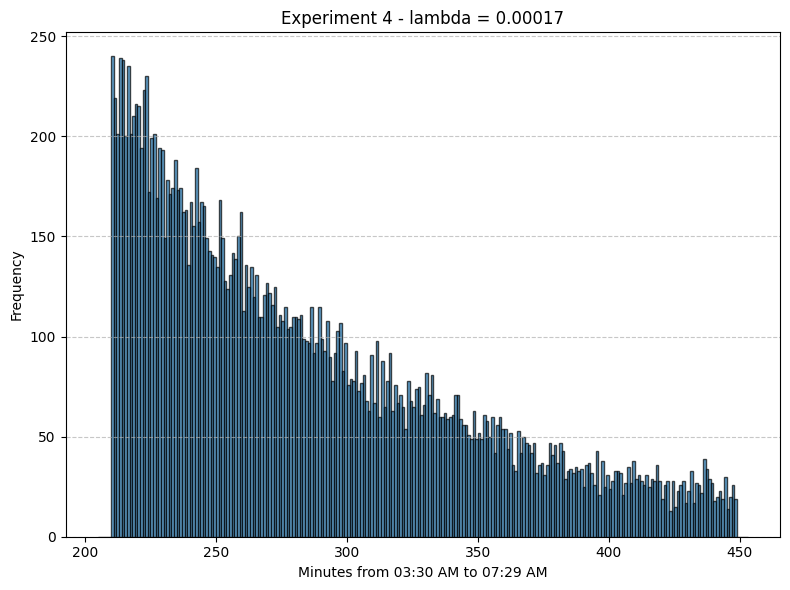

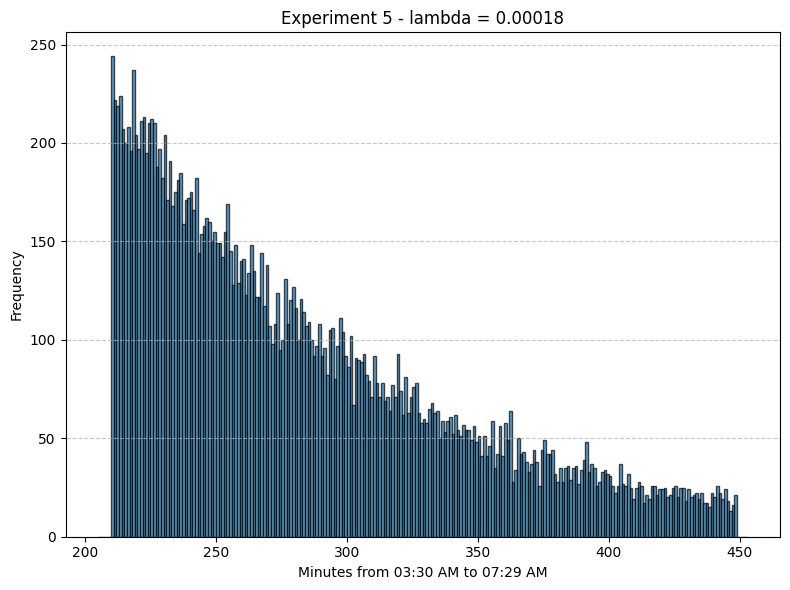

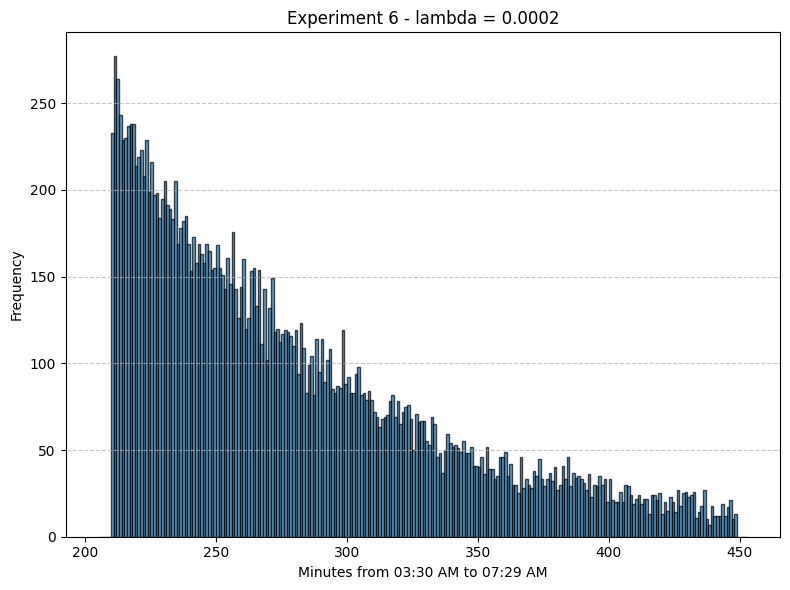

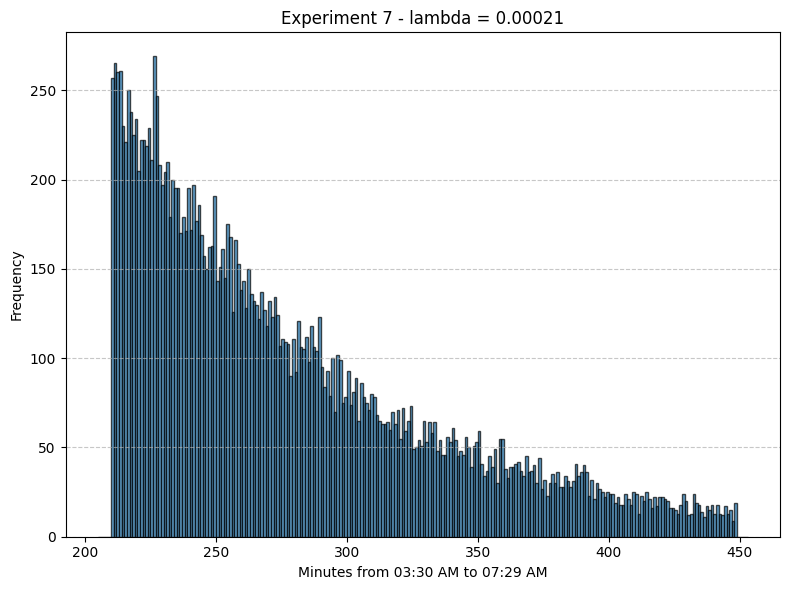

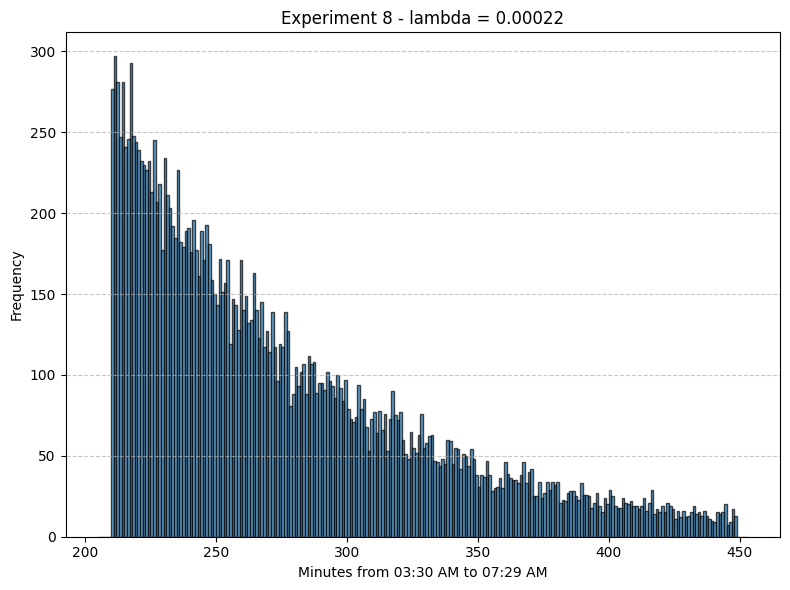

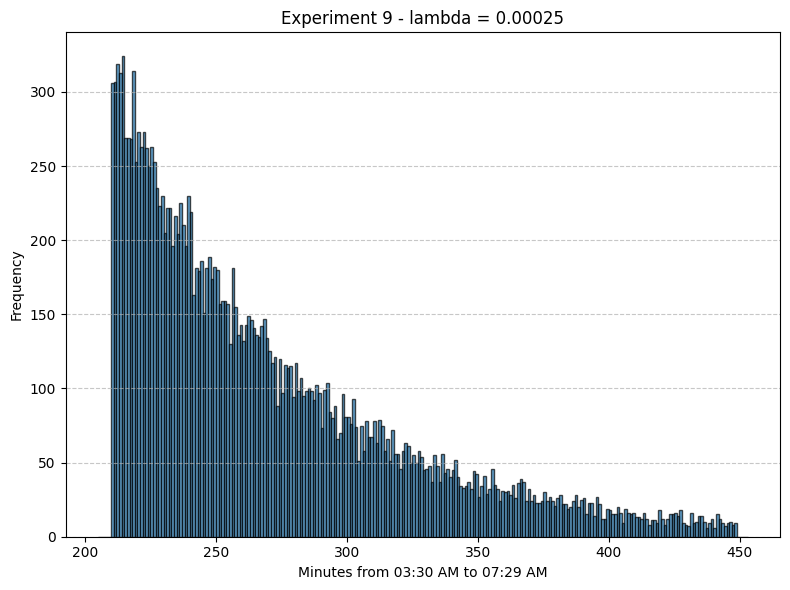

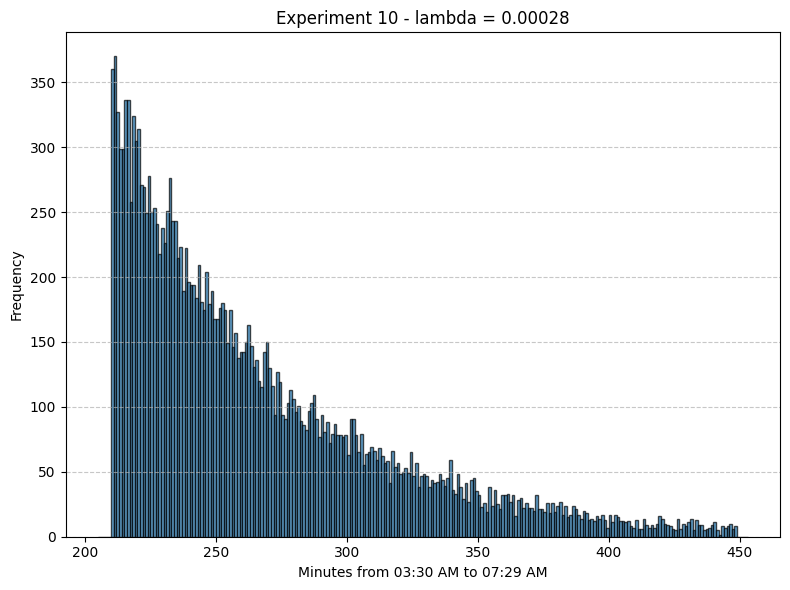

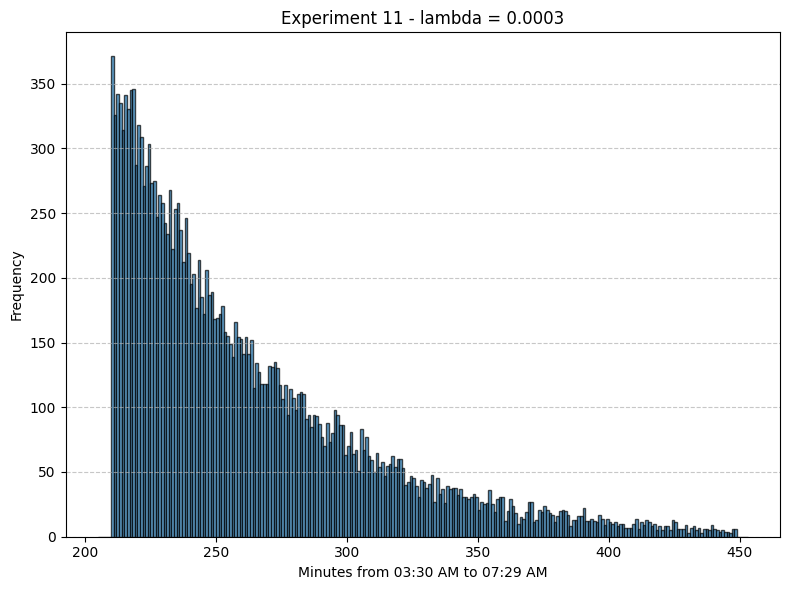

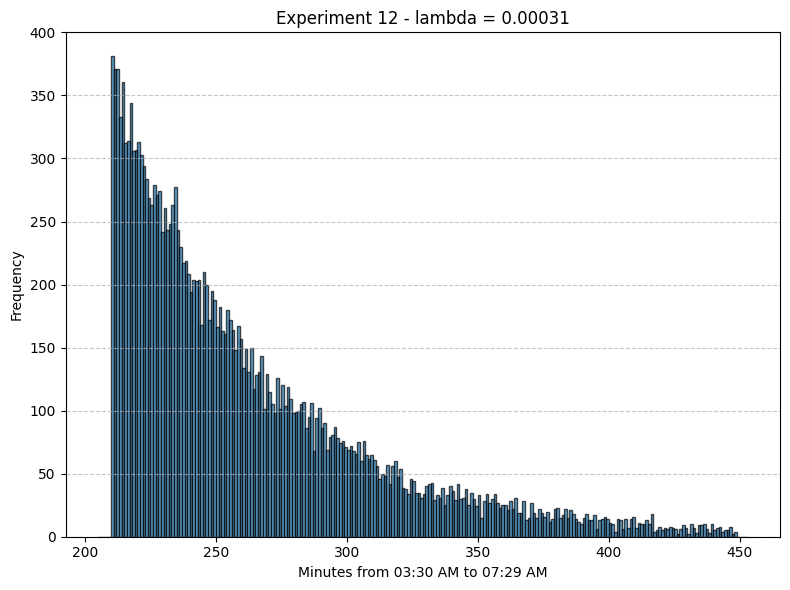

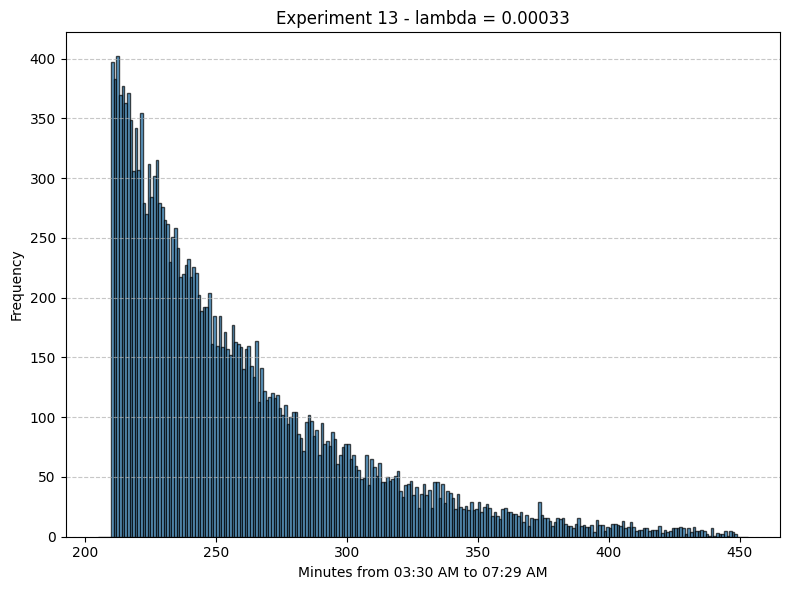

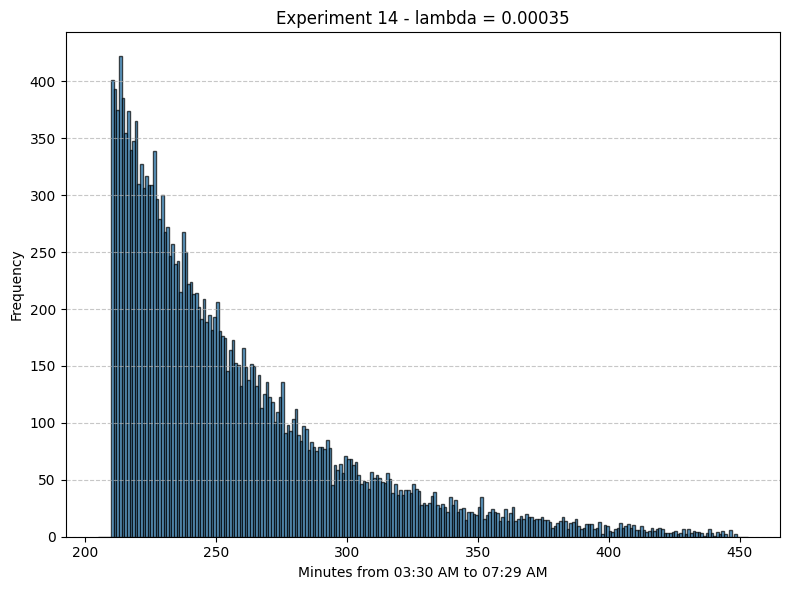

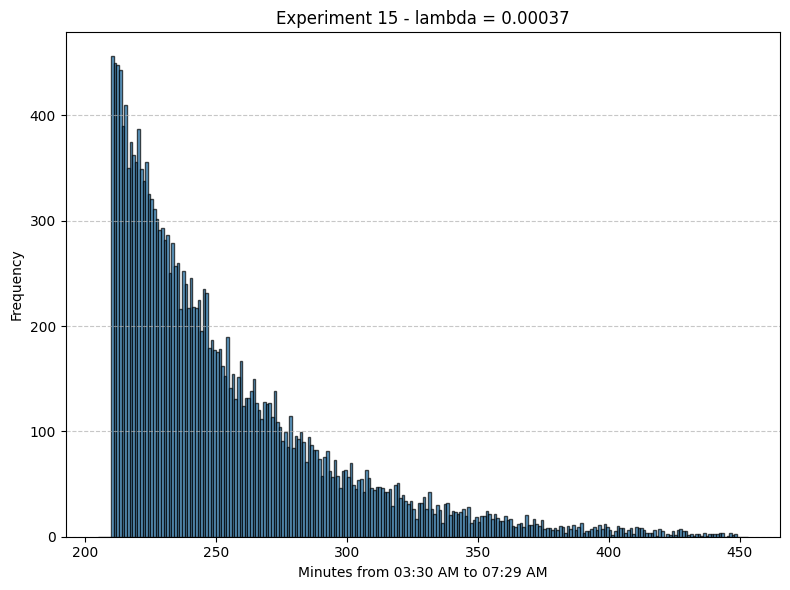

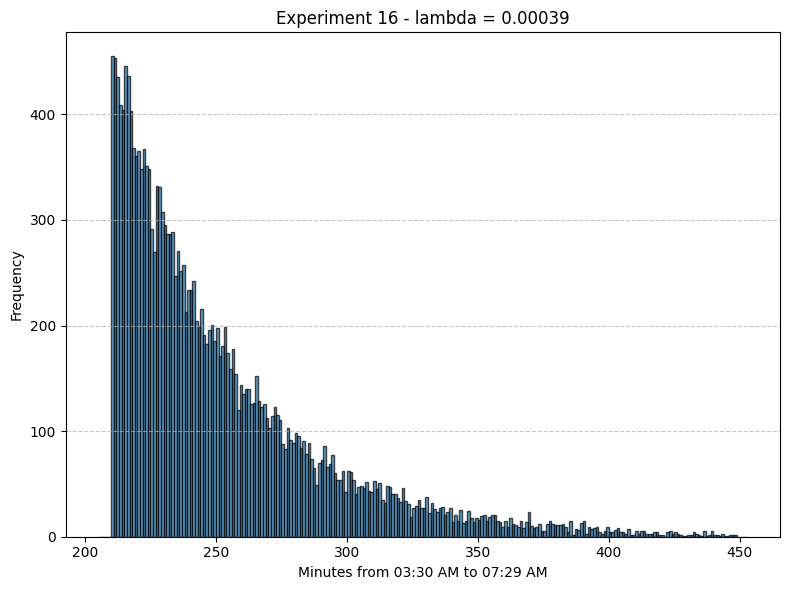

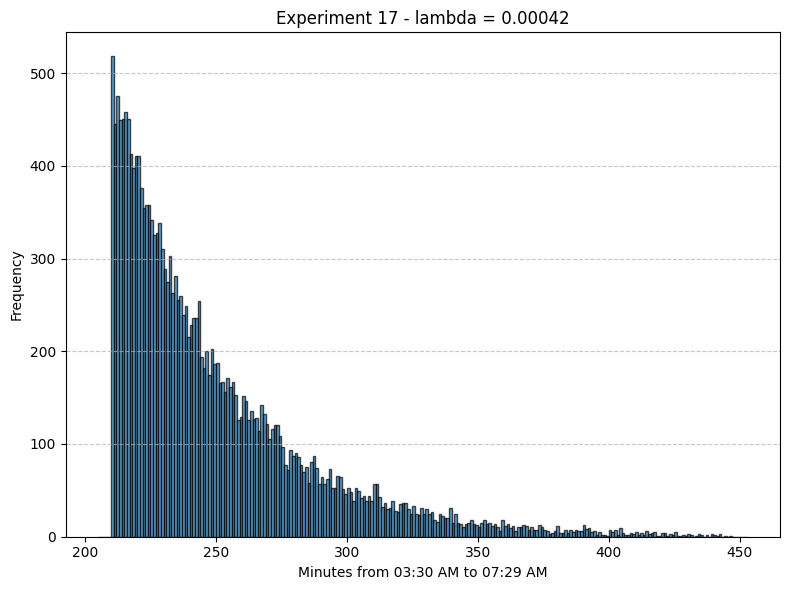

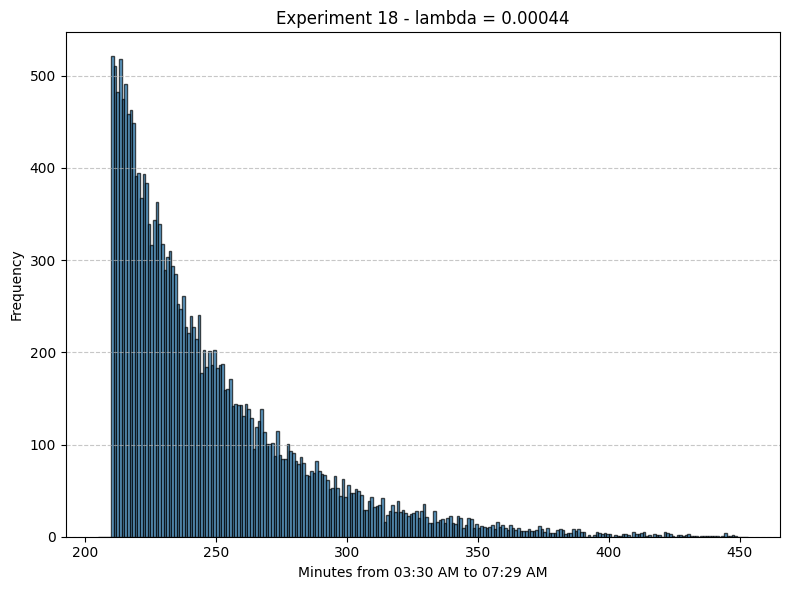

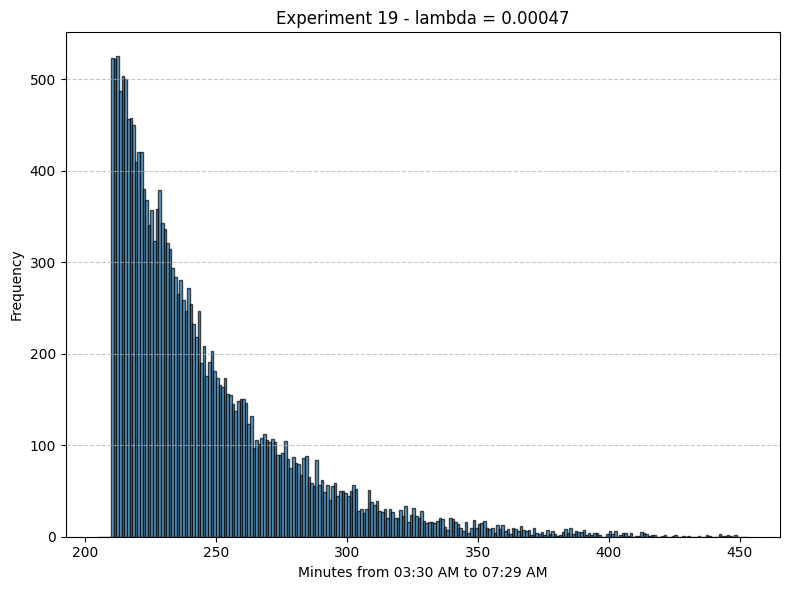

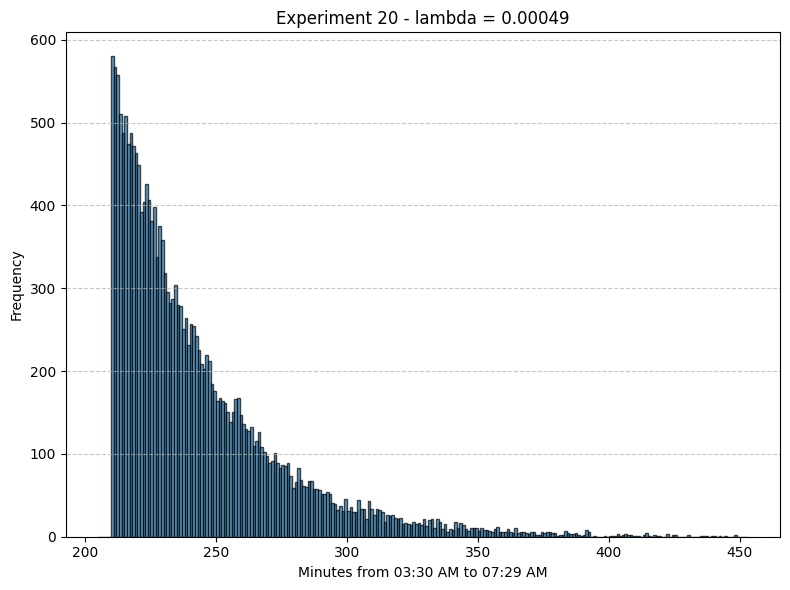

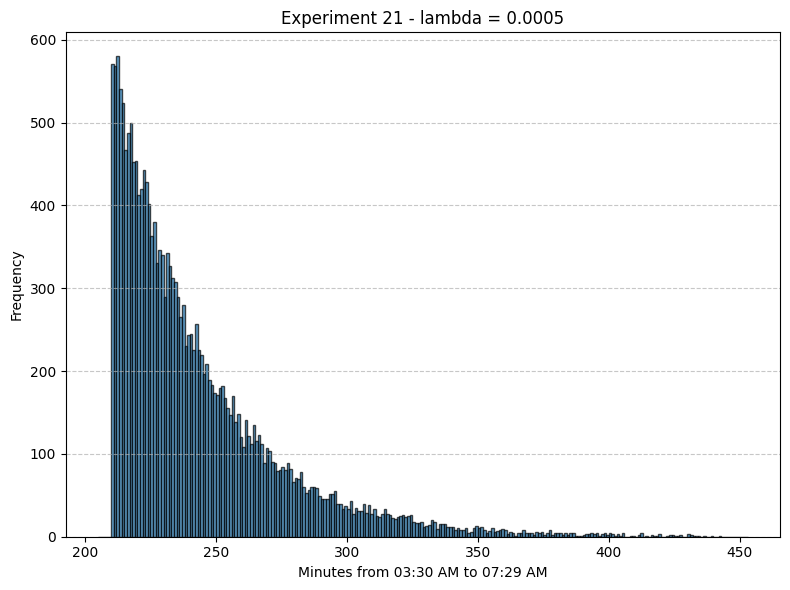

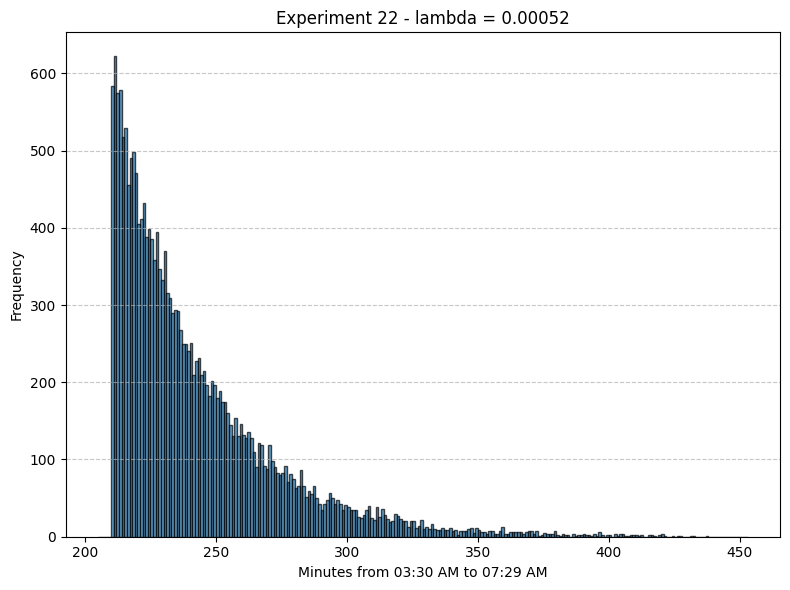

In [ ]:
# Define the start and end times of the interval
start_time = datetime.strptime("03:30 AM", "%I:%M %p")
end_time = datetime.strptime("7:29 AM", "%I:%M %p")

# Define parameters for experiments
lambda_values = [0.0001, 0.00012, 0.00015, 0.00017, 0.00018, 0.0002, 0.00021, 0.00022, 0.00025,0.00028, 0.0003, 0.00031, 0.00033, 0.00035, 0.00037, 0.00039, 0.00042,
                 0.00044, 0.00047, 0.00049, 0.0005, 0.00052] # Different lambda values for each experiment

num_experiments = len(lambda_values)
num_trials = 20000

# Run experiments
experiment_results = run_experiments_exp(num_experiments, num_trials, start_time, end_time, lambda_values)
plot_histograms_exp(experiment_results, start_time, end_time, lambda_values)


### Plotting the results of a Powershell script that conducted 20000 trials using the choosen lambda (0.00028)


#### The histogram of the 20000 powershell trials

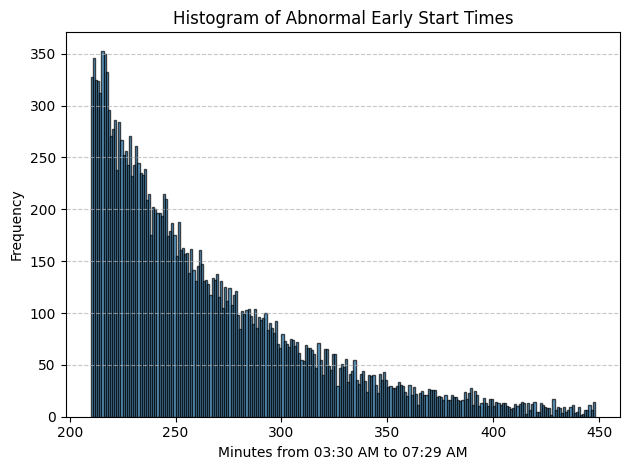

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime

# Read the experiment results from the text file
results_file_path = "/content/experiments_abnormal_early.txt"  # the file contains 20000 trials
with open(results_file_path, 'r', encoding="utf-16") as file:
    results = [line.strip() for line in file]

# Convert the results to datetime objects
#results = [datetime.strptime(result, "%m/%d/%Y %H:%M:%S") for result in results]

results = [datetime.strptime(result, "%A, %B %d, %Y %I:%M:%S %p") for result in results]

# Extract the hours from the results
packets = [result.hour*60 + result.minute for result in results]

# Create a histogram
plt.hist(packets, bins=range(210, 449), edgecolor='black', alpha=0.7)
plt.xlabel('Minutes from 03:30 AM to 07:29 AM')
plt.ylabel('Frequency')
plt.title('Histogram of Abnormal Early Start Times')
#plt.xticks(range(210, 449))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the histogram
plt.show()


#### The Powershell script

In [ ]:
# # Define the number of experiments to run
# $numberOfExperiments = 20000

# # Define the start and end times of the interval
# $startTime = Get-Date -Hour 3 -Minute 30 -Second 0
# $endTime = Get-Date -Hour 7 -Minute 29 -Second 59

# # Initialize an array to store the results of each experiment
# $results = @()

# # Perform the experiments
# for ($i = 1; $i -le $numberOfExperiments; $i++) {
#     # Generate a random time within the interval using exponential distribution
#     # For exponential distribution, we can use the Inverse Transform Sampling method
#     $lambda = 0.00028 #1 / ($endTime - $startTime).TotalSeconds  # Calculate lambda (rate parameter)
#     $u = Get-Random -Minimum 0.0 -Maximum 1.0  # Generate a random number between 0 and 1
#     $t = -[math]::Log(1 - $u) / $lambda  # Compute the random time using the inverse CDF of exponential distribution
#     # Add the computed time to the start time to get the final time
#     $t_start_abnormal_early = $startTime.AddSeconds($t)
#     # Ensure the generated time is within the interval [3:30 AM - 7:29 AM]
#     while ($t_start_abnormal_early -lt $startTime -or $t_start_abnormal_early -gt $endTime) {
#         $u = Get-Random -Minimum 0.0 -Maximum 1.0  # Generate a new random number
#         $t = -[math]::Log(1 - $u) / $lambda  # Compute a new random time
#         $t_start_abnormal_early = $startTime.AddSeconds($t)  # Update the computed time
#     }
#     # Add the result of the experiment to the results array
#     $results += $t_start_abnormal_early
# }
# # Save the results to a text file
# $results | Out-File -FilePath "C:\Users\Administrator\desktop\experiment_results.txt"
# # Output a message indicating that the results have been saved
# Write-Host "Experiment results have been saved to C:\Users\Administrator\desktop\experiments_abnormal_early.txt"


###################################################################################################################################################################################
###################################################################################################################################################################################
###################################################################################################################################################################################
###################################################################################################################################################################################


#####################################
# The script with just 1 experiment #
#####################################


# # Define the start and end times of the interval
# $startTime = Get-Date -Hour 3 -Minute 30 -Second 0
# $endTime = Get-Date -Hour 7 -Minute 29 -Second 59

# # Generate a random time within the interval using exponential distribution
# # For exponential distribution, we can use the Inverse Transform Sampling method
# $lambda = 0.00028 # lambda (rate parameter)
# $u = Get-Random -Minimum 0.0 -Maximum 0.9999  # Generate a random number between 0 and 0.9999
# $t = -[math]::Log(1 - $u) / $lambda  # Compute the random time using the inverse CDF of exponential distribution

# # Add the computed time to the start time to get the final time
# $t_start_abnormal_early = $startTime.AddSeconds($t)

# # Ensure the generated time is within the interval [3:30 AM - 7:29 AM]
# while ($t_start_abnormal_early -lt $startTime -or $t_start_abnormal_early -gt $endTime) {
#     $u = Get-Random -Minimum 0.0 -Maximum 0.9999  # Generate a new random number
#     $t = -[math]::Log(1 - $u) / $lambda  # Compute a new random time
#     $t_start_abnormal_early = $startTime.AddSeconds($t)  # Update the computed time
# }

# Write-Host "t_start_abnormal_early = $t_start_abnormal_early"

## *t_start_late: Selecting the lambda parameter of the flipped exponential distirbution that will be used to draw a value from the interval [08:31 AM - 10:00 AM]*

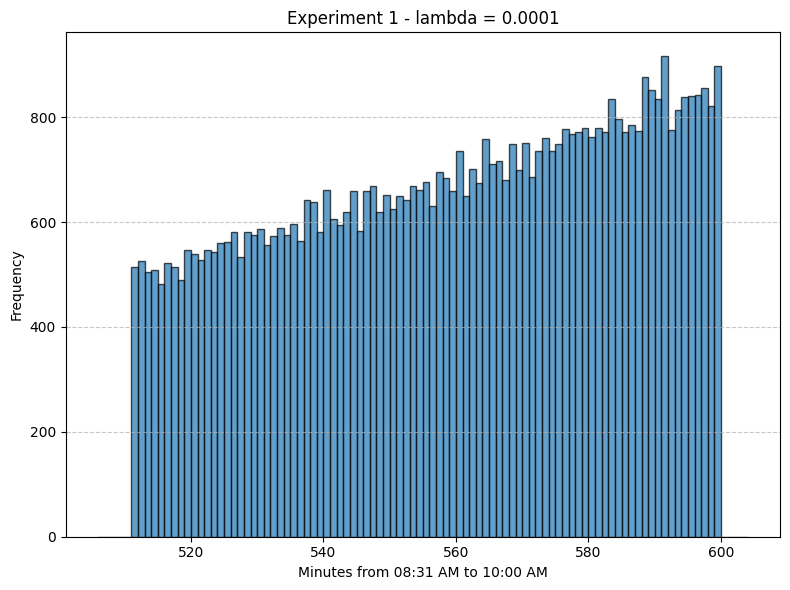

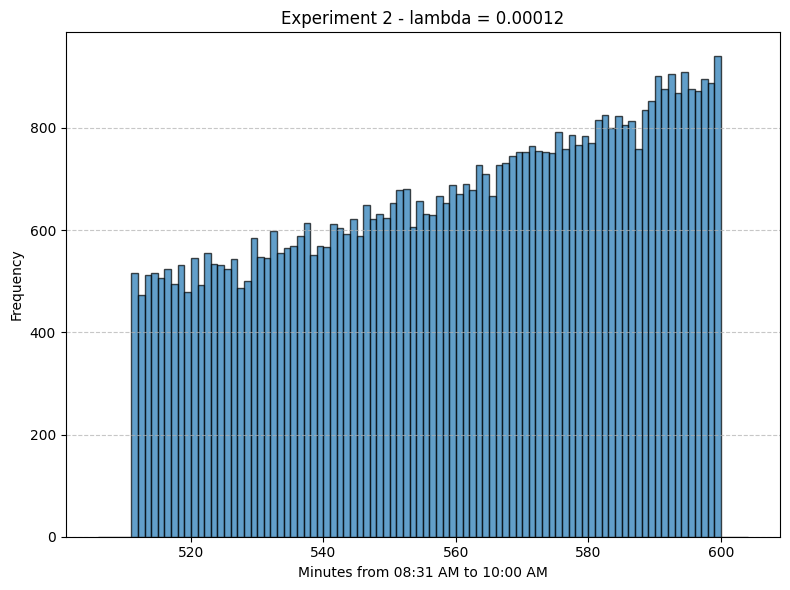

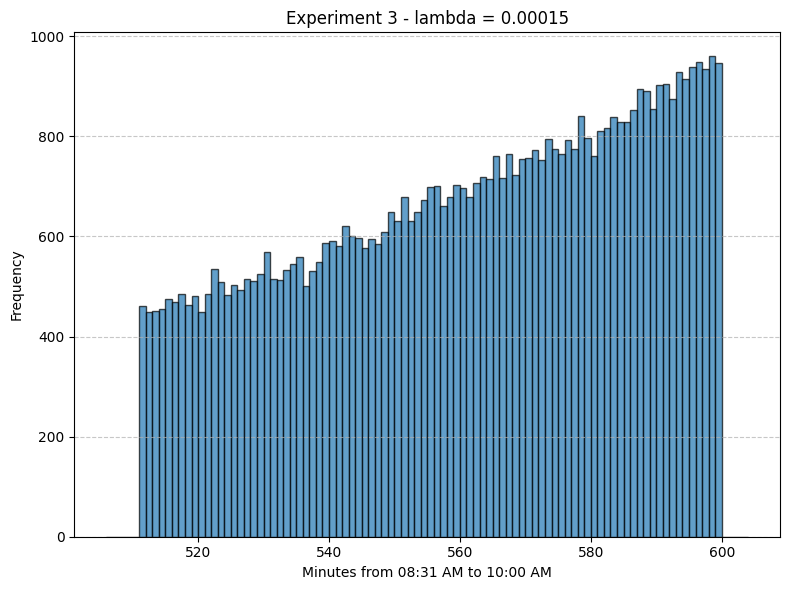

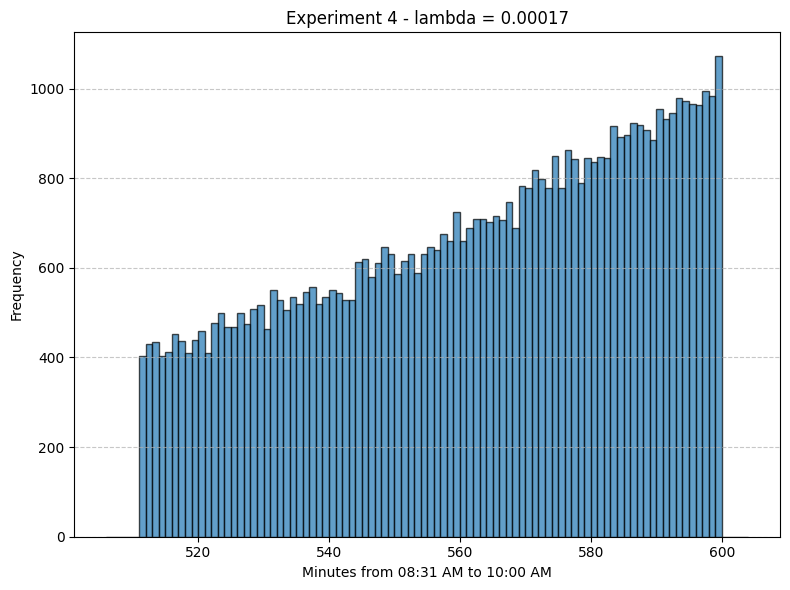

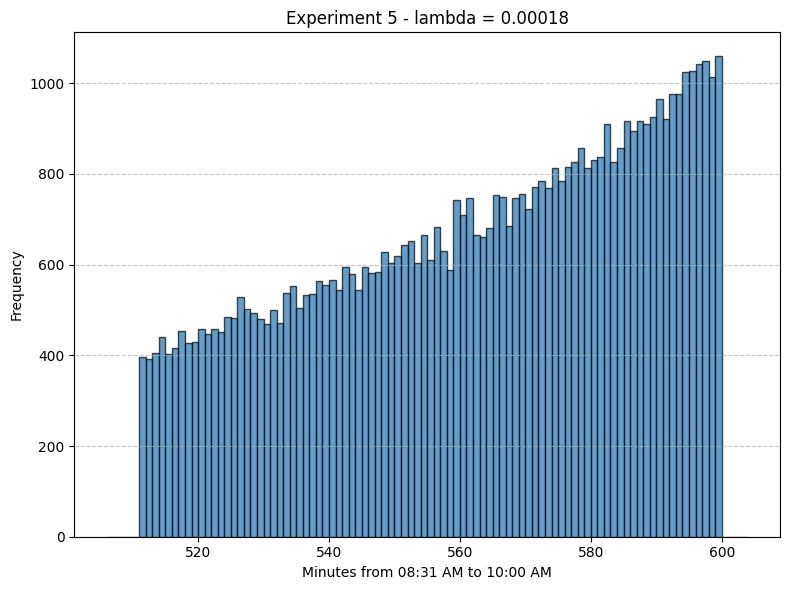

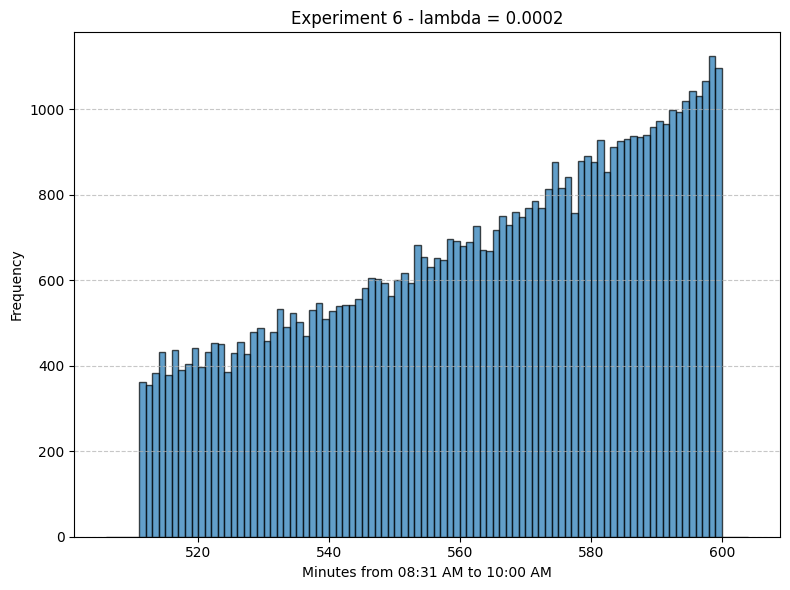

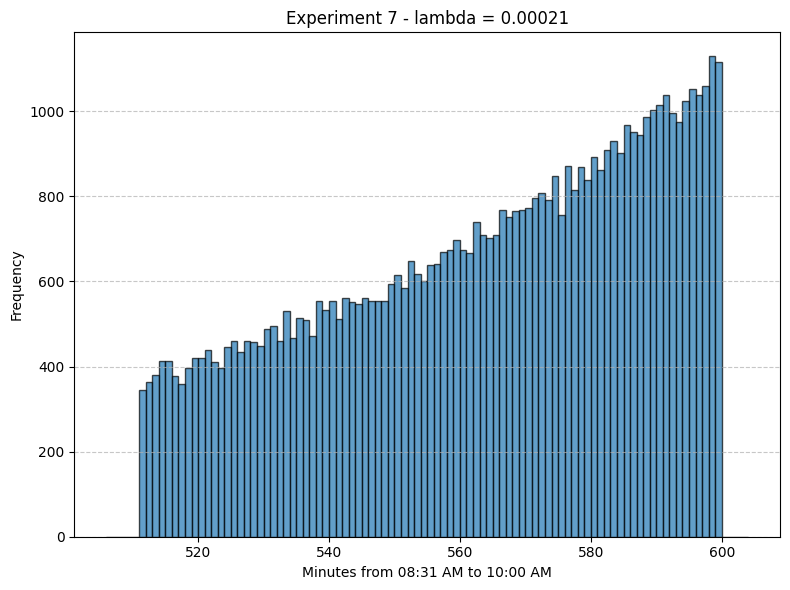

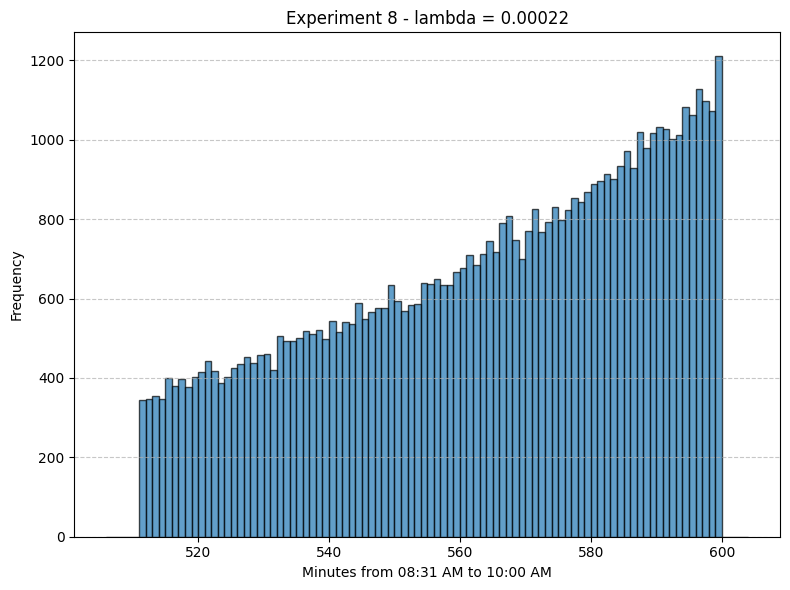

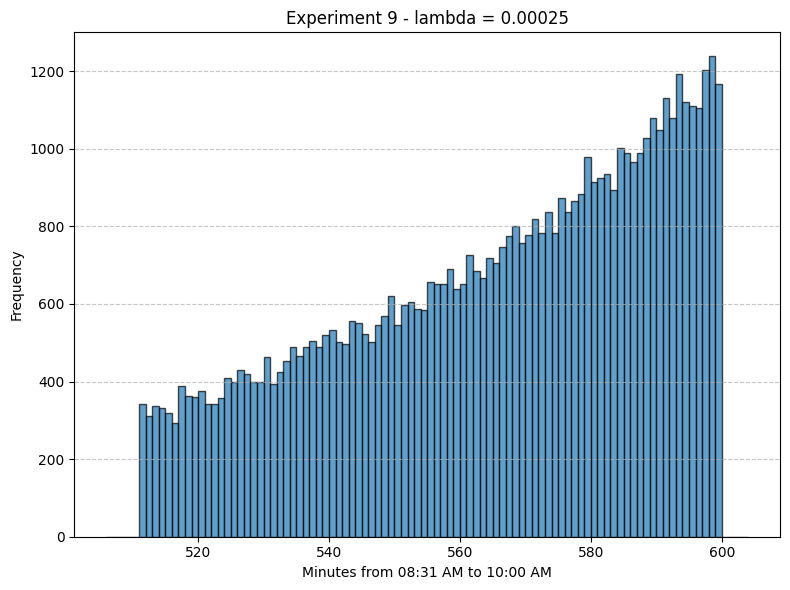

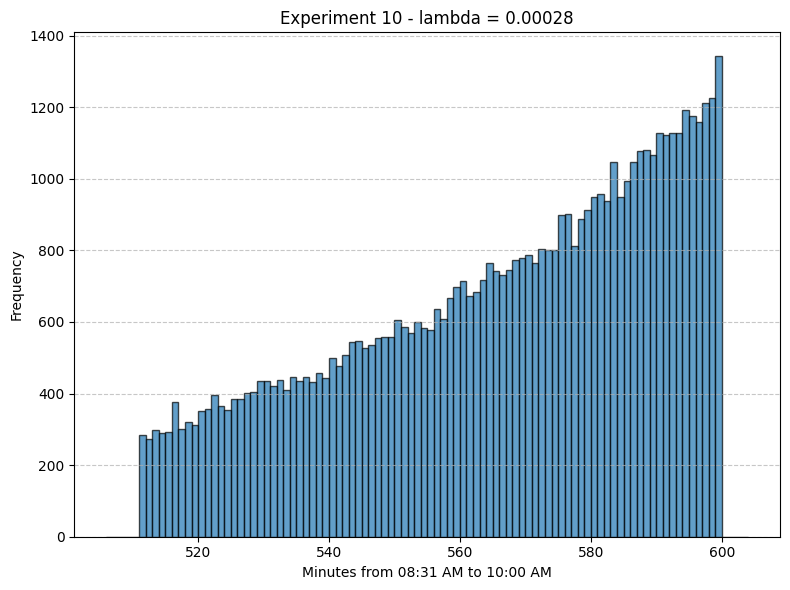

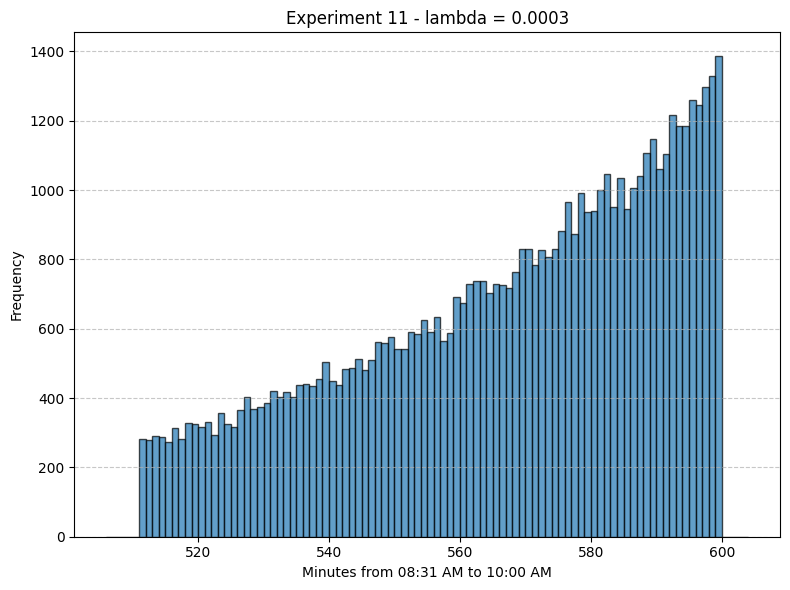

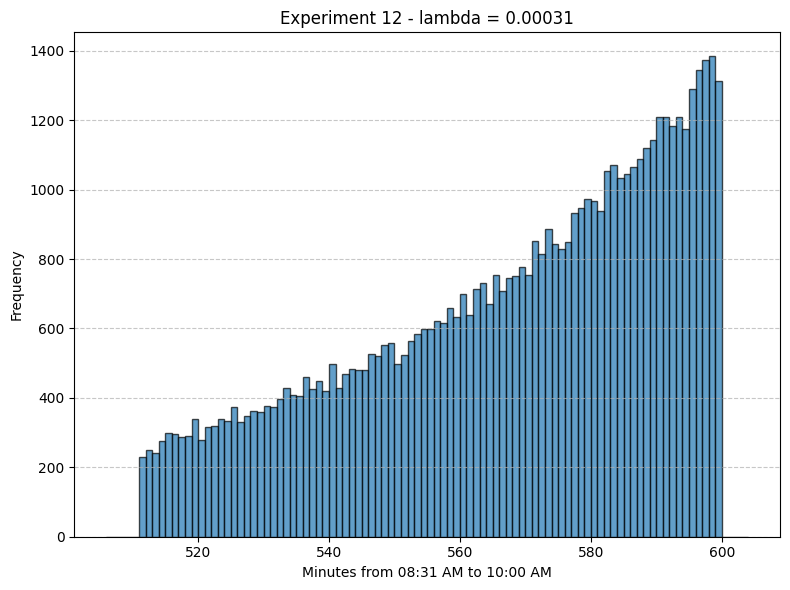

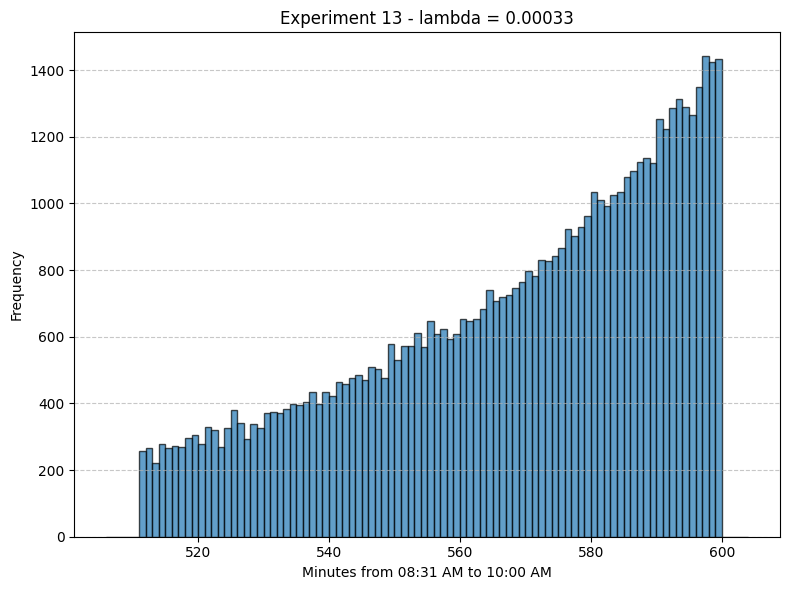

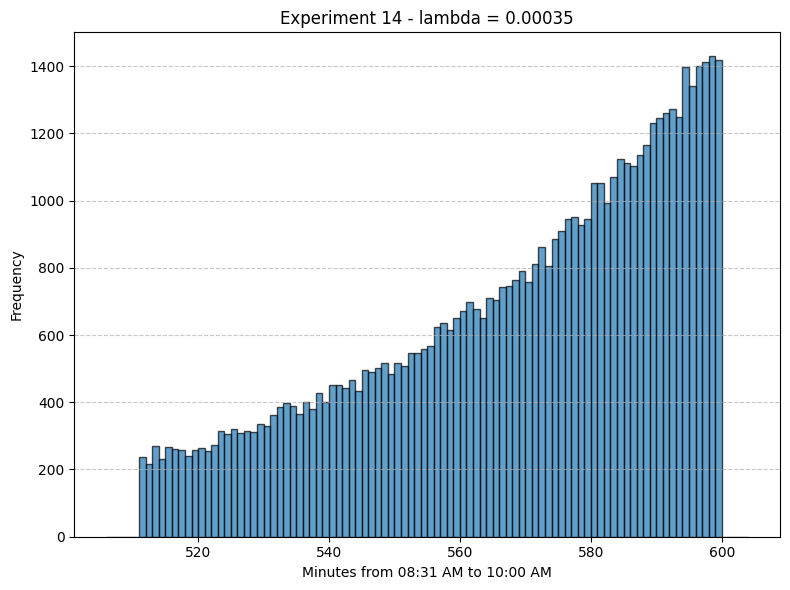

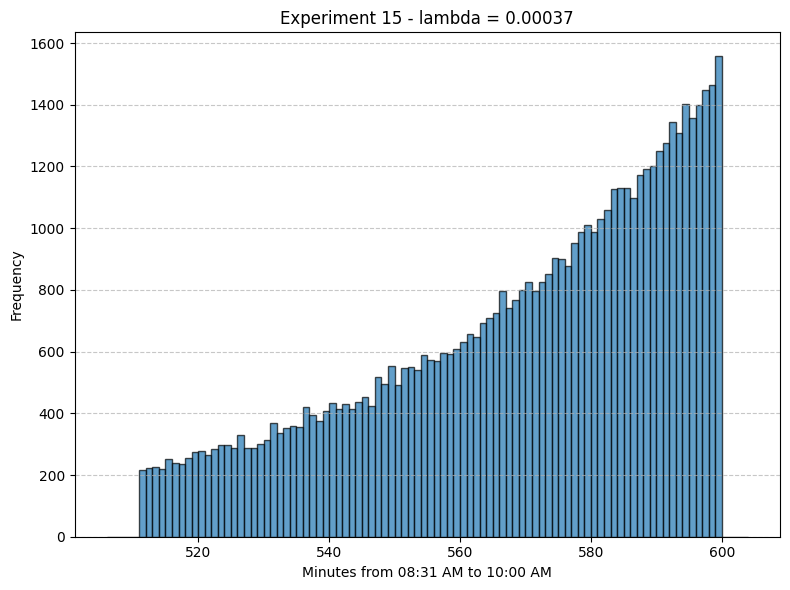

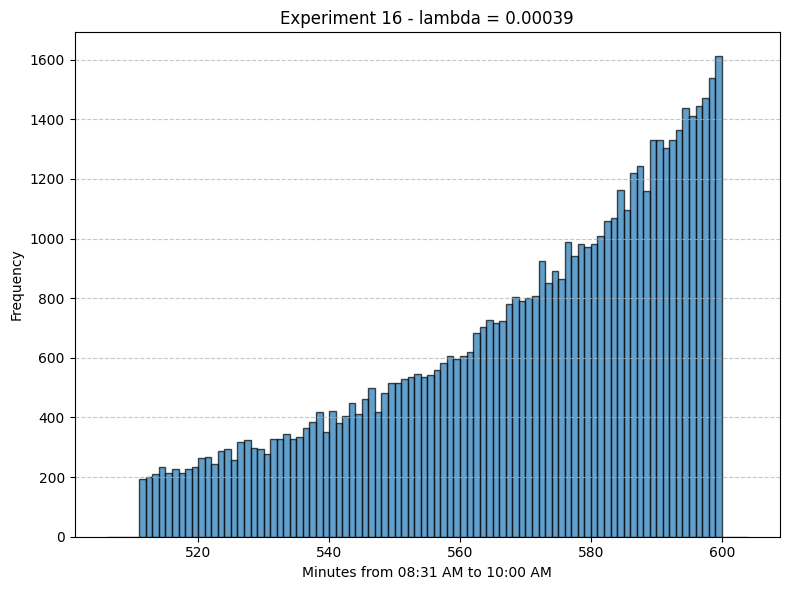

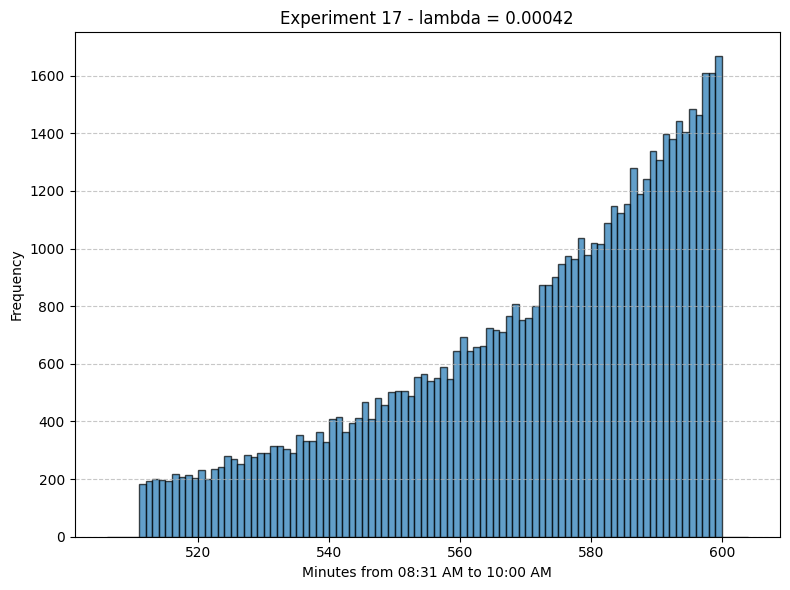

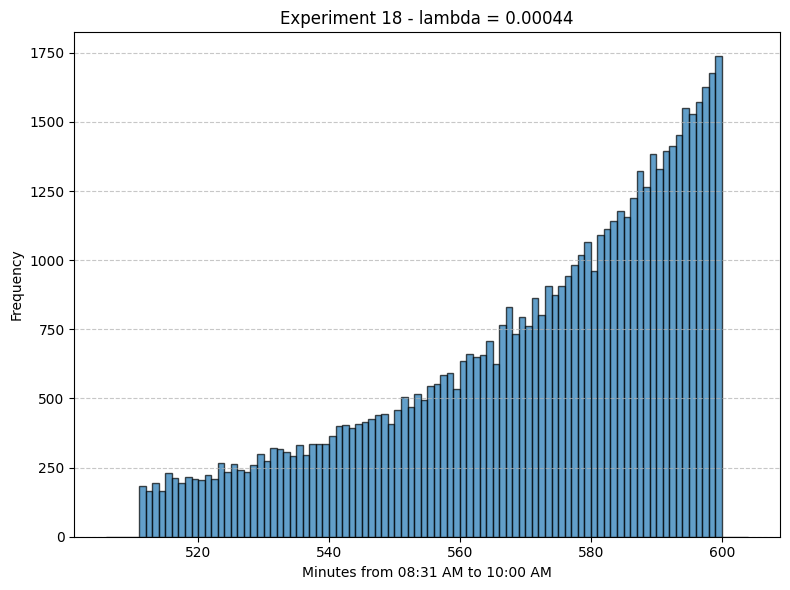

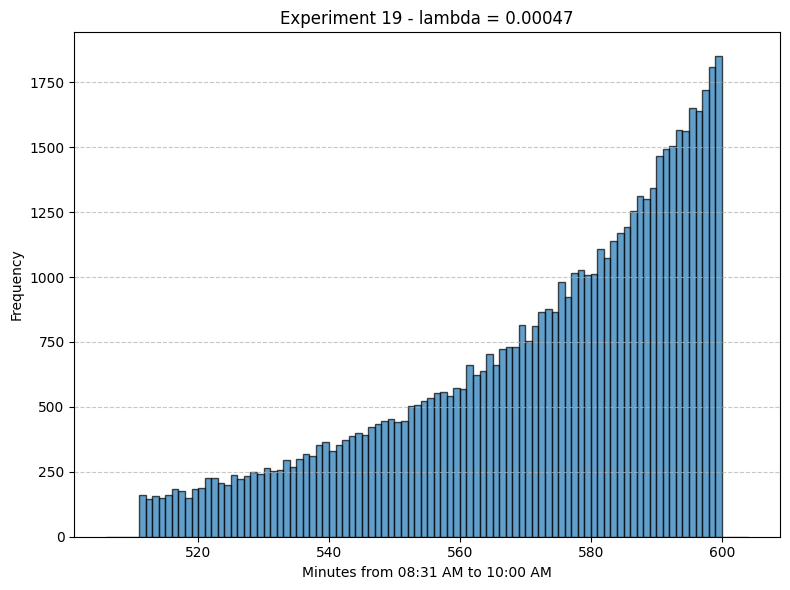

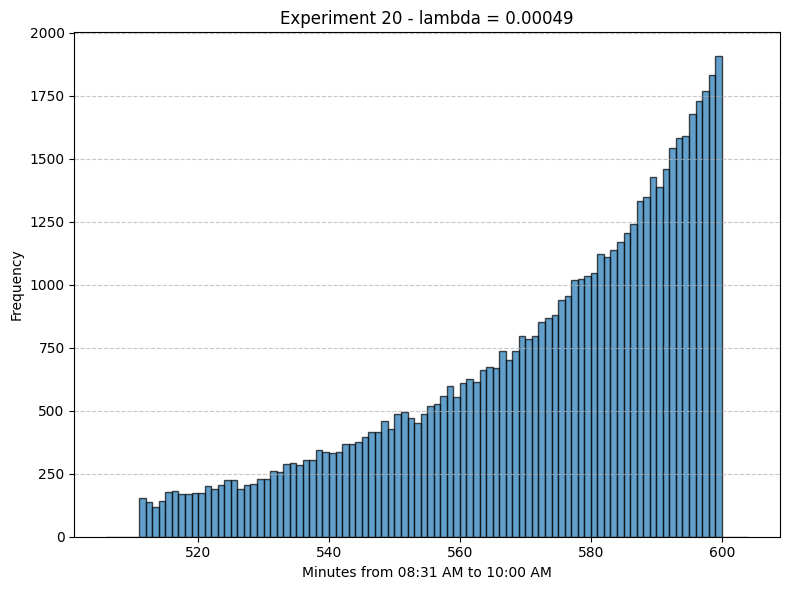

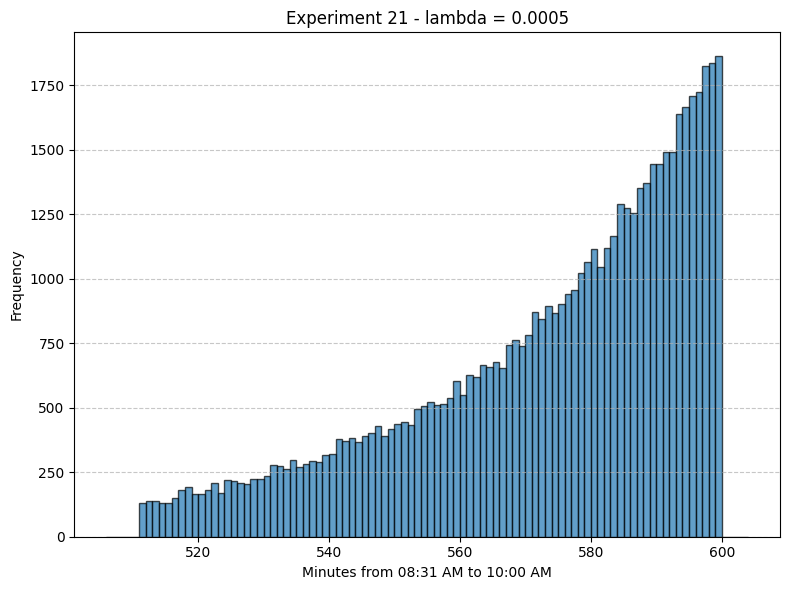

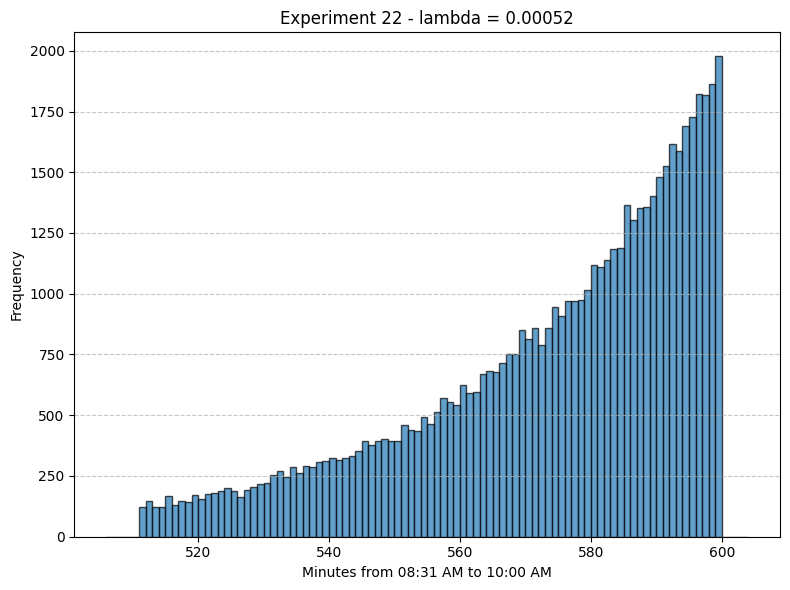

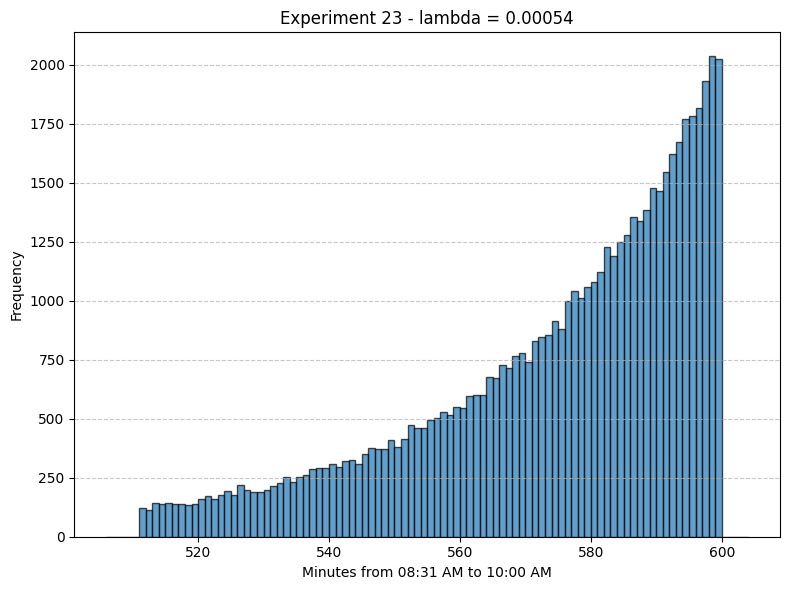

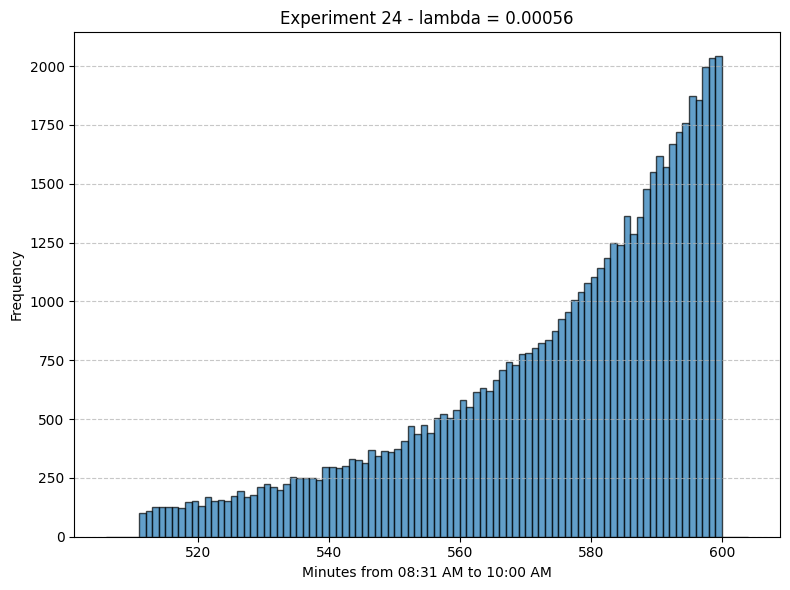

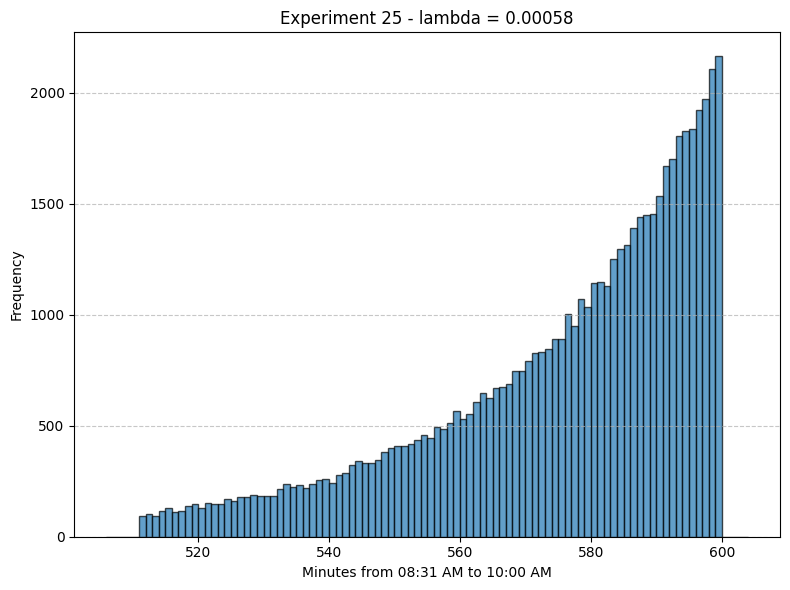

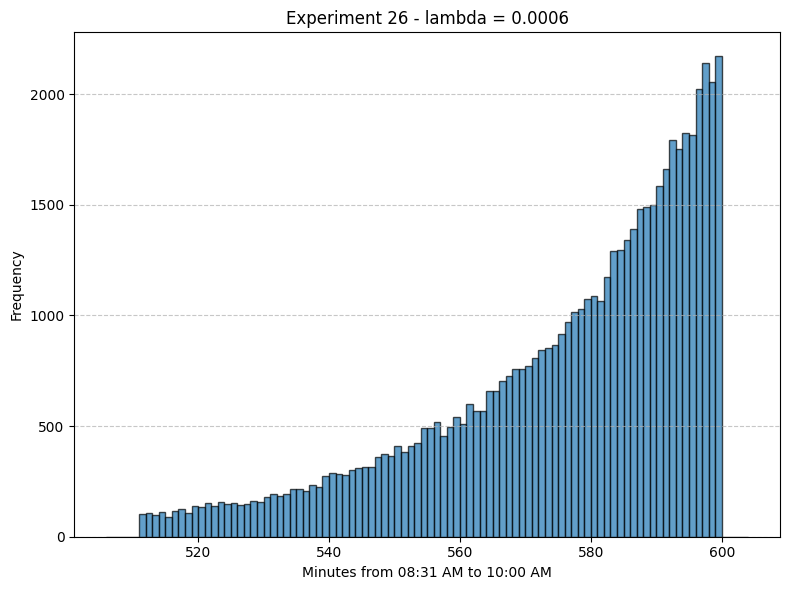

In [ ]:
import random
import math
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


# Define the start and end times of the interval
start_time = datetime.strptime("8:31 AM", "%I:%M %p")
end_time = datetime.strptime("10:00 AM", "%I:%M %p")


# Define parameters for experiments
lambda_values = [0.0001, 0.00012, 0.00015, 0.00017, 0.00018, 0.0002, 0.00021, 0.00022, 0.00025,0.00028, 0.0003, 0.00031, 0.00033, 0.00035, 0.00037, 0.00039, 0.00042,
                 0.00044, 0.00047, 0.00049, 0.0005, 0.00052, 0.00054, 0.00056, 0.00058, 0.0006]  # Different lambda values for each experiment

num_experiments = len(lambda_values)

num_trials_per_experiment = 60000


# Run experiments
experiment_results = run_experiments_exp(num_experiments, num_trials_per_experiment, start_time, end_time, lambda_values, True)

# Plot Histograms
plot_histograms_exp(experiment_results, start_time, end_time, lambda_values)

### *Plotting the results of a Powershell script that conducted 20000 trials using the choosen lambda (0.0006)*

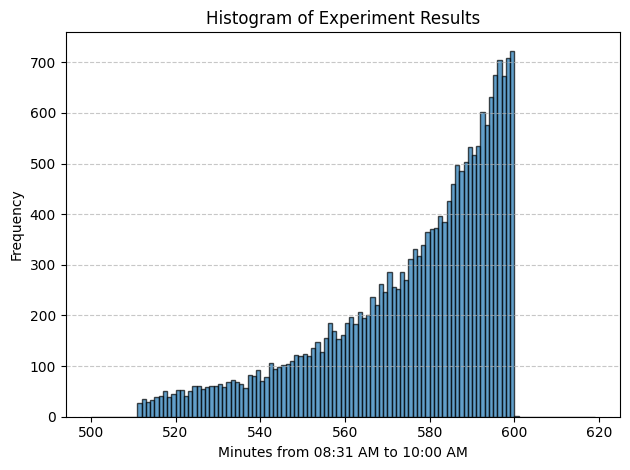

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt

# Read the experiment results from the text file
experiment_results = []
with open('/content/experiments_late.txt', 'r', encoding='utf-16') as file:
    for line in file:
        parts = line.split(': ')
        if len(parts) == 2:
            timestamp_str = parts[1].strip()
            timestamp = datetime.strptime(timestamp_str, '%m/%d/%Y %H:%M:%S')
            experiment_results.append(timestamp)

# Convert timestamps to minutes
experiment_minutes = [(result.hour * 60) + result.minute for result in experiment_results]

# Create a histogram
plt.hist(experiment_minutes, bins=range(500, 620), edgecolor='black', alpha=0.7)
plt.xlabel('Minutes from 08:31 AM to 10:00 AM')
plt.ylabel('Frequency')
plt.title('Histogram of Experiment Results')
# plt.xticks(range(450, 511, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### *The powershell script*

In [ ]:
# # Define a function to run the experiment X times and save the output to a file
# function Run-Experiments {
#     param (
#         [int]$numExperiments,
#         [string]$outputFile
#     )
#     # Define the start and end times of the interval
#     $startTime = Get-Date -Hour 8 -Minute 31 -Second 0
#     $endTime = Get-Date -Hour 10 -Minute 0 -Second 0
#     # Lambda (rate parameter) for exponential distribution
#     $lambda = 0.0006
#     # Initialize an array to store the results
#     $results = @()
#     # Loop through the experiments
#     for ($i = 1; $i -le $numExperiments; $i++) {
#         # Generate a random time within the interval using exponential distribution
#         $u = Get-Random -Minimum 0.0 -Maximum 0.9999
#         $t = -[math]::Log(1 - $u) / $lambda
#         # Add the computed time to the start time to get the final time
#         $t_start_late = $endTime - [TimeSpan]::FromSeconds($t)
#         # Ensure the generated time is within the interval [8:31 AM - 10:00 AM]
#         while ($t_start_late -lt $startTime -or $t_start_late -gt $endTime) {
#             $u = Get-Random -Minimum 0.0 -Maximum 0.9999
#             $t = -[math]::Log(1 - $u) / $lambda
#             $t_start_late = $endTime - [TimeSpan]::FromSeconds($t)
#         }
#         # Add the result to the array
#         $result = "Experiment ${i}: $t_start_late"
#         $results += $result
#     }
#     # Write the results to the output file
#     $results | Out-File $outputFile
# }
# # Execute experiments X times and save the output to a file
# $numberOfExperiments = 60000  # Set X here
# $outputFilePath = "C:\Users\Administrator\desktop\experiments_late.txt"
# Run-Experiments -numExperiments $numberOfExperiments -outputFile $outputFilePath
# Write-Host "Done!"

## *t_start_abnormal_late: Selecting the lambda parameter of the flipped exponential distirbution that will be used to draw a value from the interval [10:01 AM - 04:00 PM]*

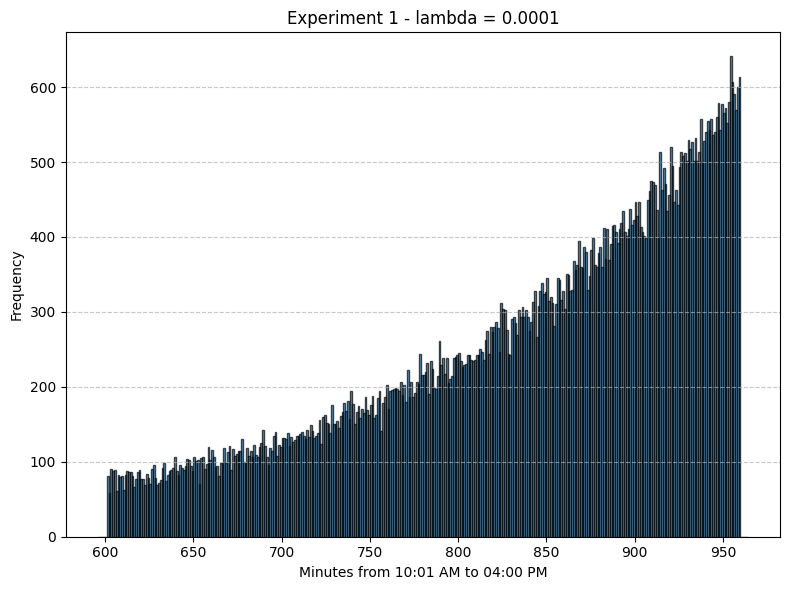

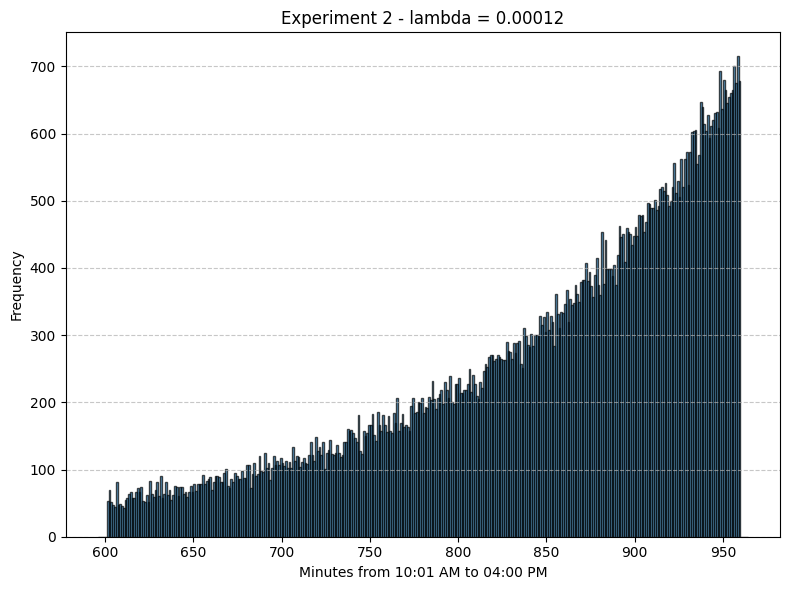

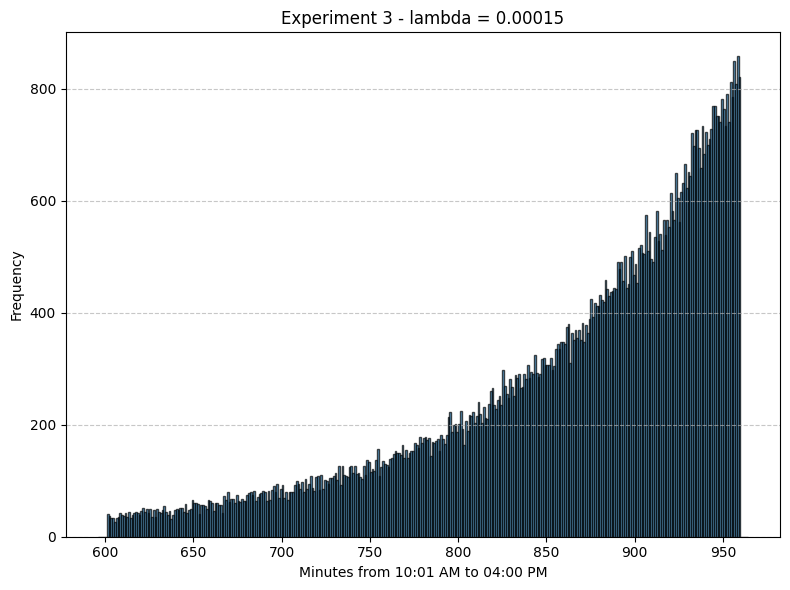

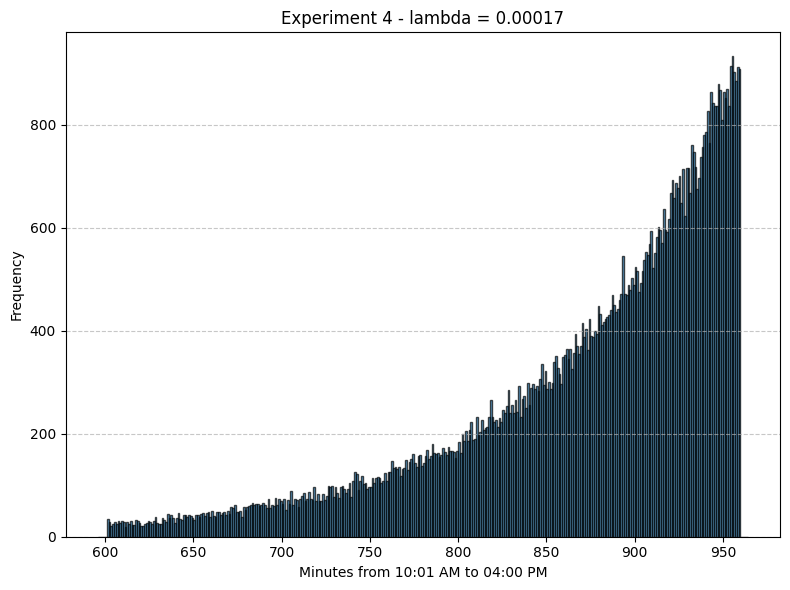

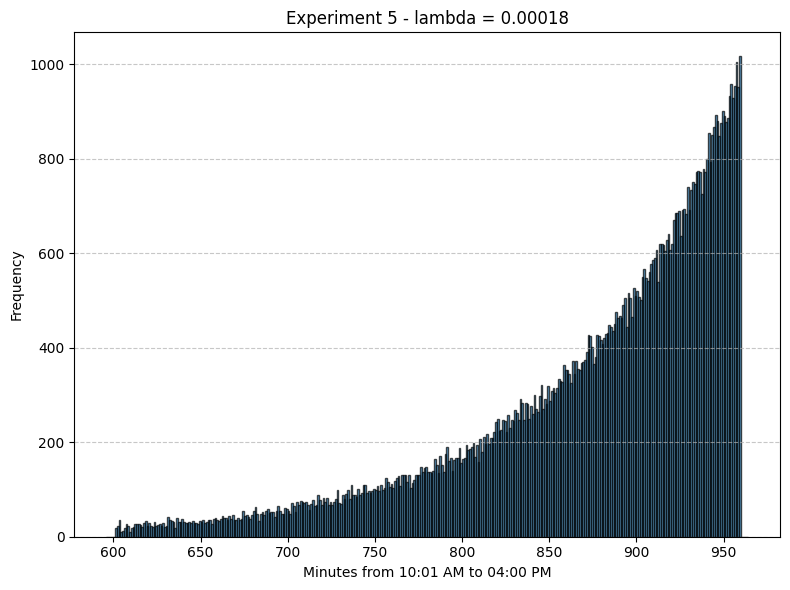

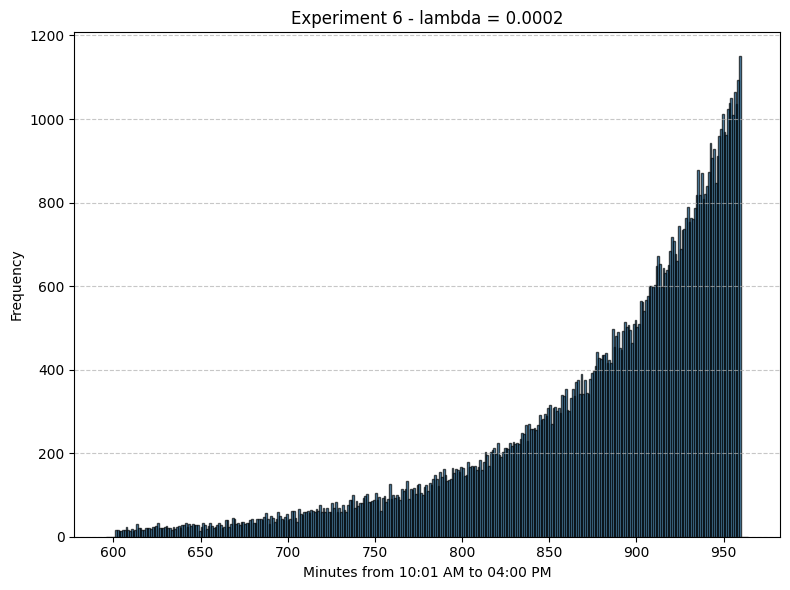

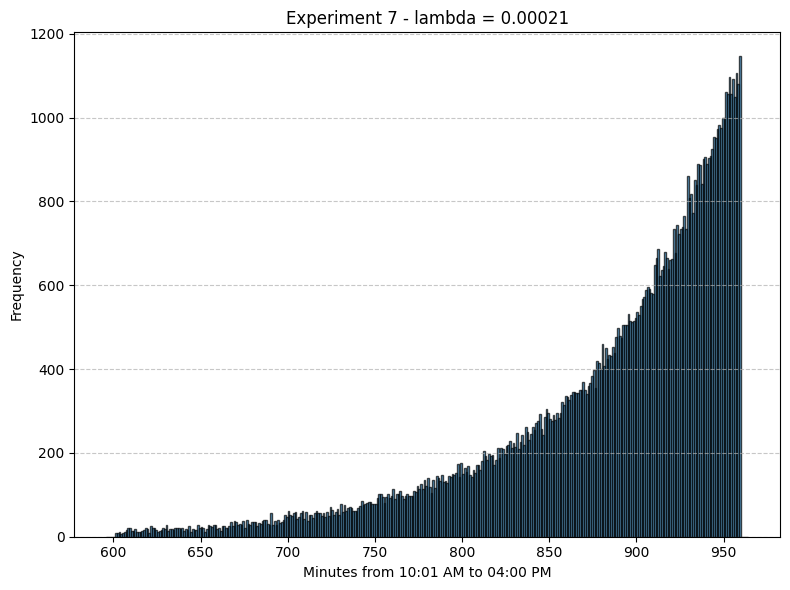

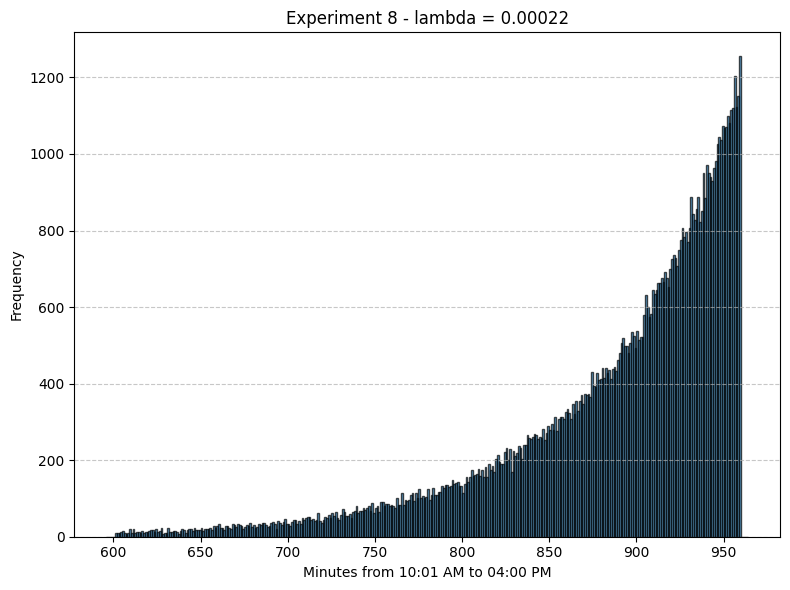

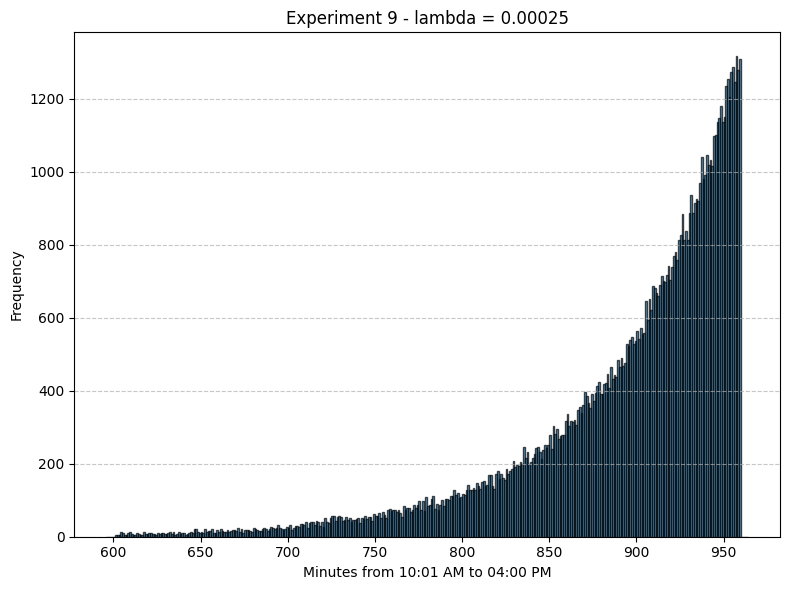

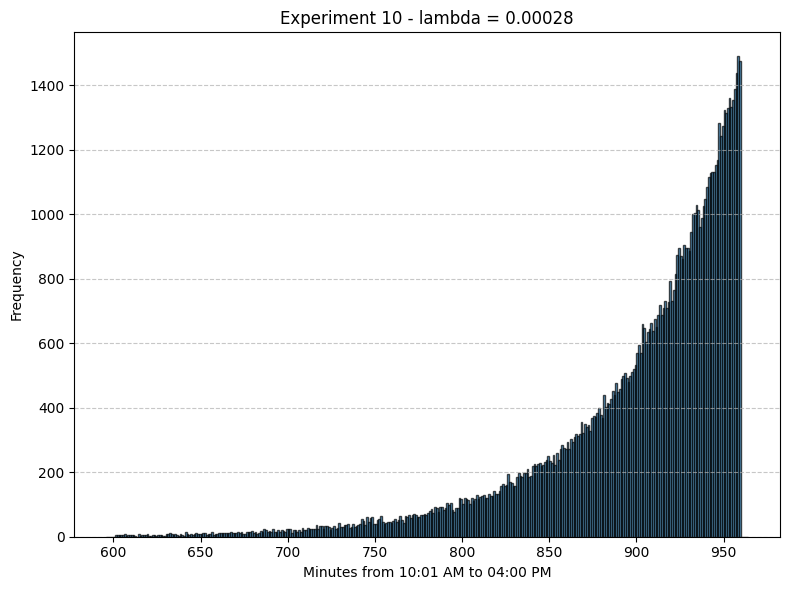

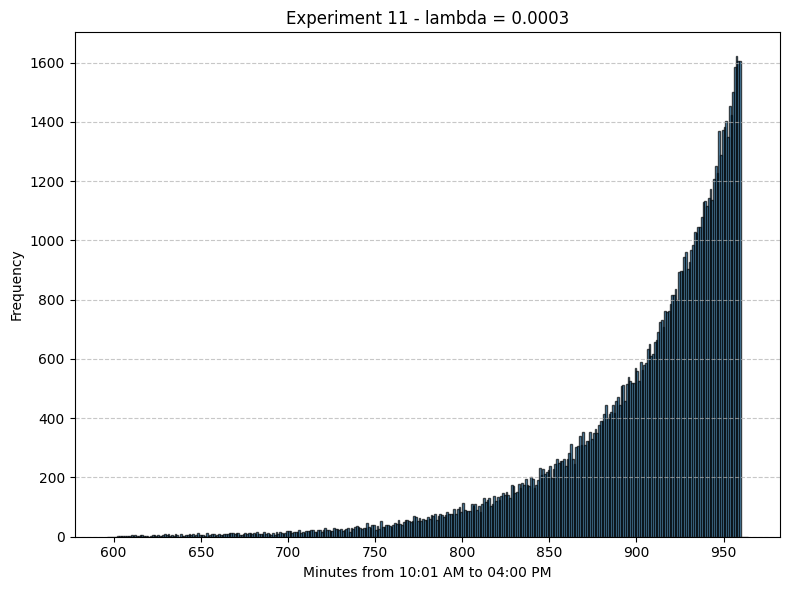

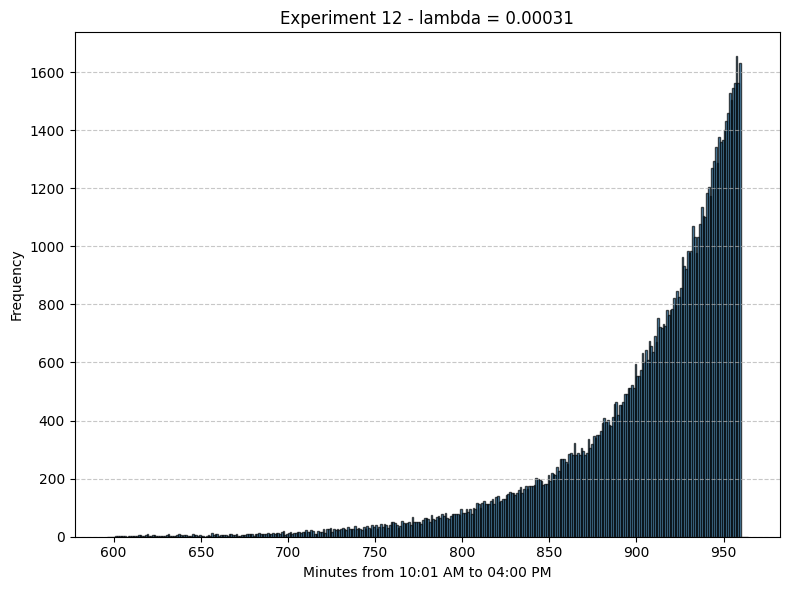

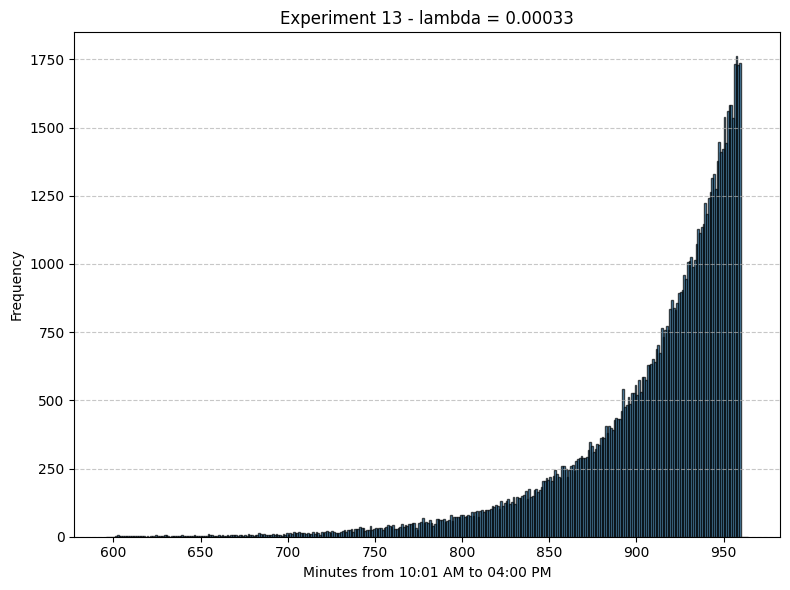

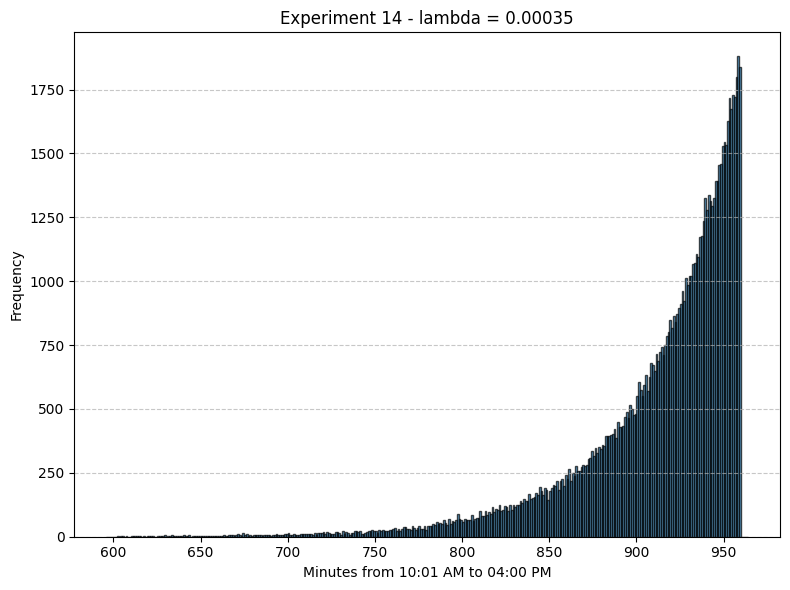

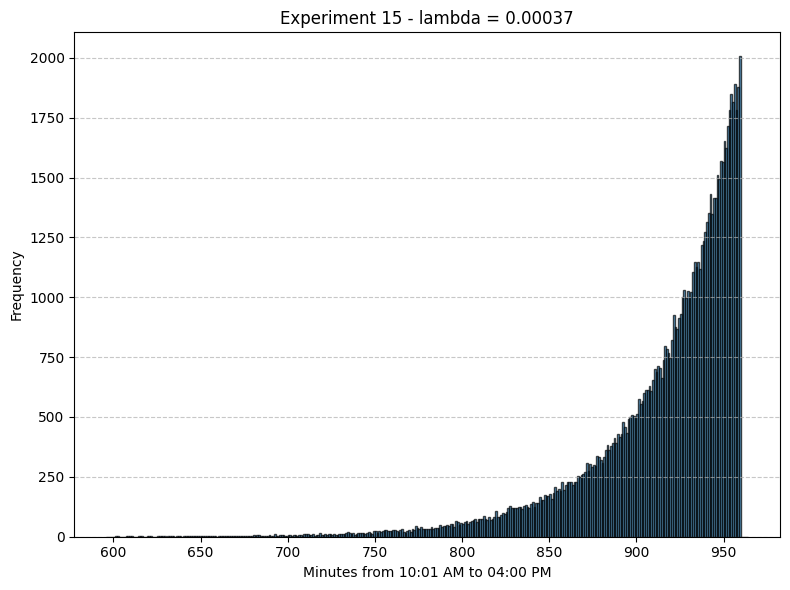

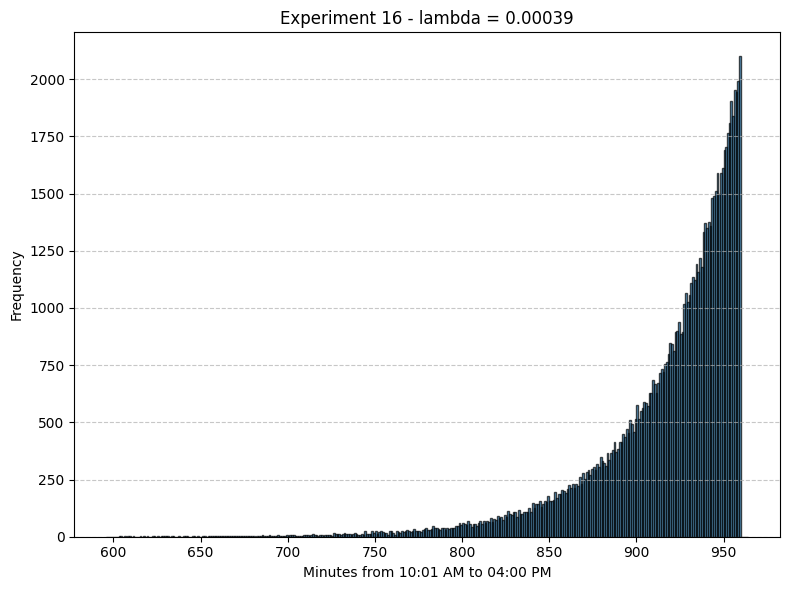

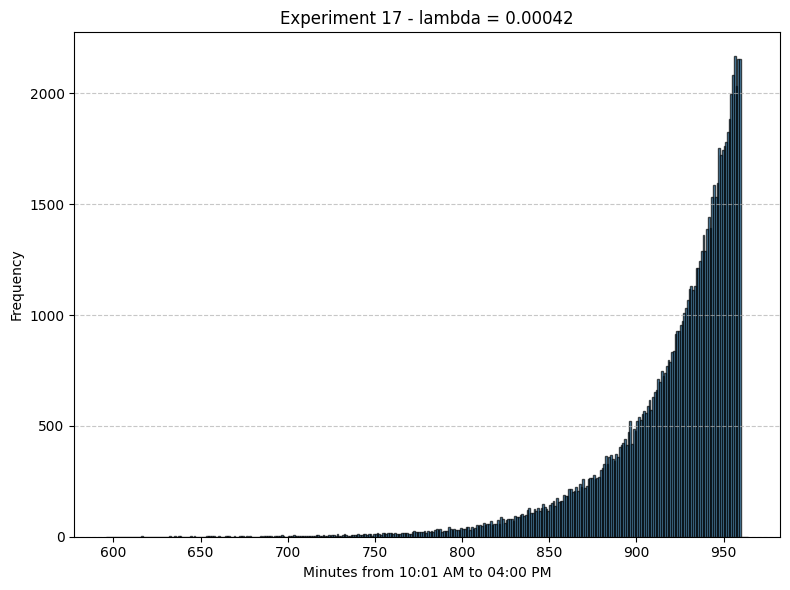

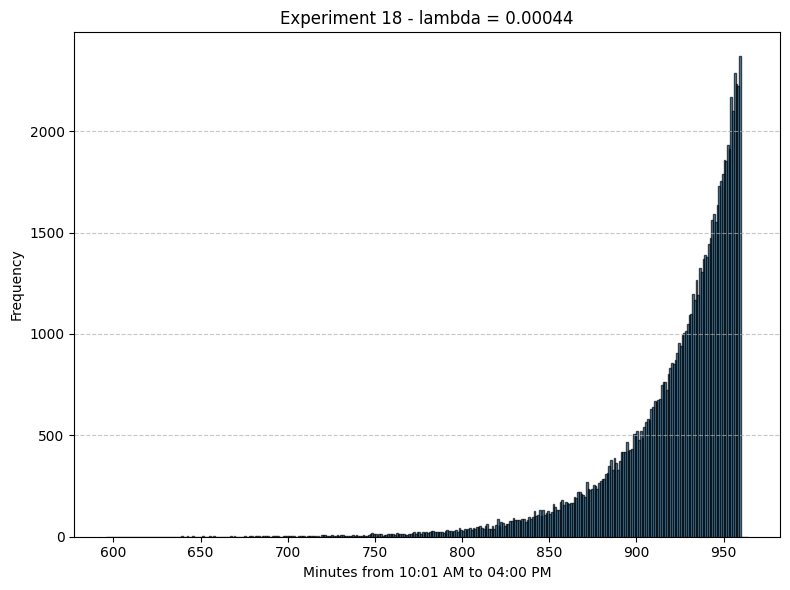

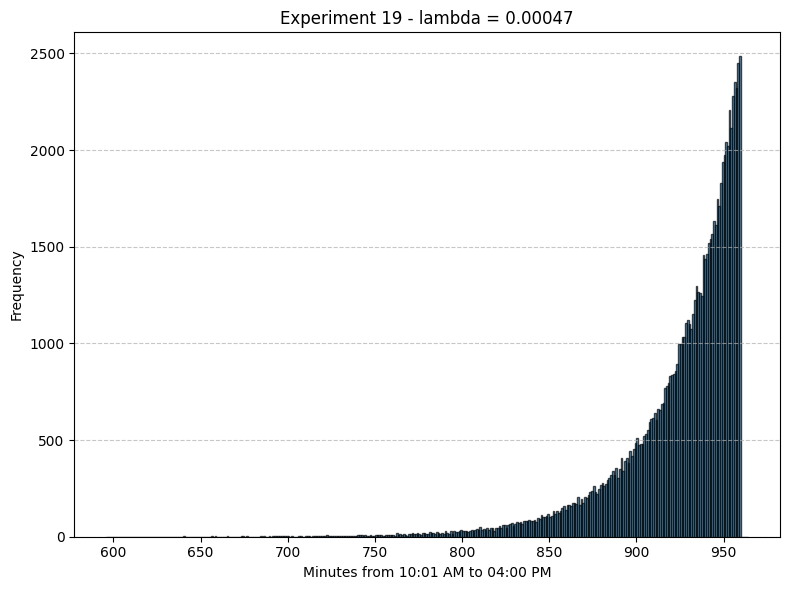

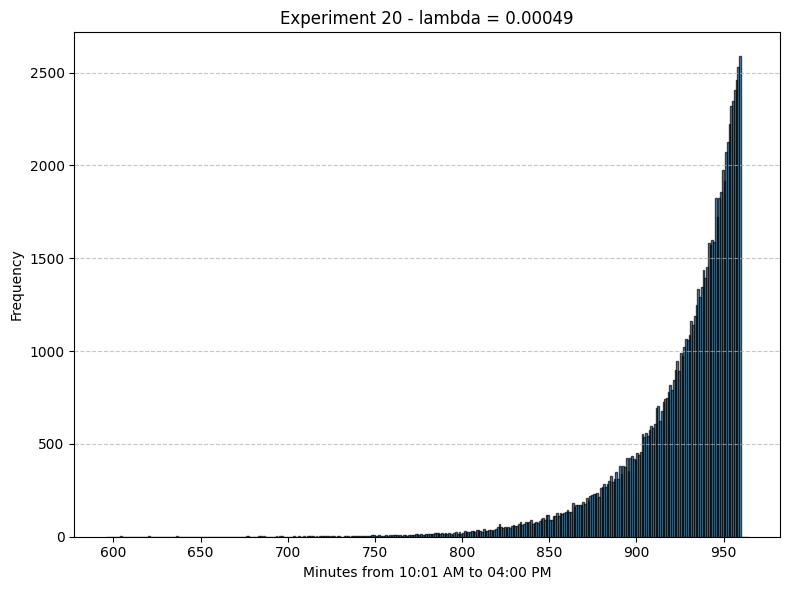

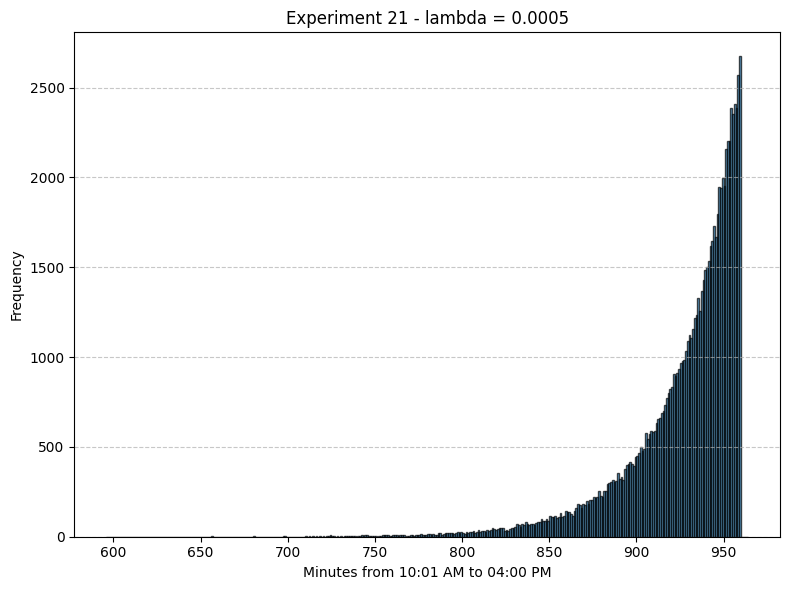

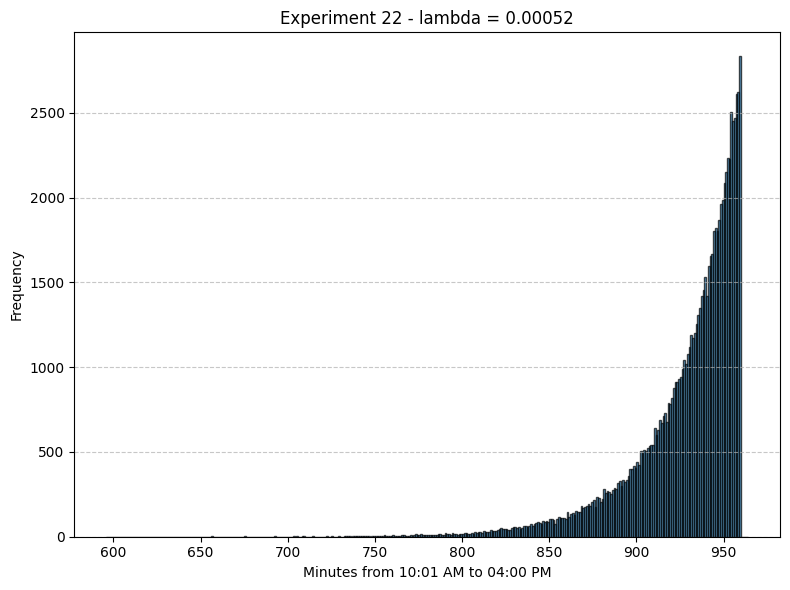

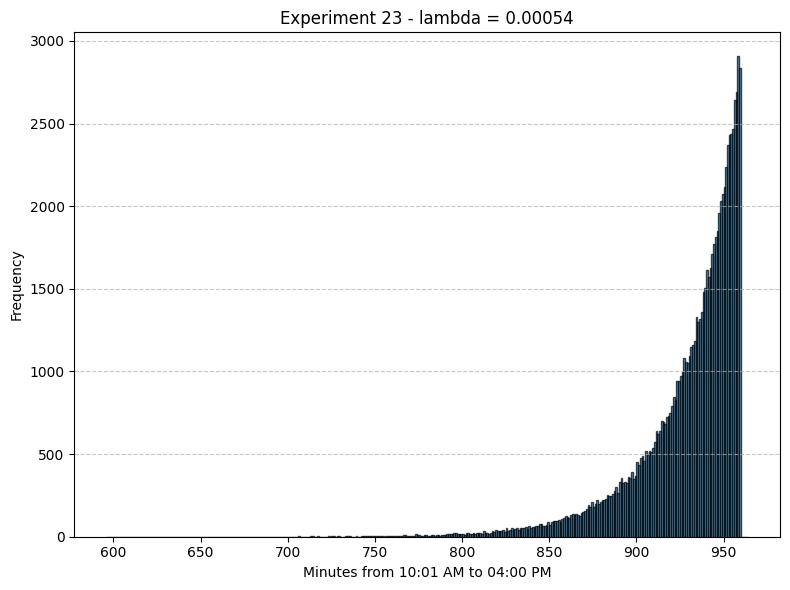

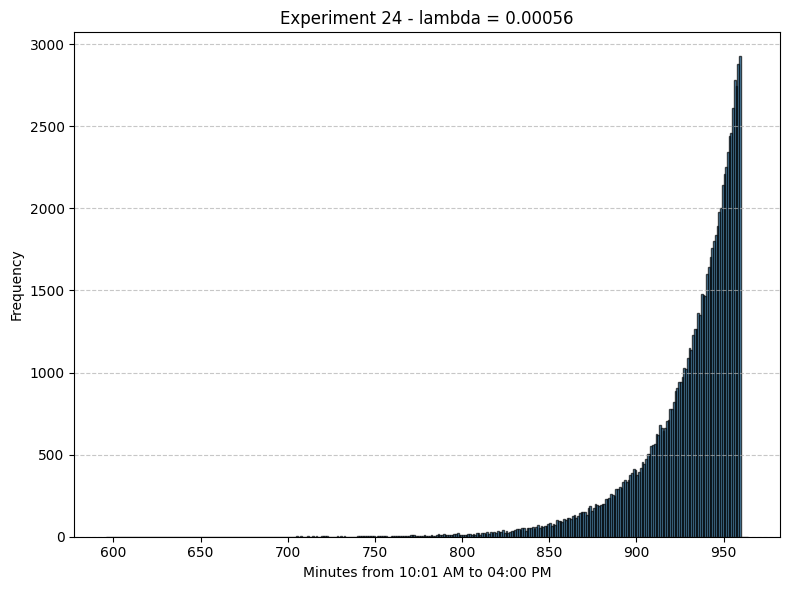

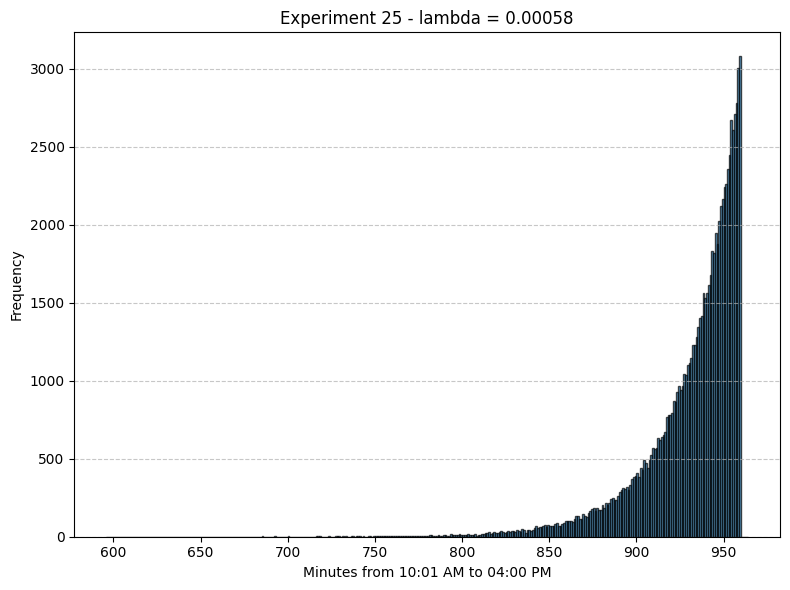

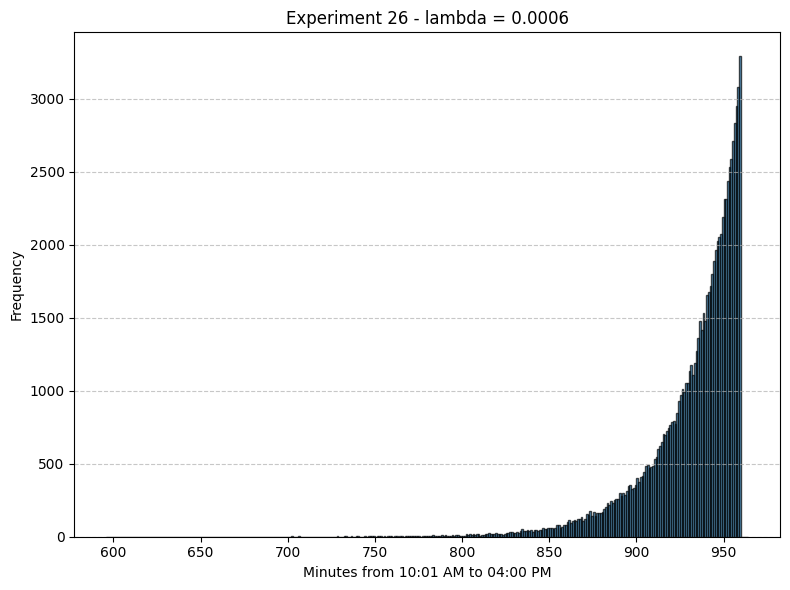

In [ ]:
import random
import math
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


# Define the start and end times of the interval
start_time = datetime.strptime("10:01 AM", "%I:%M %p")
end_time = datetime.strptime("04:00 PM", "%I:%M %p")


# Define parameters for experiments
lambda_values = [0.0001, 0.00012, 0.00015, 0.00017, 0.00018, 0.0002, 0.00021, 0.00022, 0.00025,0.00028, 0.0003, 0.00031, 0.00033, 0.00035, 0.00037, 0.00039, 0.00042,
                 0.00044, 0.00047, 0.00049, 0.0005, 0.00052, 0.00054, 0.00056, 0.00058, 0.0006]  # Different lambda values for each experiment

num_experiments = len(lambda_values)

num_trials_per_experiment = 90000


# Run experiments
experiment_results = run_experiments_exp(num_experiments, num_trials_per_experiment, start_time, end_time, lambda_values, True)

# Plot Histograms
plot_histograms_exp(experiment_results, start_time, end_time, lambda_values)

### ***The selected Lambda is 0.0002***

### *Plotting the results of a Powershell script that conducted 20000 trials using the choosen lambda (0.0006)*

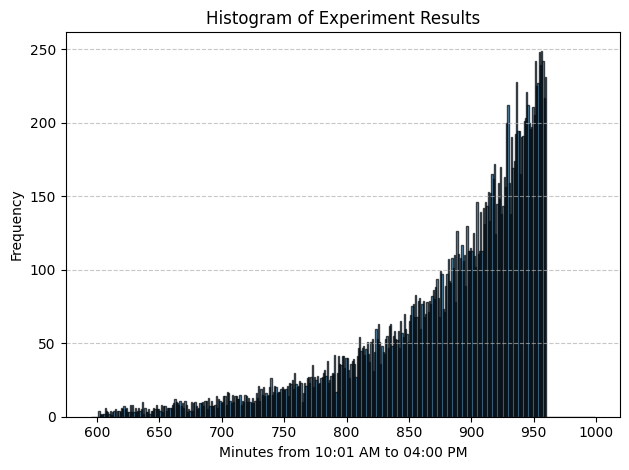

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt

# Read the experiment results from the text file
experiment_results = []
with open('/content/experiments_abnormal_late.txt', 'r', encoding='utf-16') as file:
    for line in file:
        parts = line.split(': ')
        if len(parts) == 2:
            timestamp_str = parts[1].strip()
            timestamp = datetime.strptime(timestamp_str, '%m/%d/%Y %H:%M:%S')
            experiment_results.append(timestamp)

# Convert timestamps to minutes
experiment_minutes = [(result.hour * 60) + result.minute for result in experiment_results]

# Create a histogram
plt.hist(experiment_minutes, bins=range(595, 1000), edgecolor='black', alpha=0.7)
plt.xlabel('Minutes from 10:01 AM to 04:00 PM')
plt.ylabel('Frequency')
plt.title('Histogram of Experiment Results')
# plt.xticks(range(450, 511, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## *t_end_abnormal_early: Selecting the lambda parameter of the exponential distirbution that will be used to draw a value from the interval [09:00 AM - 03:00 PM]*

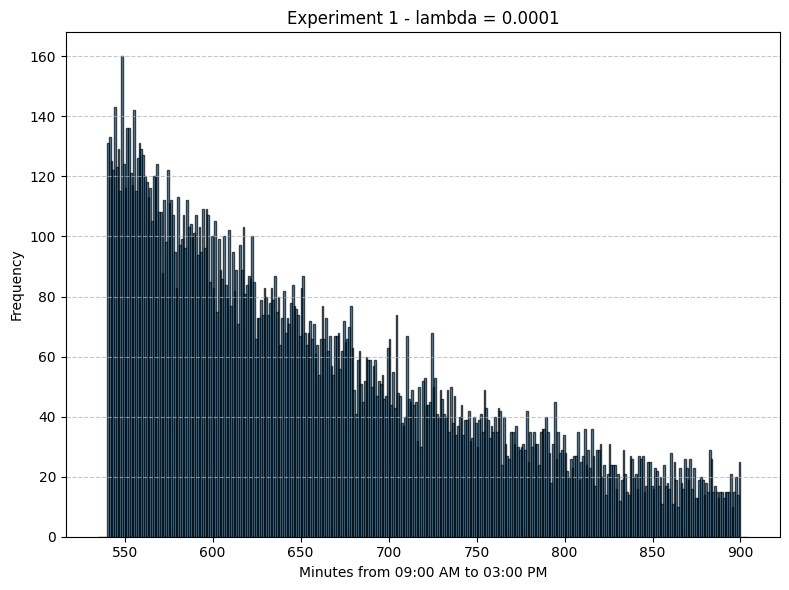

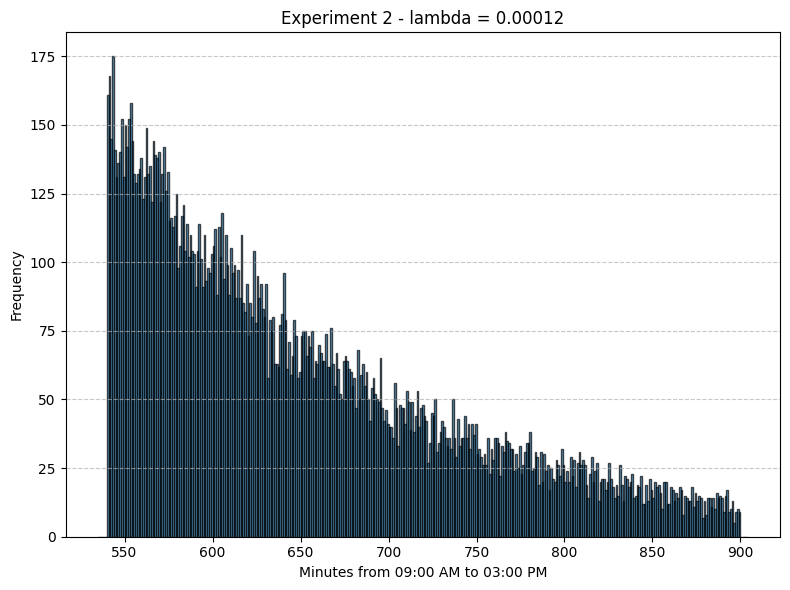

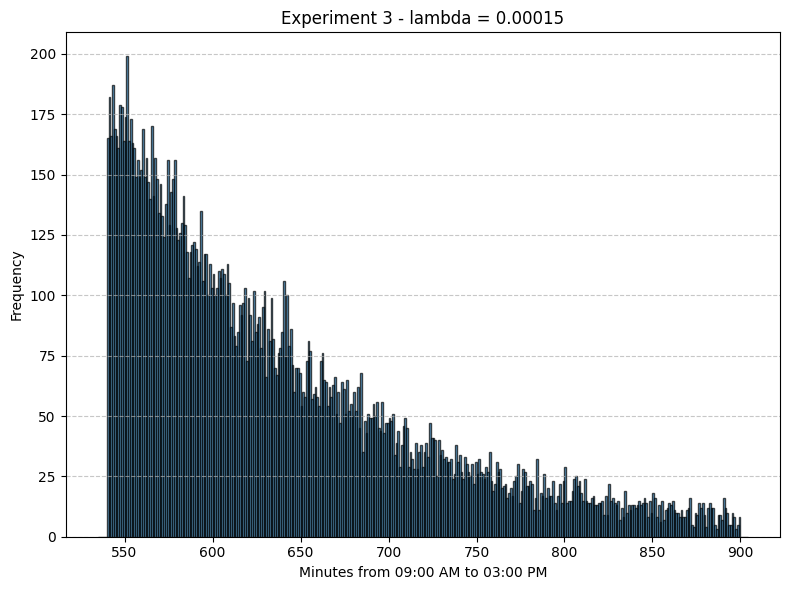

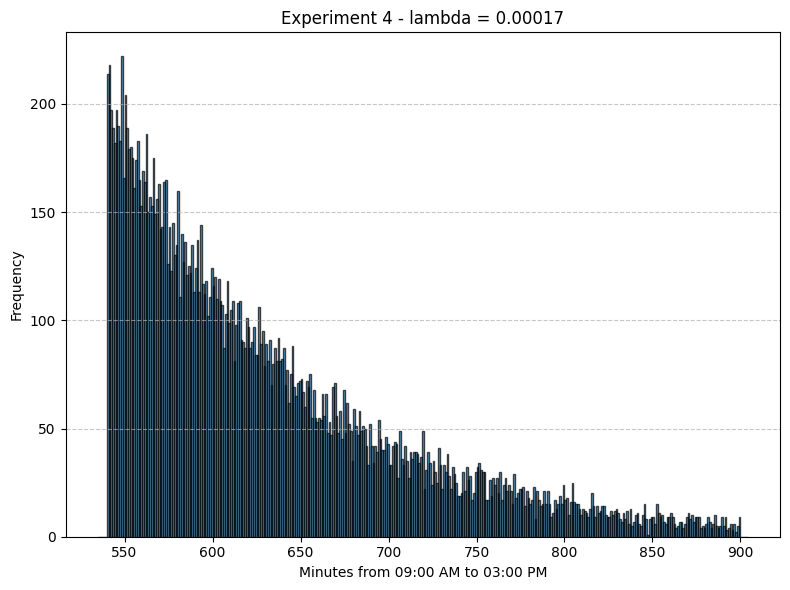

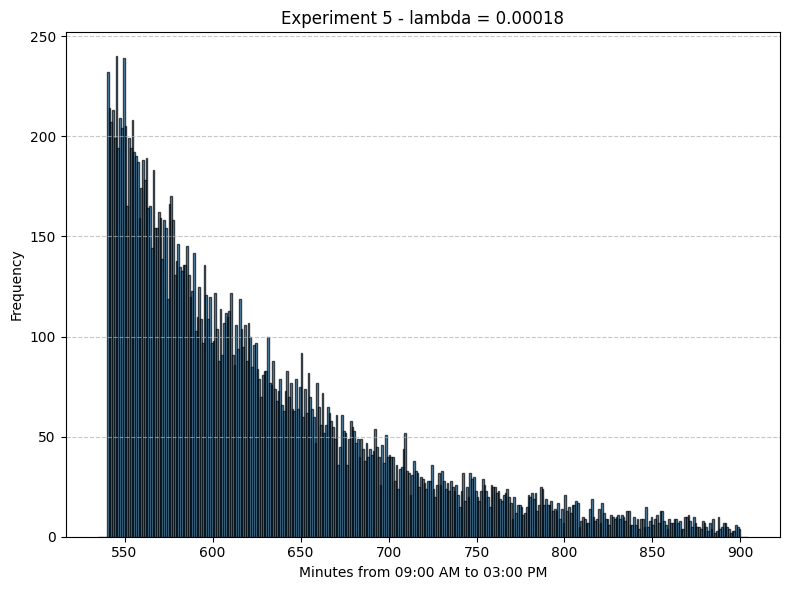

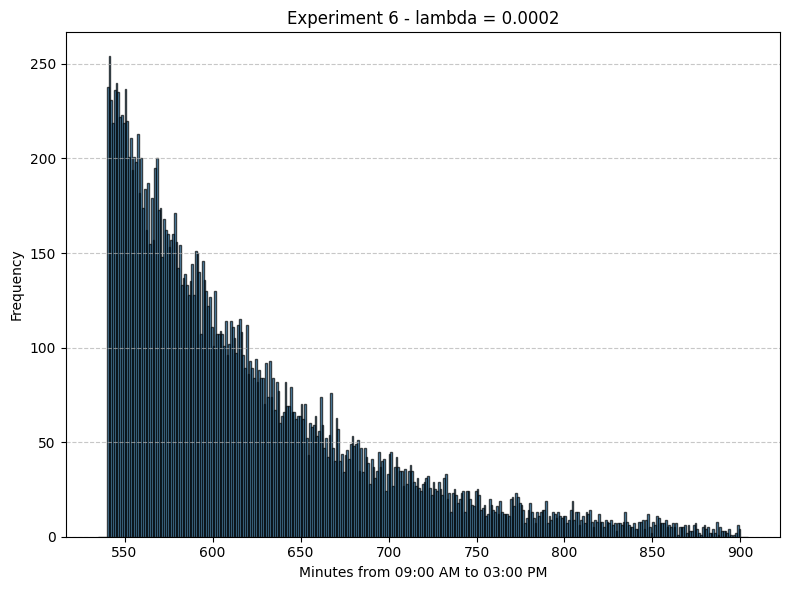

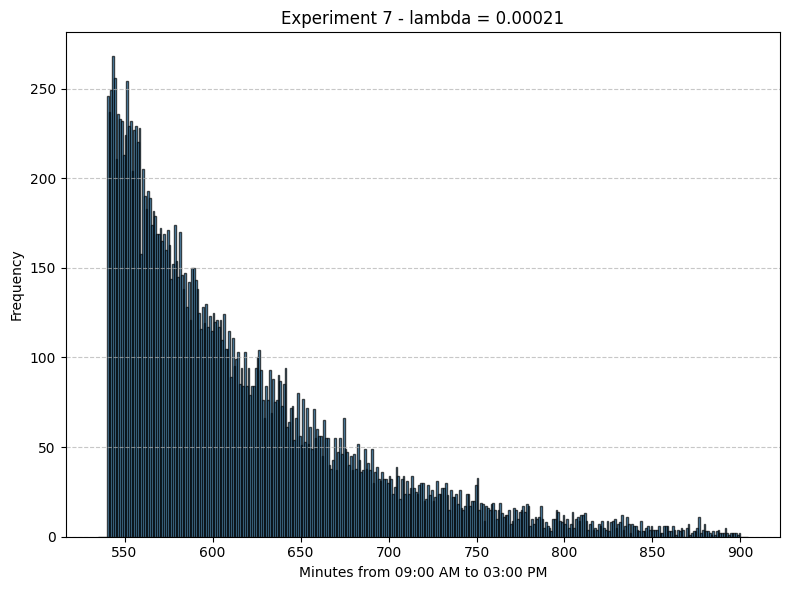

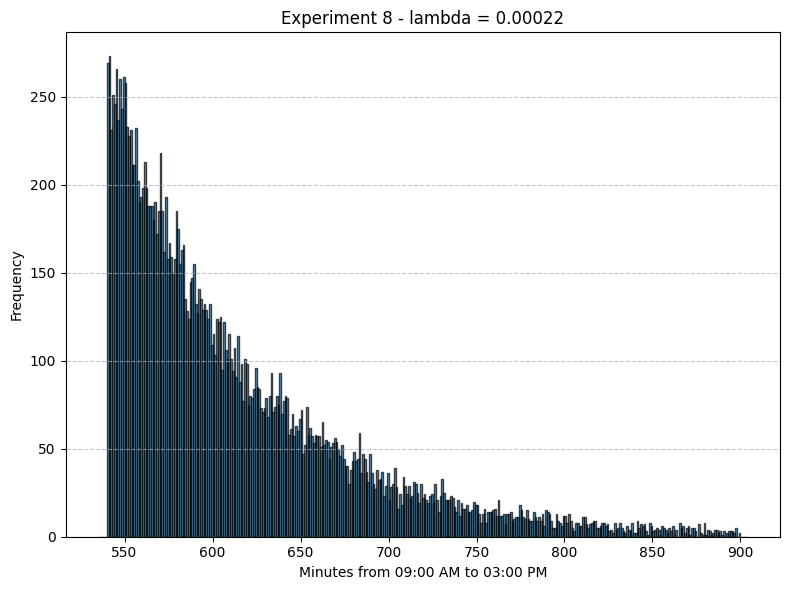

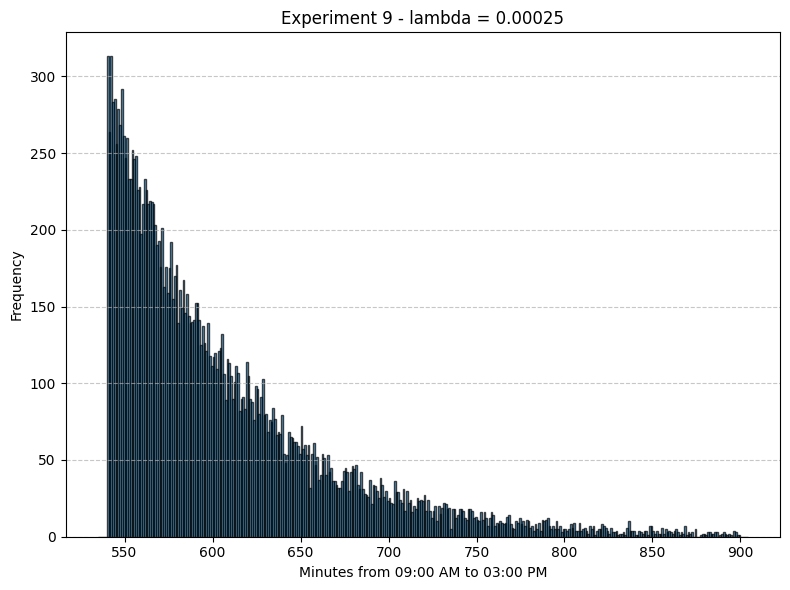

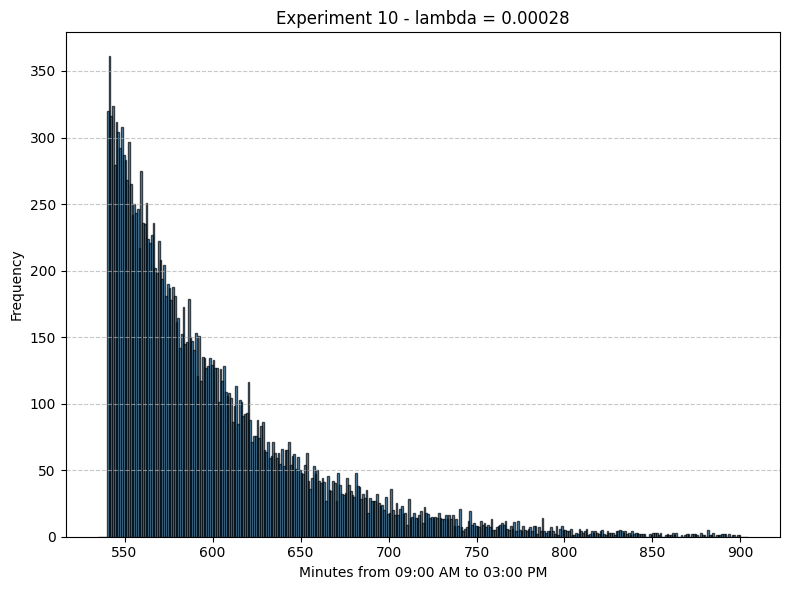

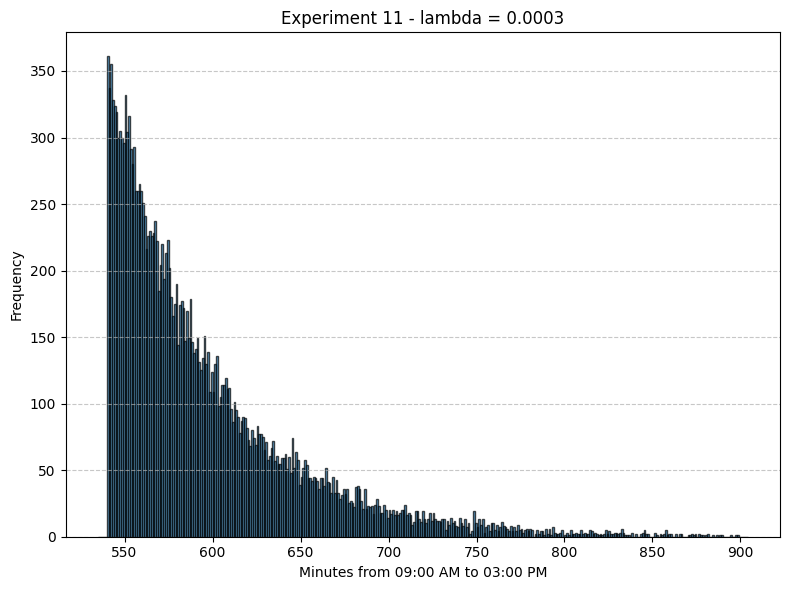

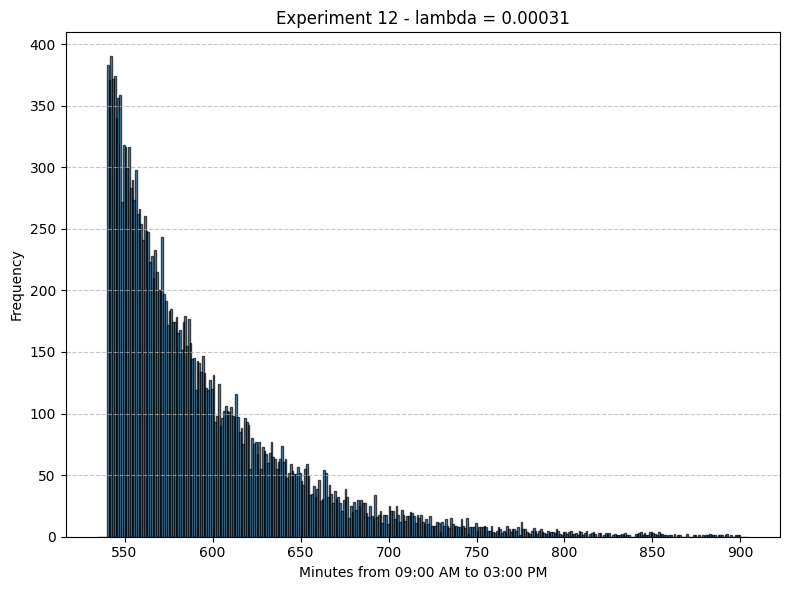

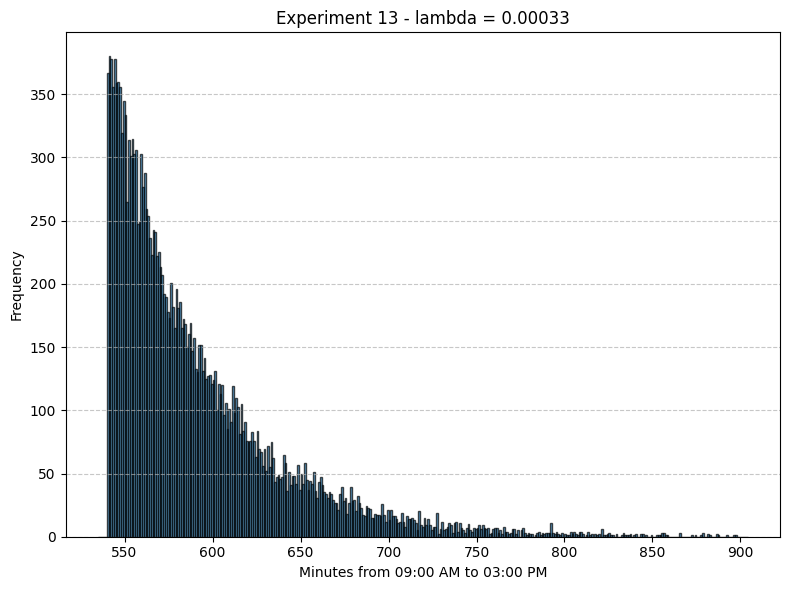

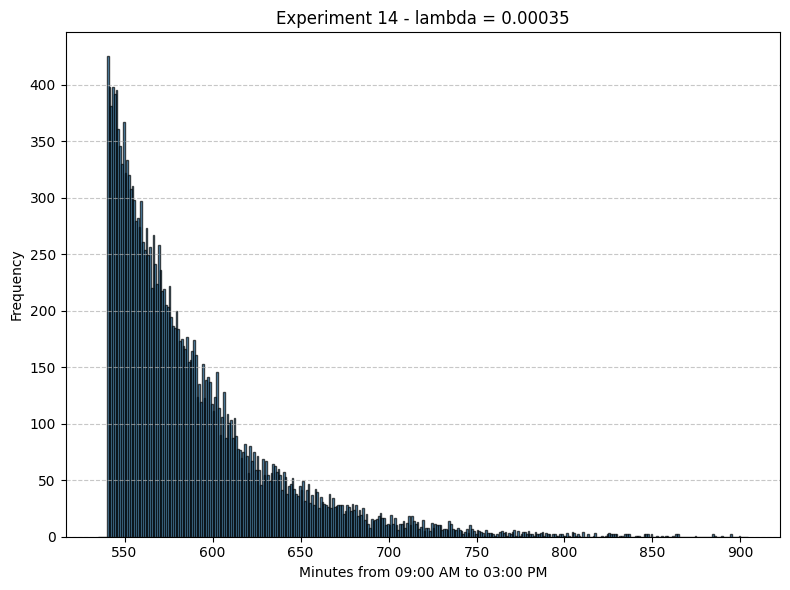

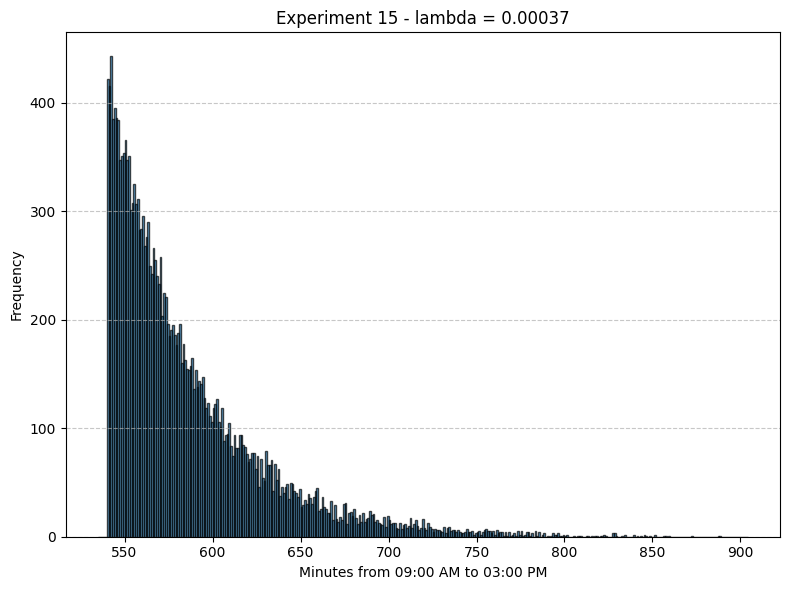

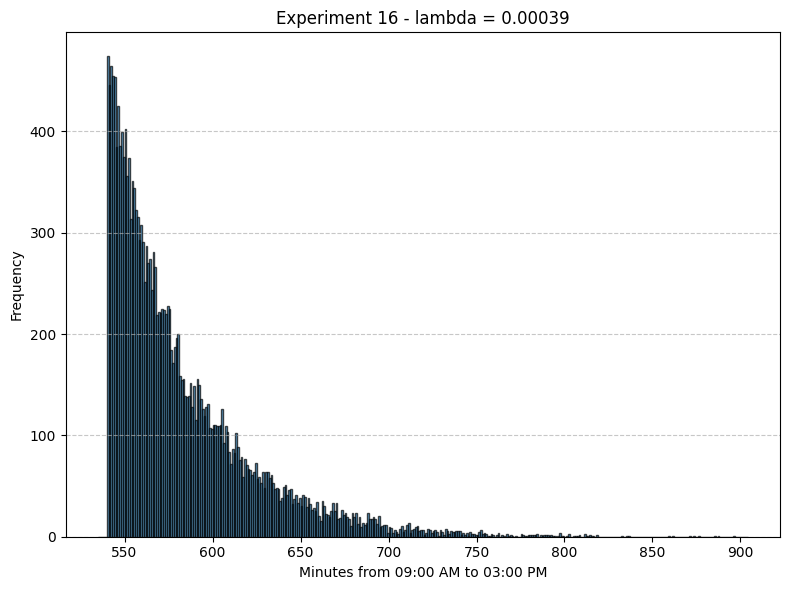

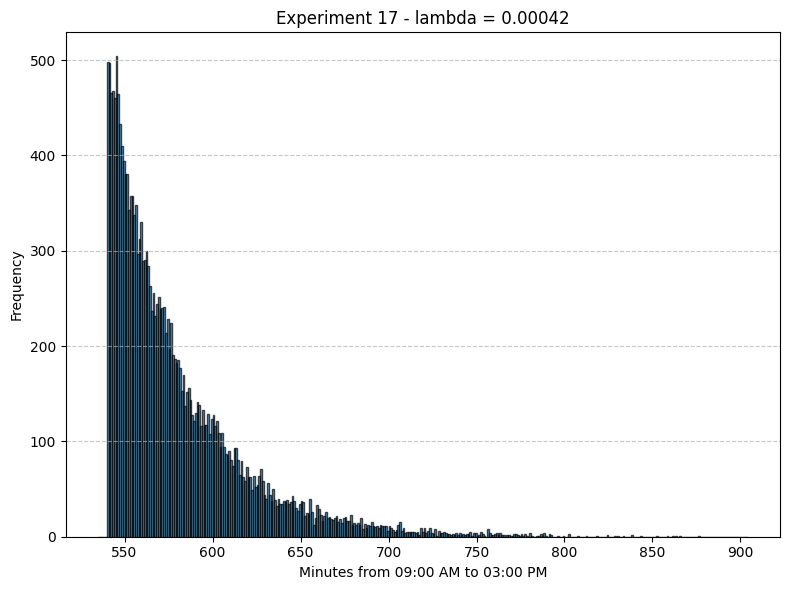

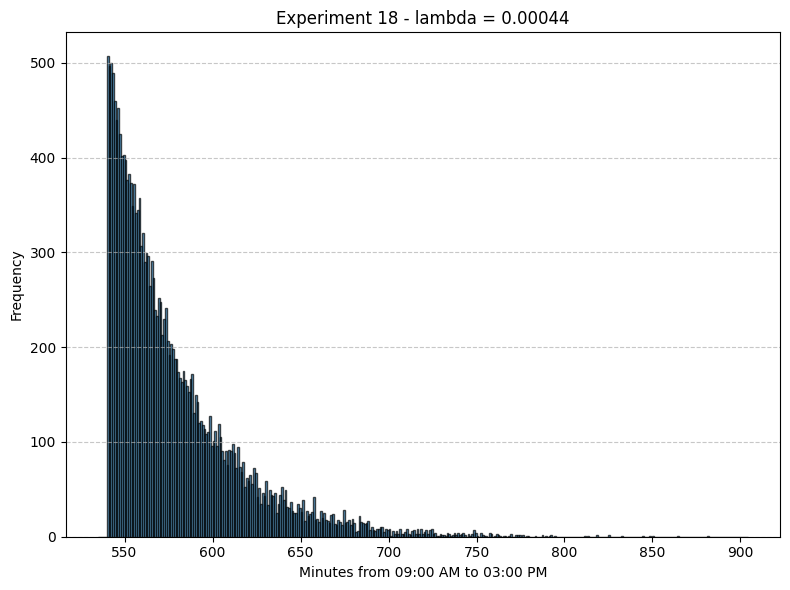

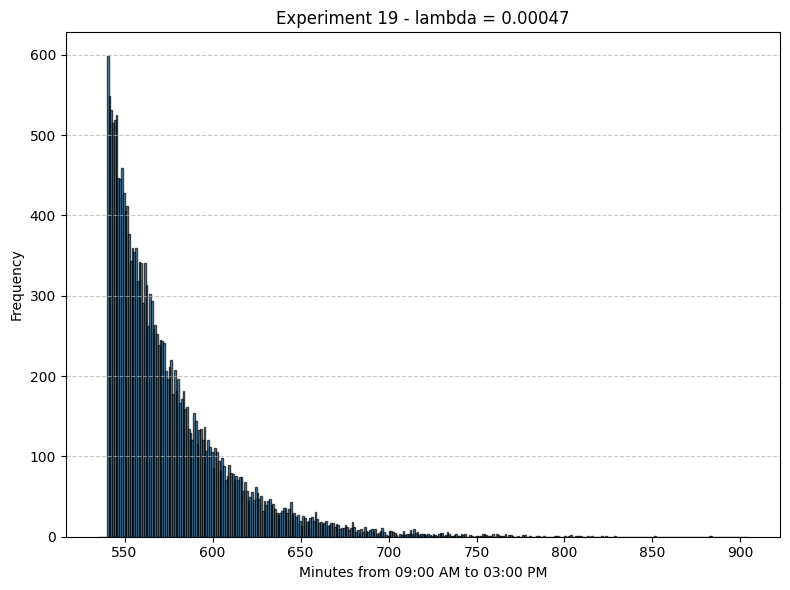

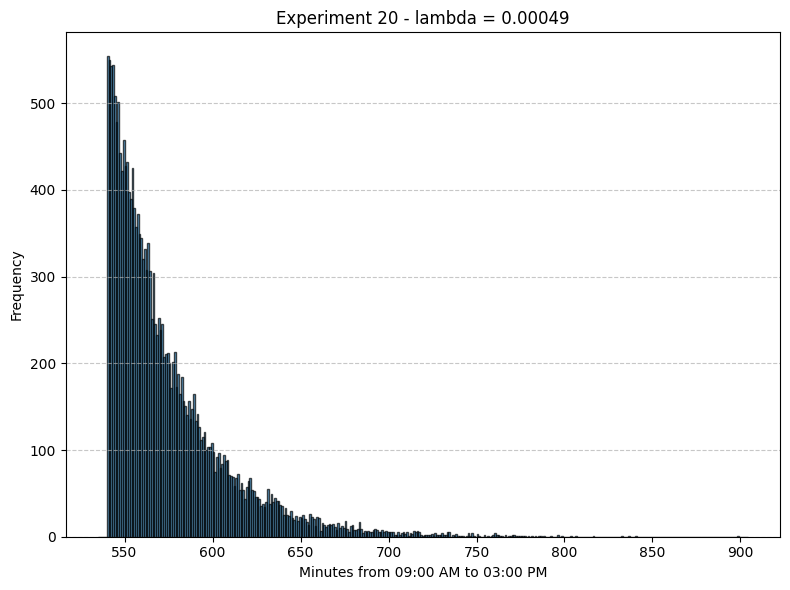

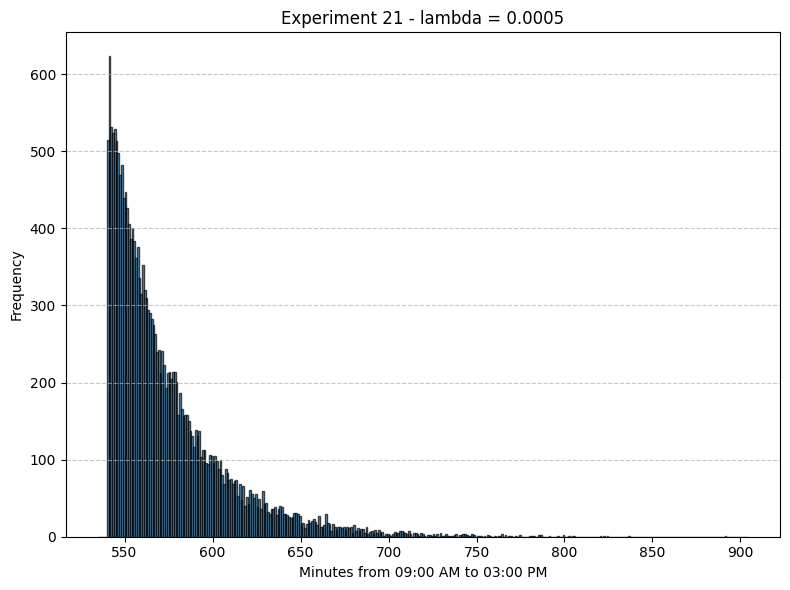

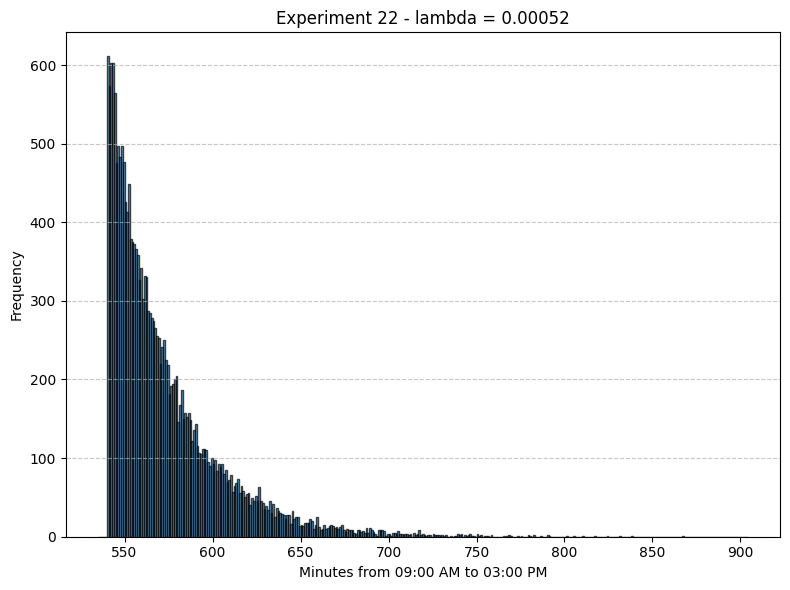

In [ ]:
# Define the start and end times of the interval
start_time = datetime.strptime("09:00 AM", "%I:%M %p")
end_time = datetime.strptime("03:00 PM", "%I:%M %p")

# Define parameters for experiments
lambda_values = [0.0001, 0.00012, 0.00015, 0.00017, 0.00018, 0.0002, 0.00021, 0.00022, 0.00025,0.00028, 0.0003, 0.00031, 0.00033, 0.00035, 0.00037, 0.00039, 0.00042,
                 0.00044, 0.00047, 0.00049, 0.0005, 0.00052] # Different lambda values for each experiment

num_experiments = len(lambda_values)
num_trials = 20000

# Run experiments
experiment_results = run_experiments_exp(num_experiments, num_trials, start_time, end_time, lambda_values)
plot_histograms_exp(experiment_results, start_time, end_time, lambda_values)

# picked Lambda 0.0003

## *t_end_late: Selecting the lambda parameter of the flipped exponential distirbution that will be used to draw a value from the interval [05:31 PM - 08:00 PM]*

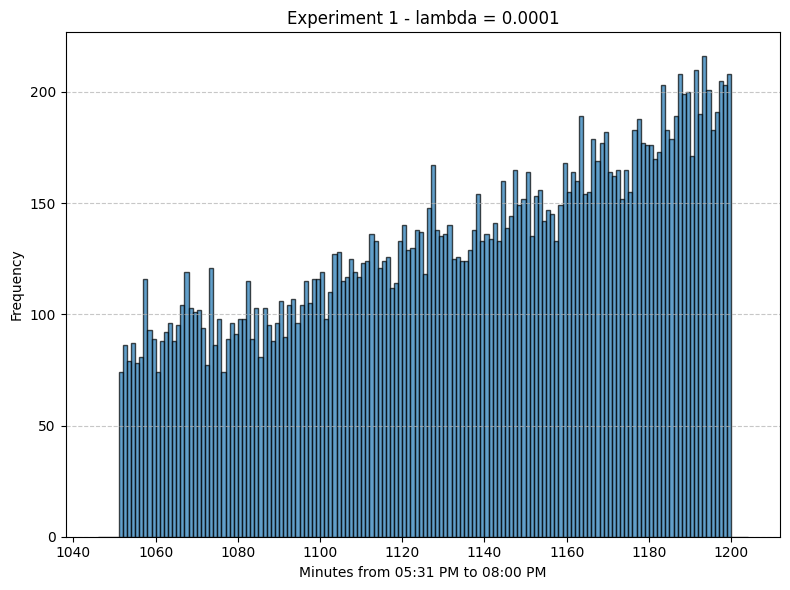

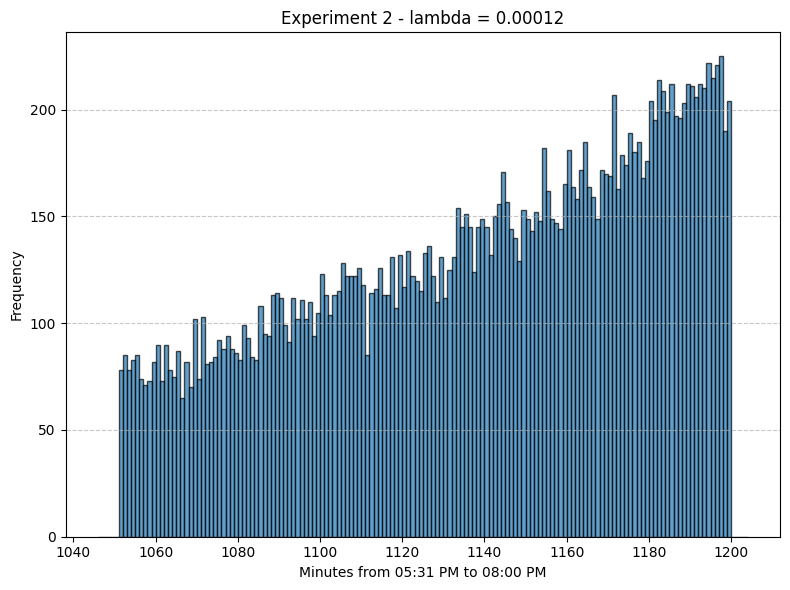

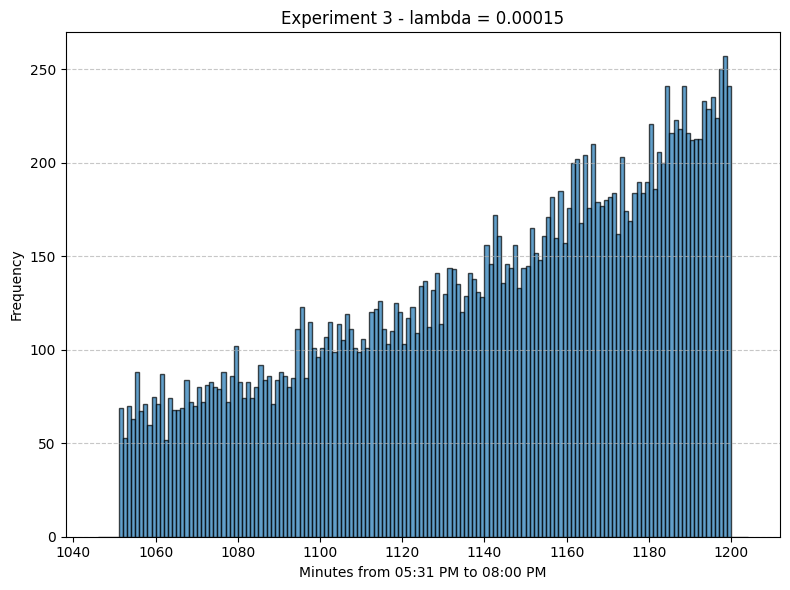

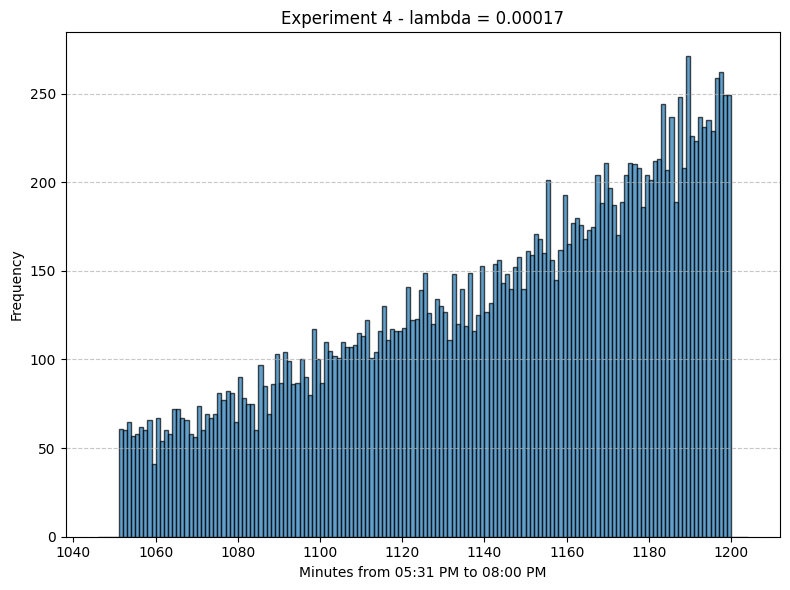

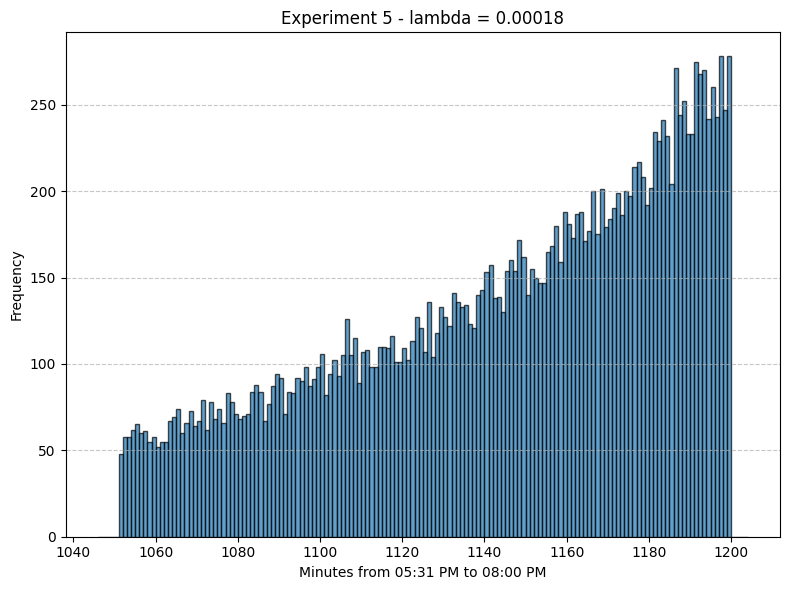

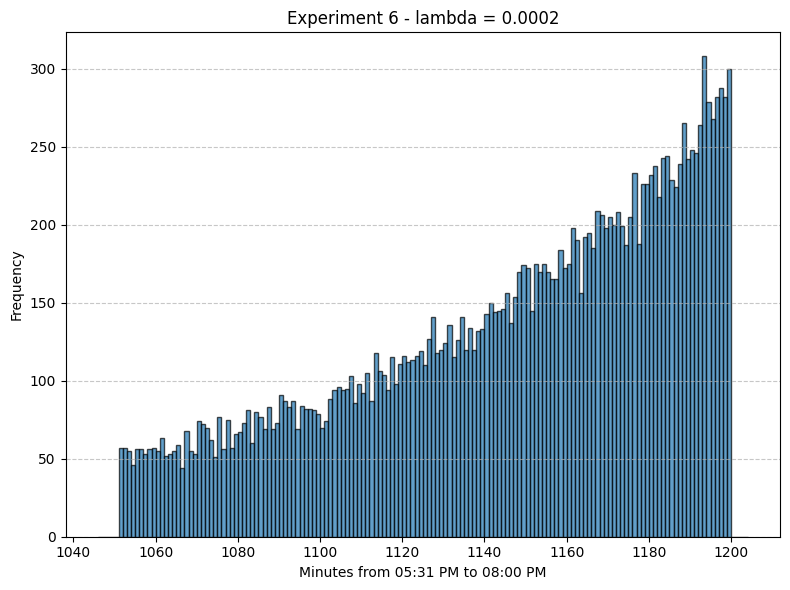

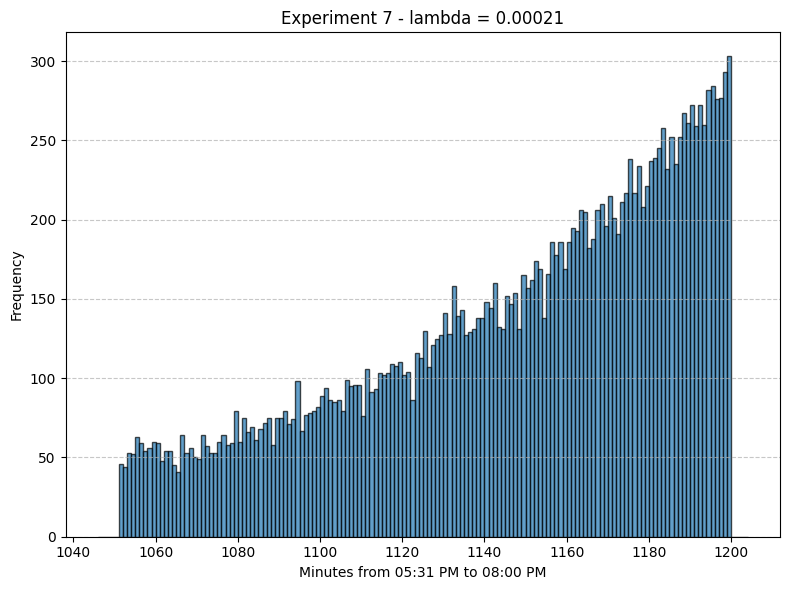

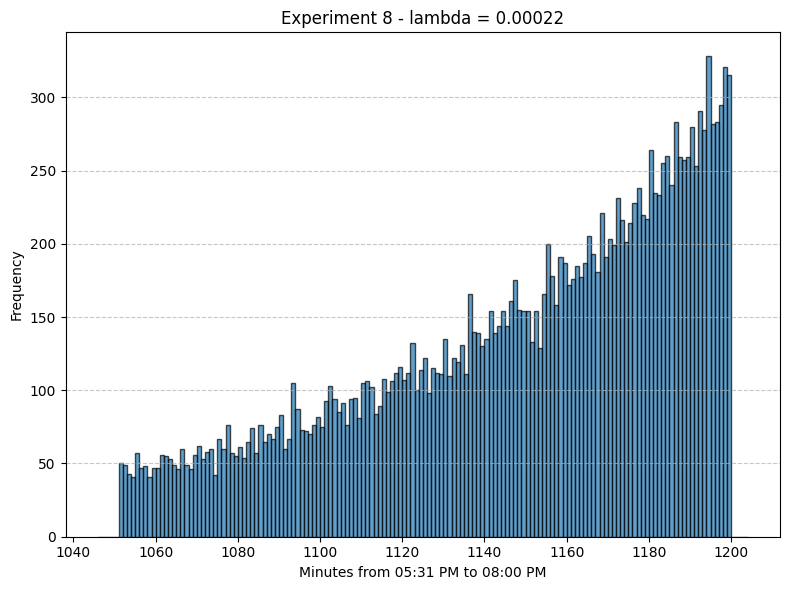

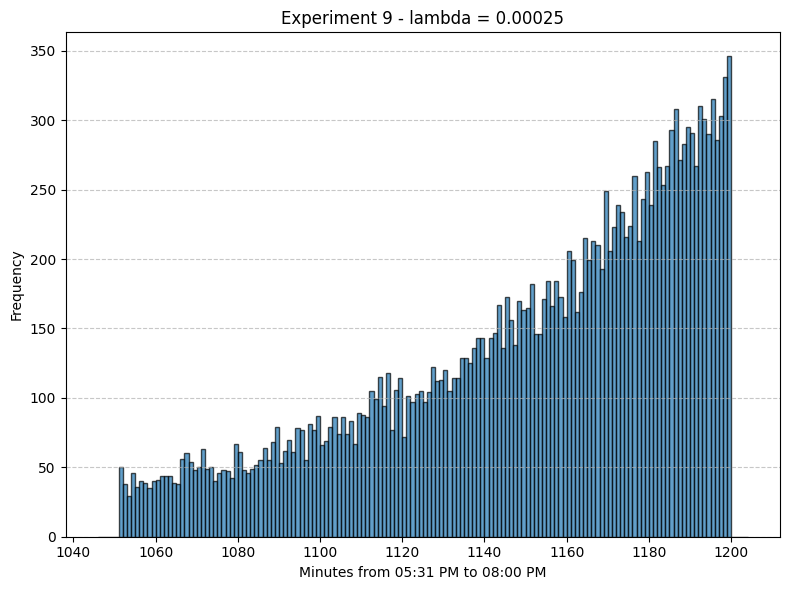

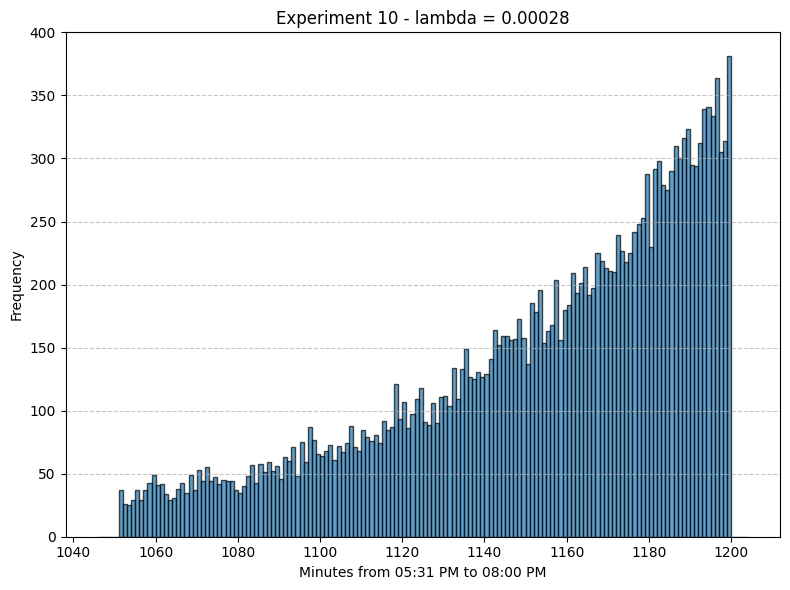

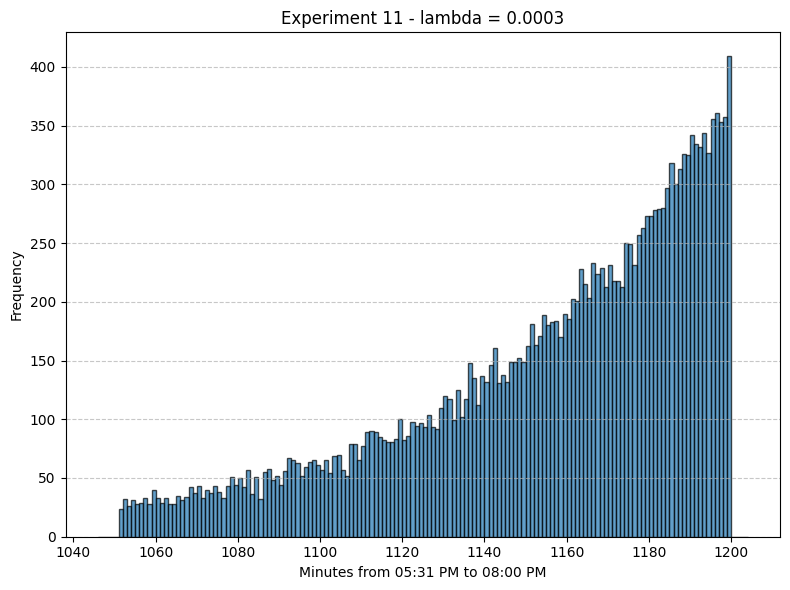

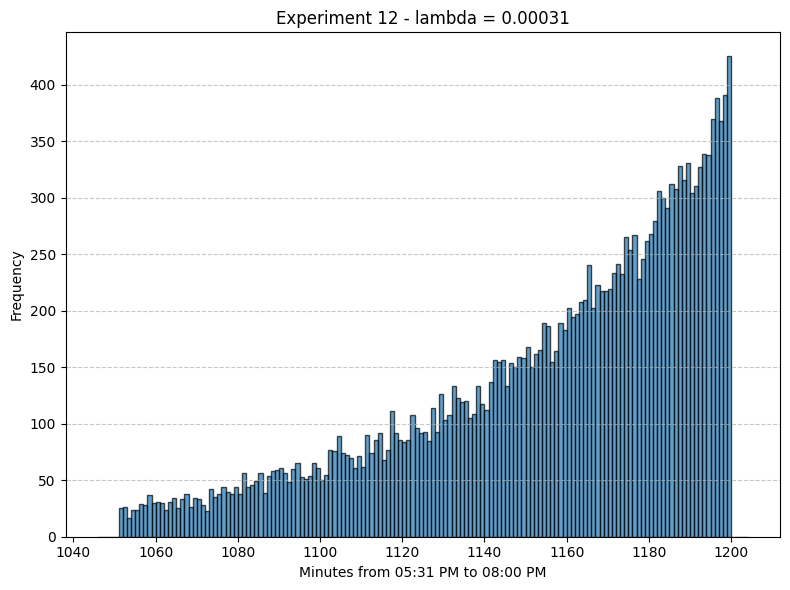

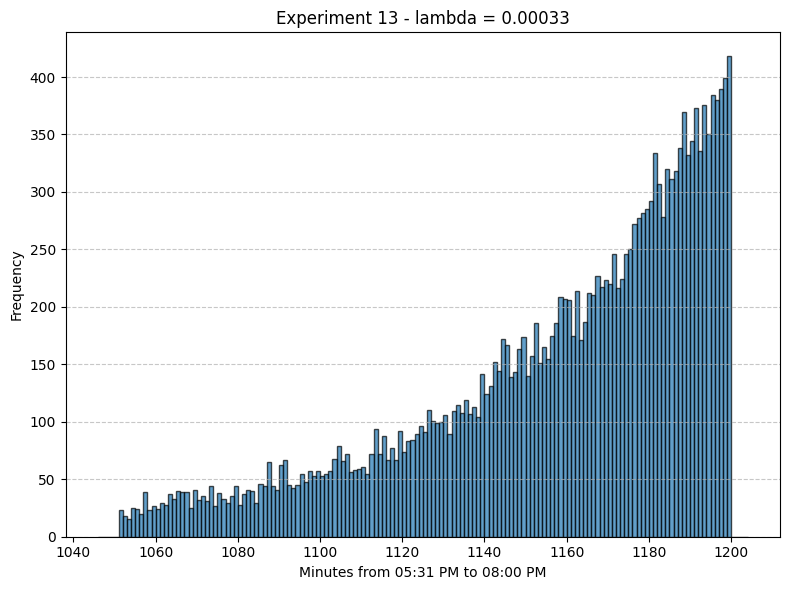

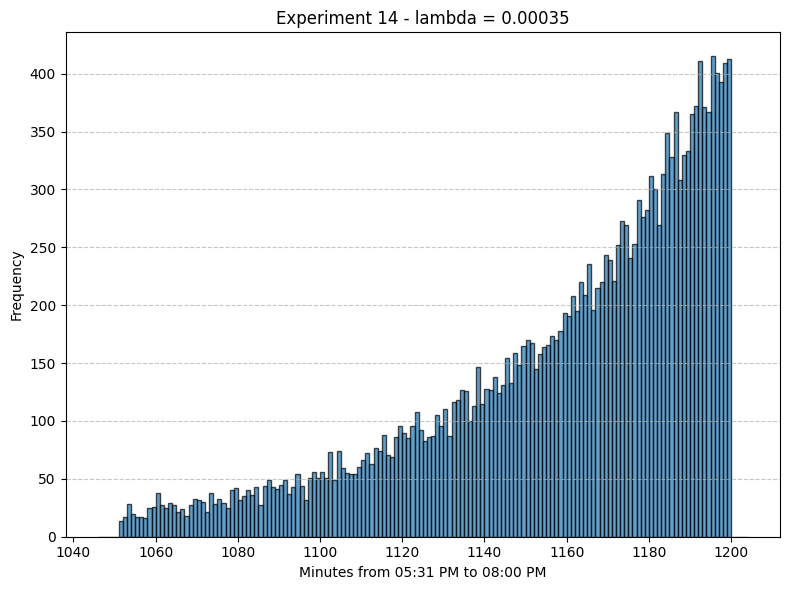

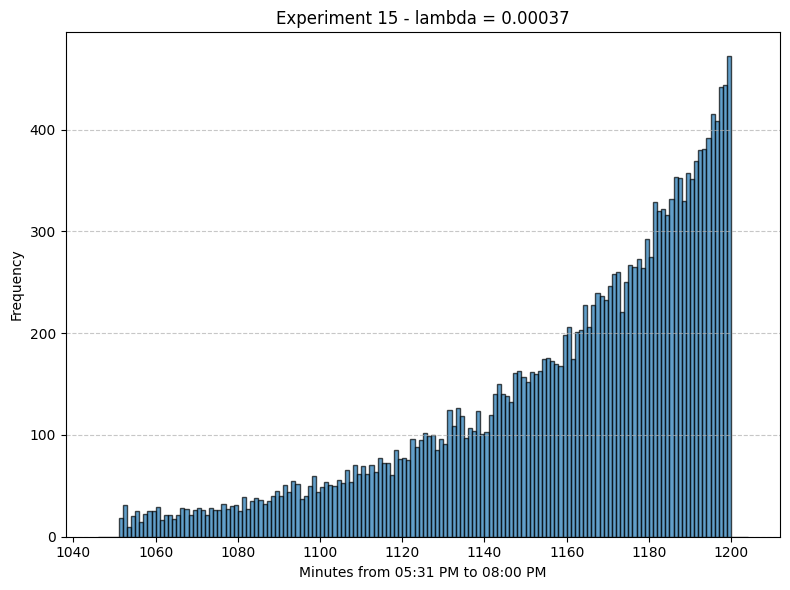

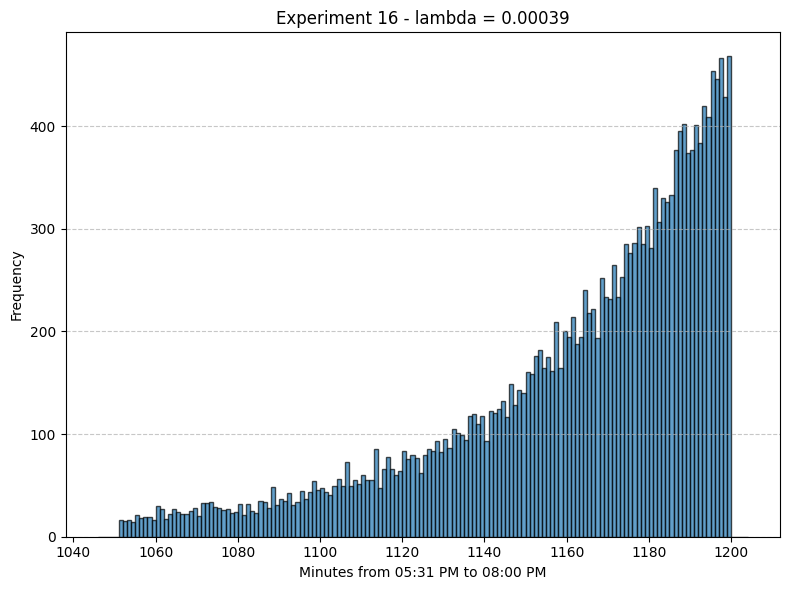

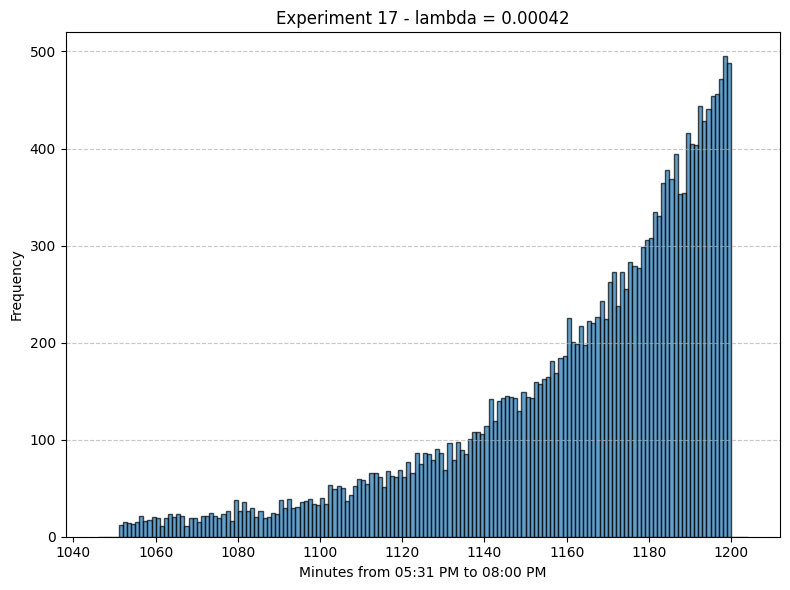

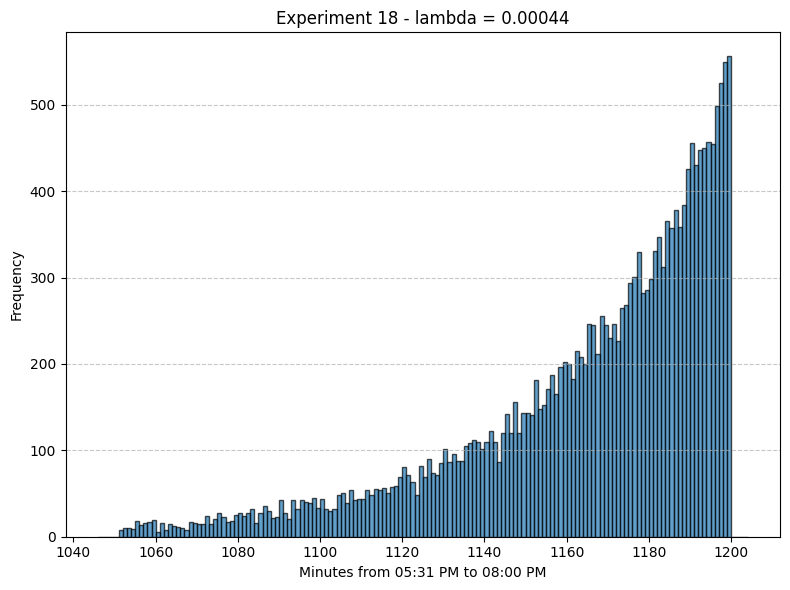

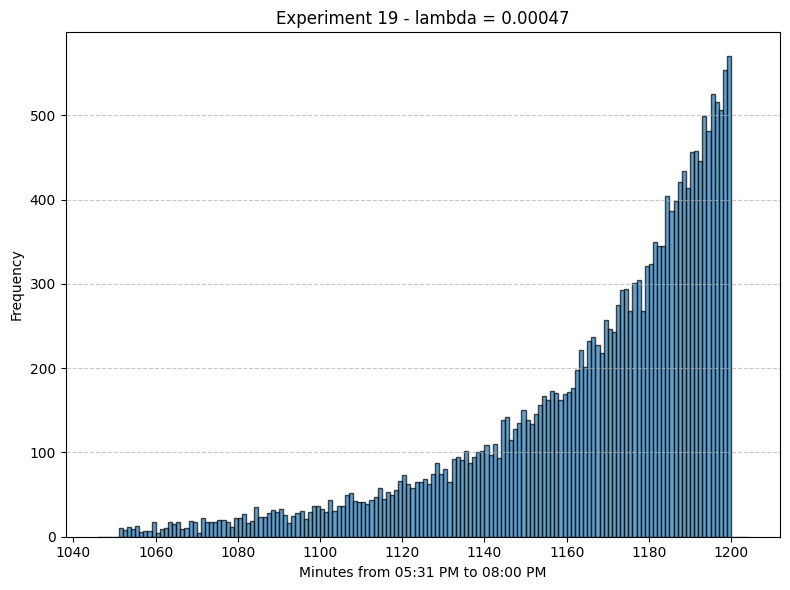

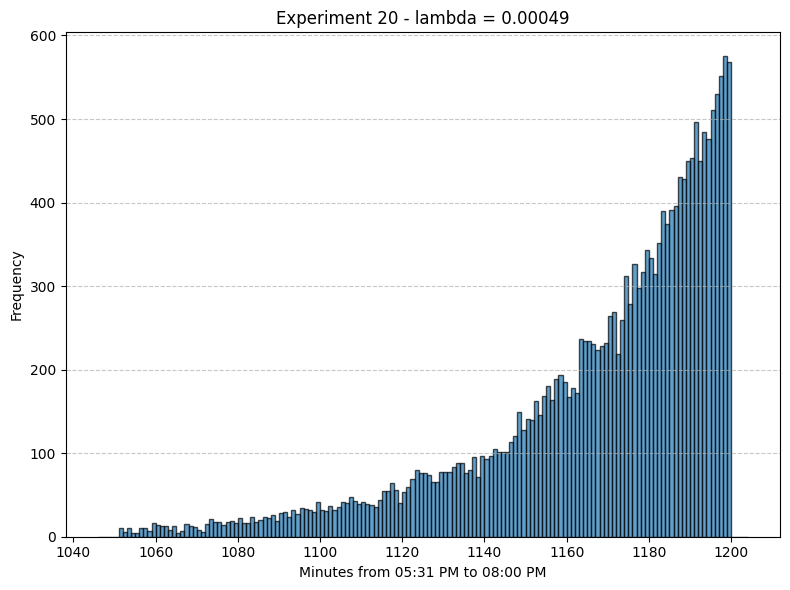

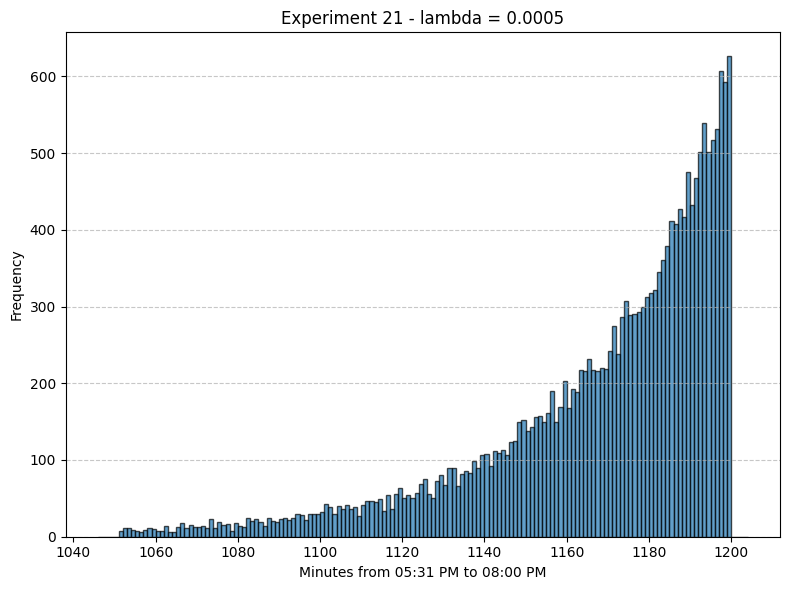

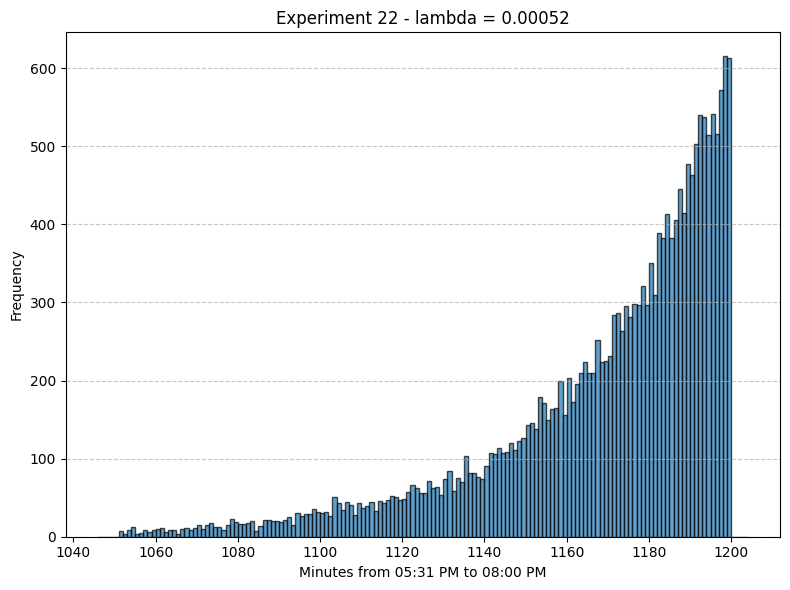

In [ ]:
# Define the start and end times of the interval
start_time = datetime.strptime("05:31 PM", "%I:%M %p")
end_time = datetime.strptime("08:00 PM", "%I:%M %p")

# Define parameters for experiments
lambda_values = [0.0001, 0.00012, 0.00015, 0.00017, 0.00018, 0.0002, 0.00021, 0.00022, 0.00025,0.00028, 0.0003, 0.00031, 0.00033, 0.00035, 0.00037, 0.00039, 0.00042,
                 0.00044, 0.00047, 0.00049, 0.0005, 0.00052] # Different lambda values for each experiment

num_experiments = len(lambda_values)
num_trials = 20000

# Run experiments
experiment_results = run_experiments_exp(num_experiments, num_trials, start_time, end_time, lambda_values, True)
plot_histograms_exp(experiment_results, start_time, end_time, lambda_values)

# lambda = 0.00052

## *t_end_abnormal_late: Selecting the lambda parameter of the flipped exponential distirbution that will be used to draw a value from the interval [08:01 PM - 02:30 AM (next day)]*

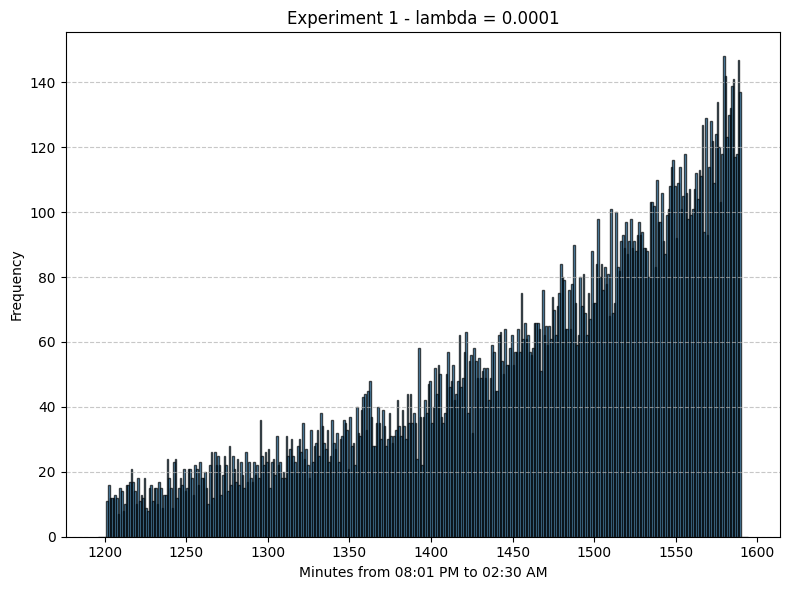

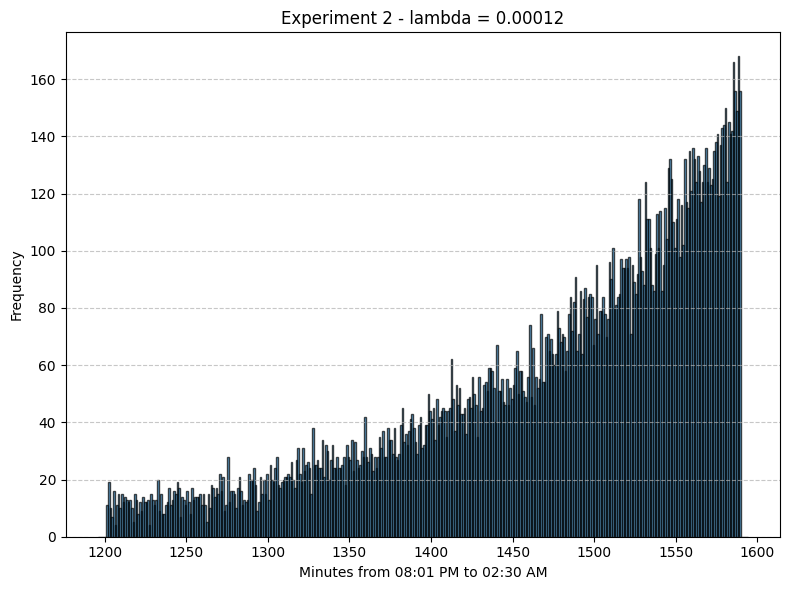

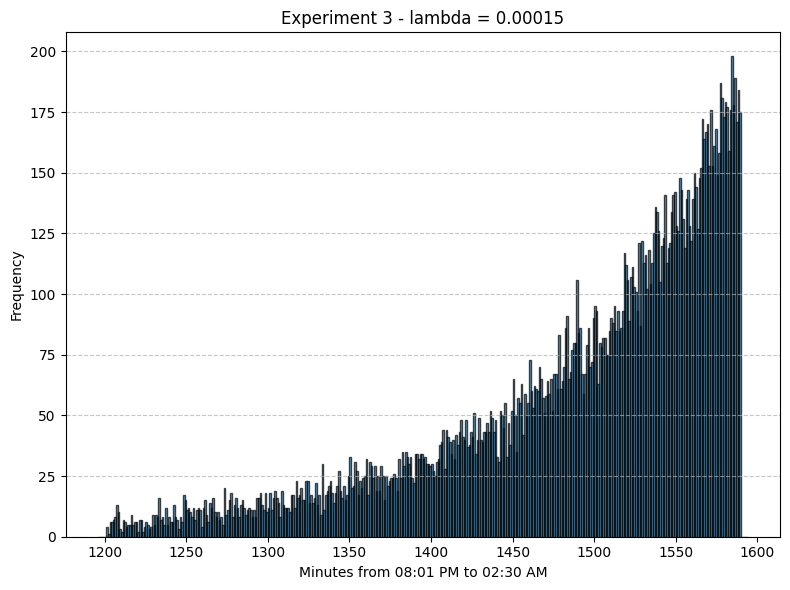

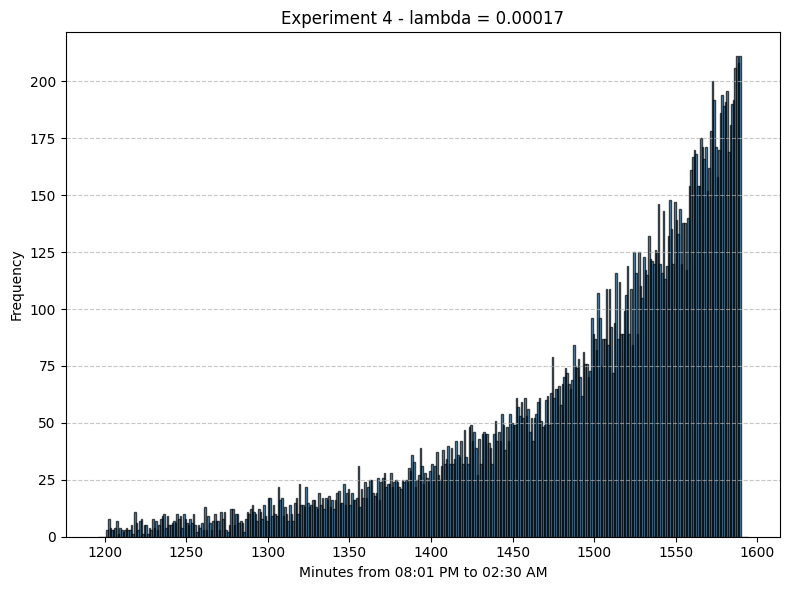

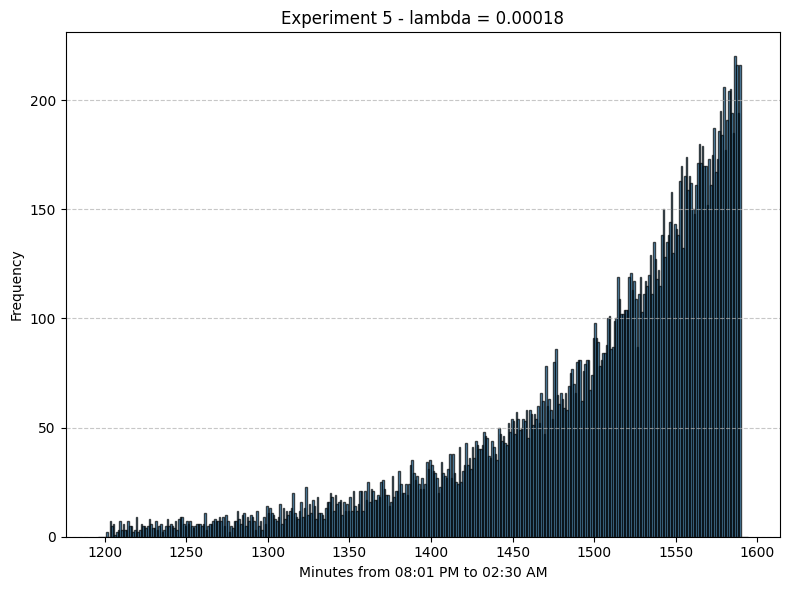

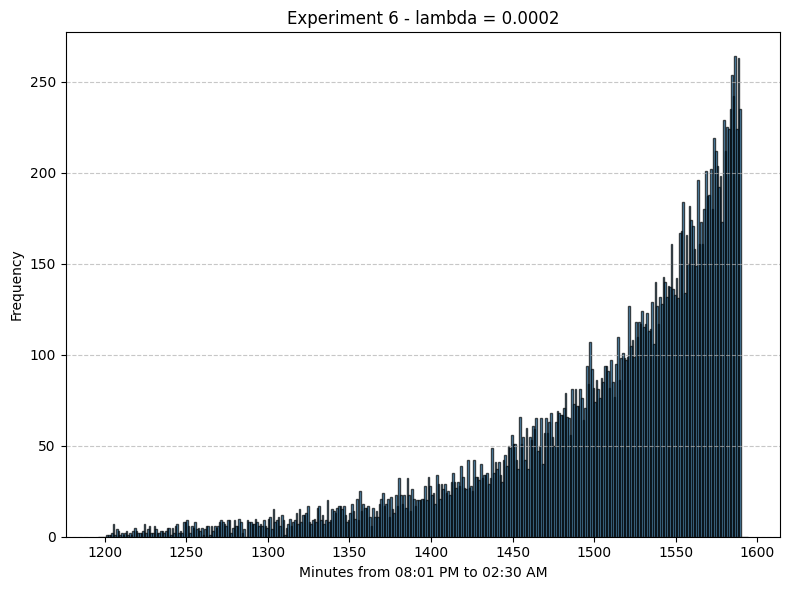

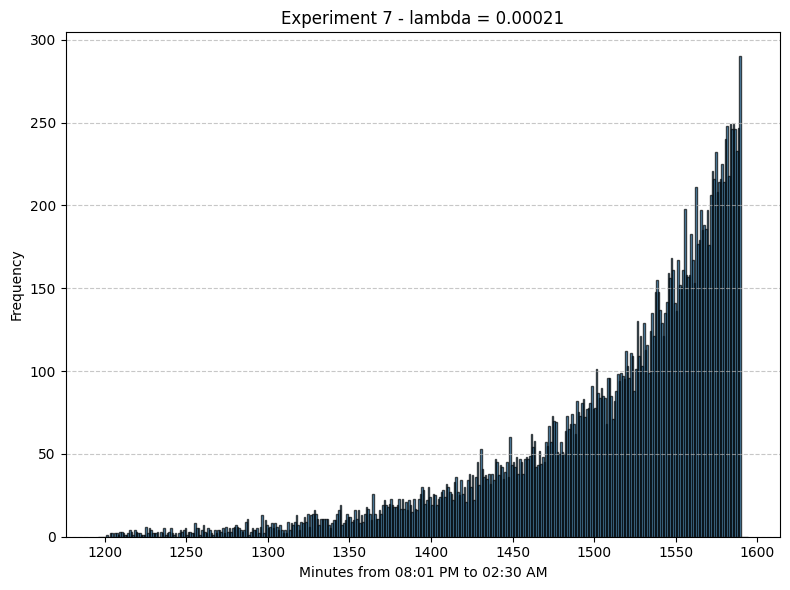

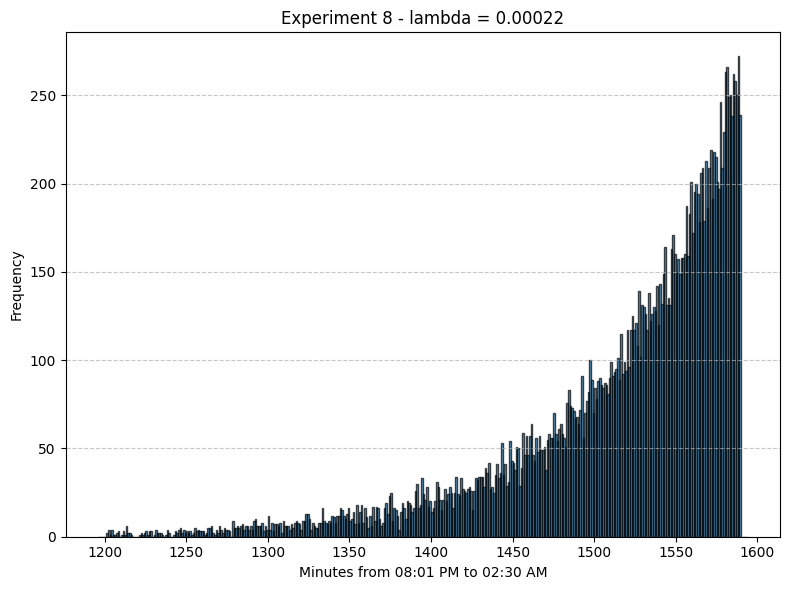

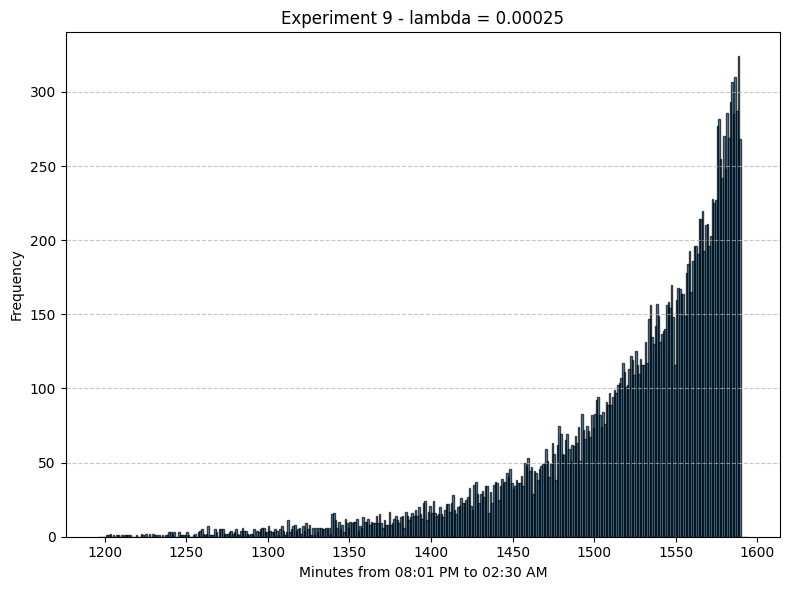

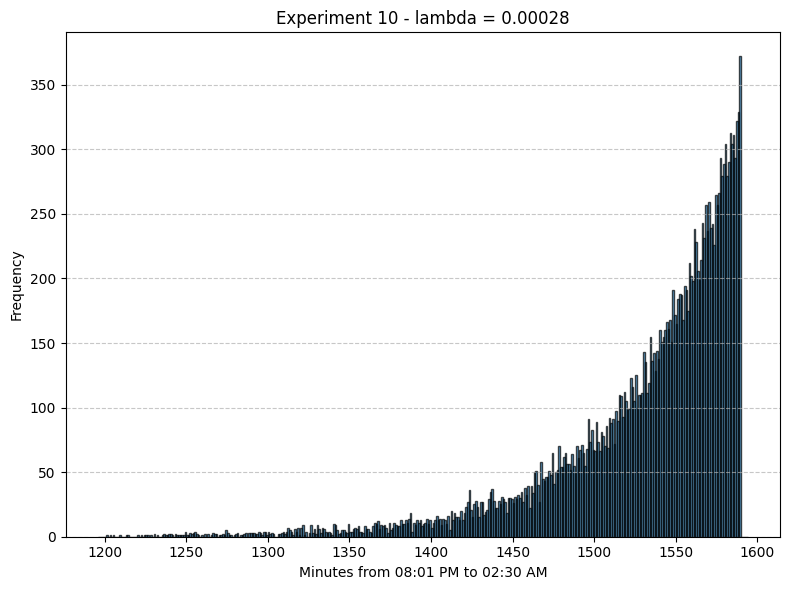

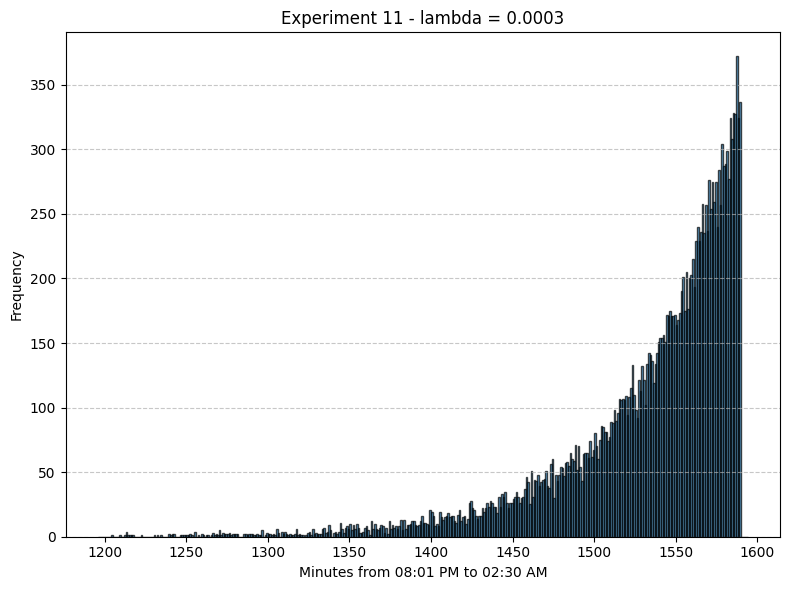

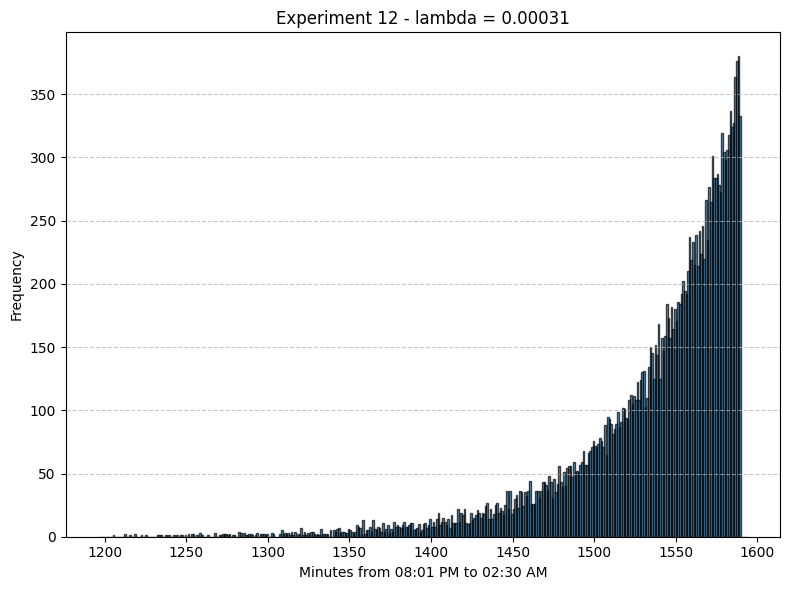

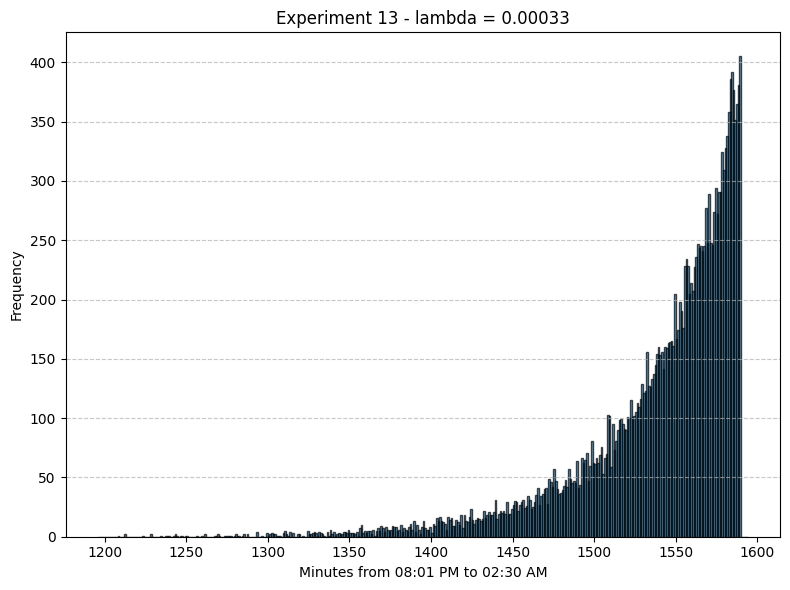

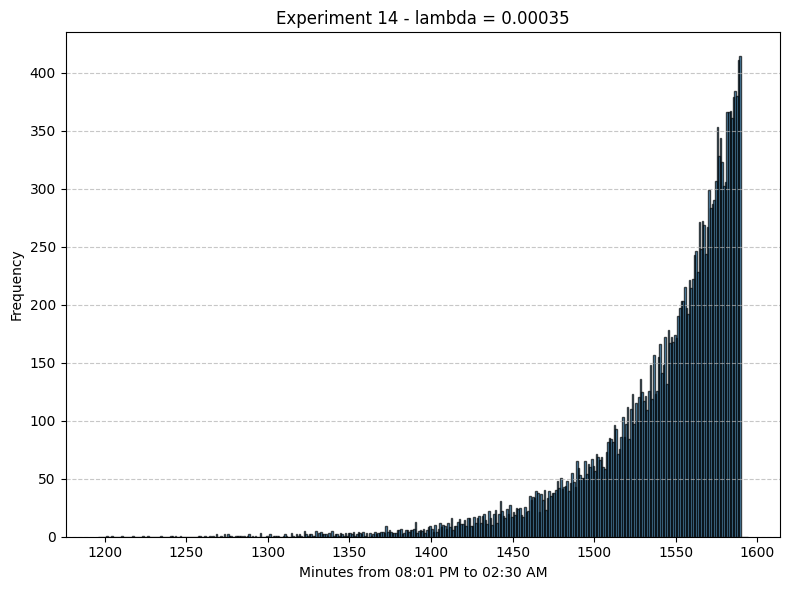

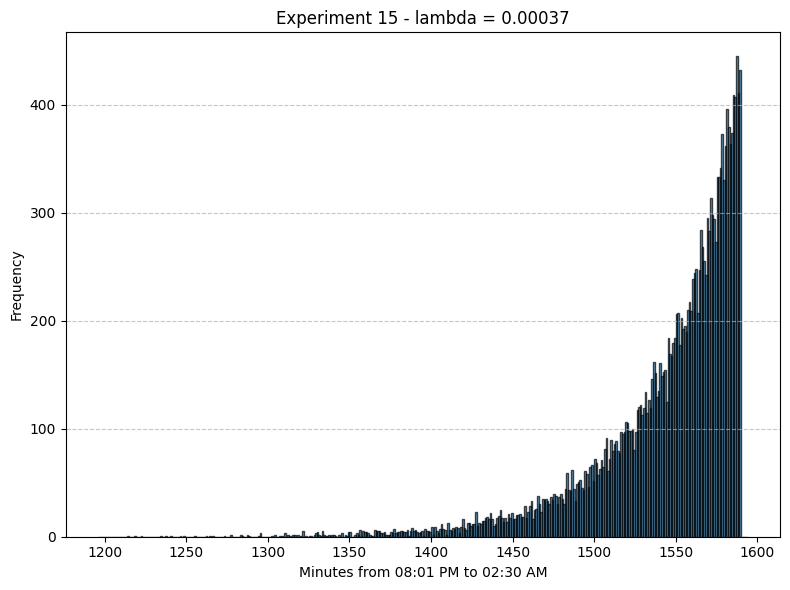

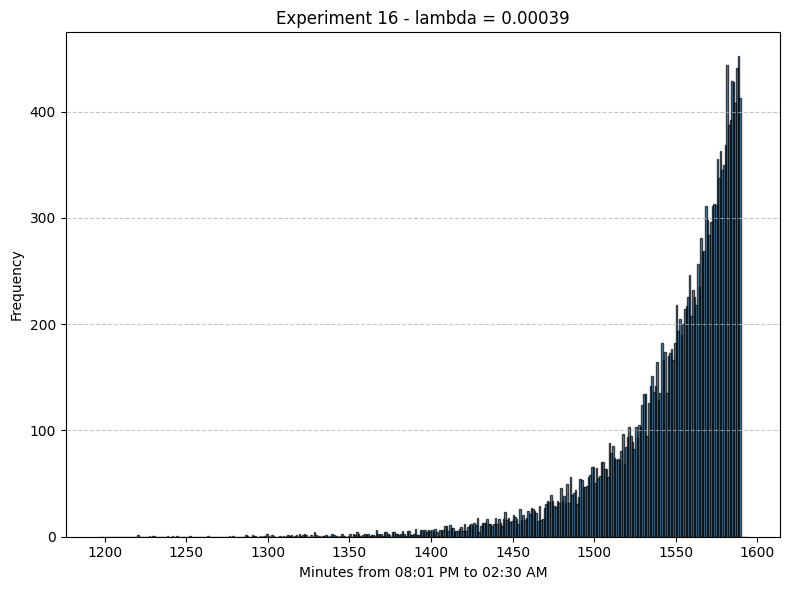

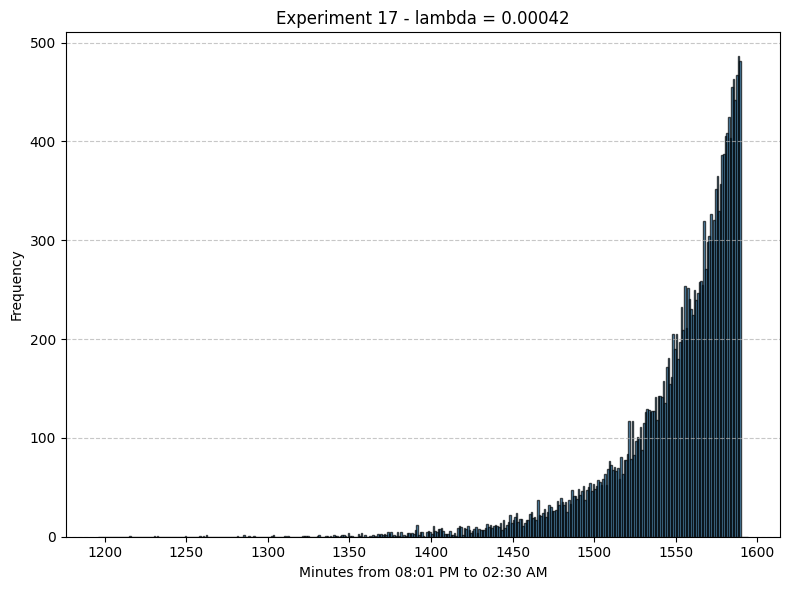

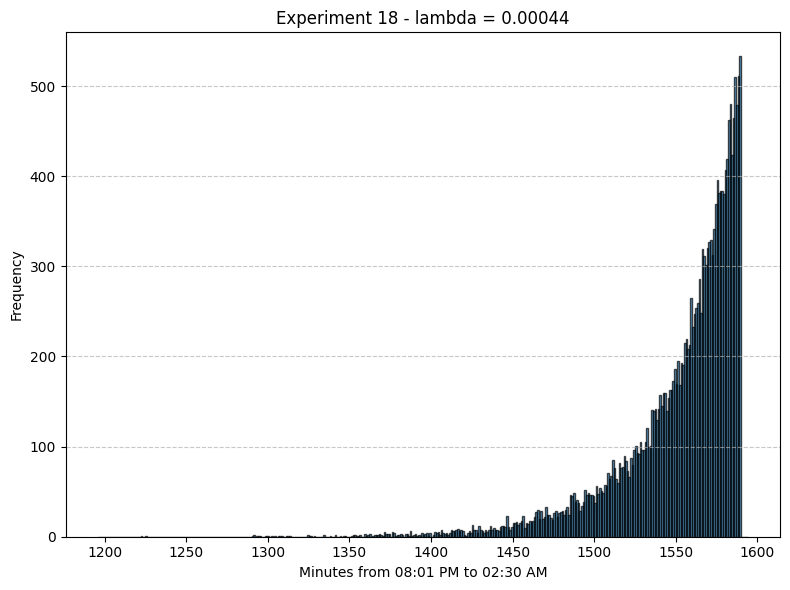

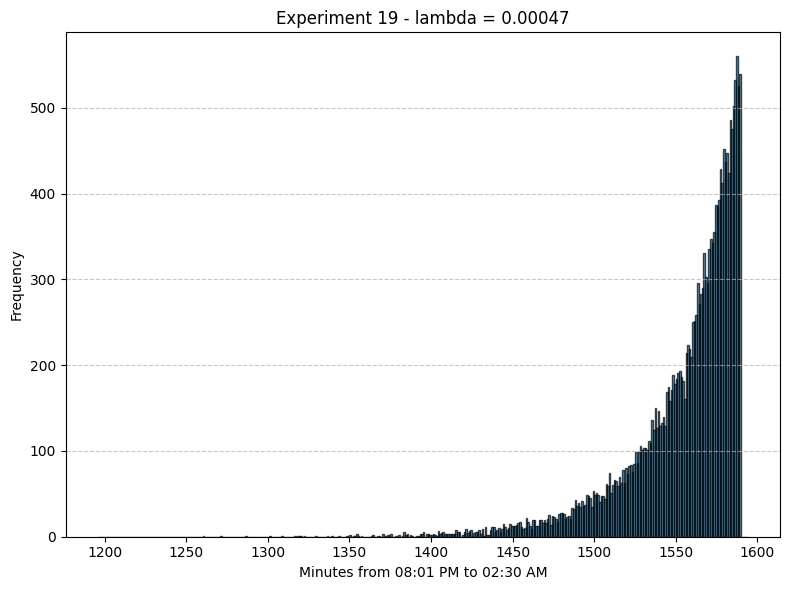

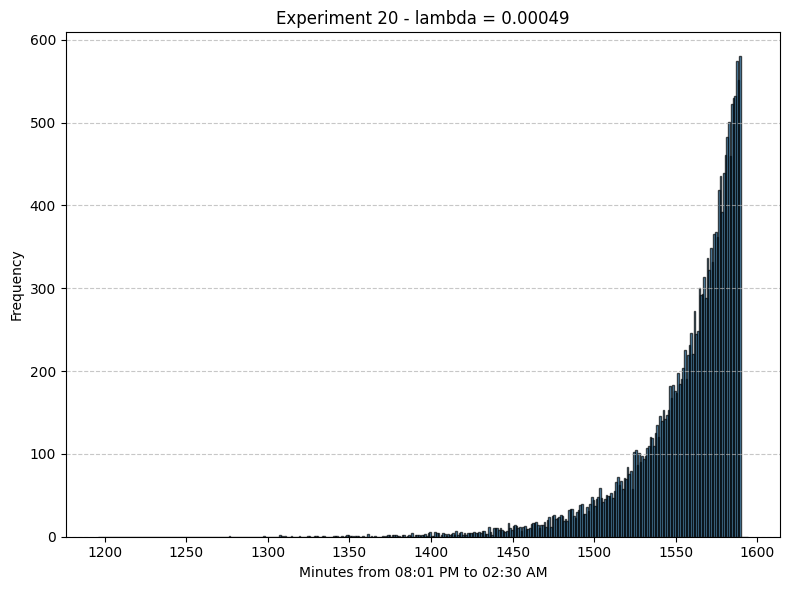

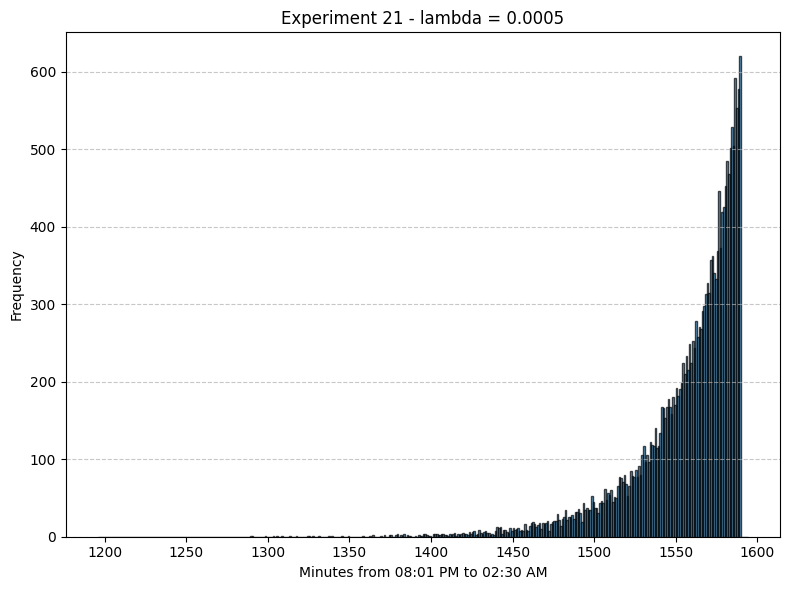

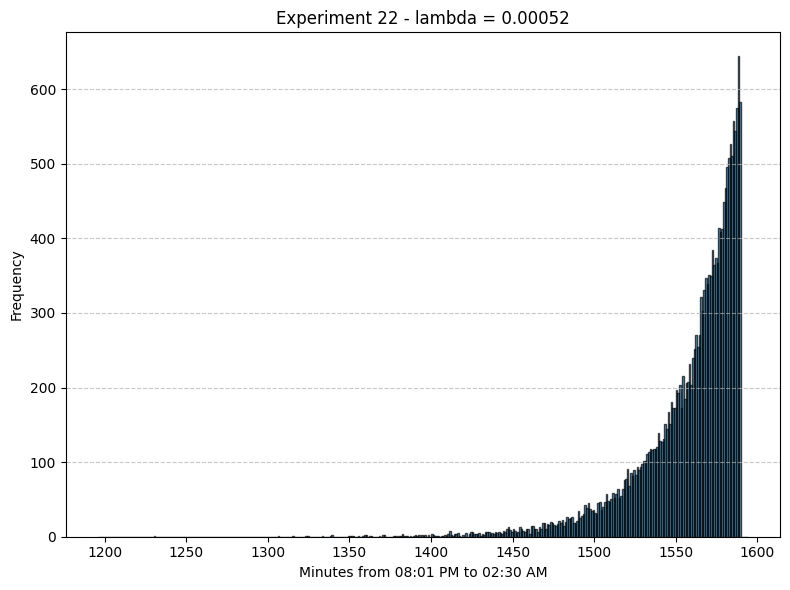

In [ ]:
# Define the start and end times of the interval
from datetime import datetime, timedelta
# Get the current date
current_date = datetime.now().date()
# Define the start time as today's date with the specified time
start_time = datetime.strptime("08:01 PM", "%I:%M %p").replace(year=current_date.year, month=current_date.month, day=current_date.day)
# Define the end time as the next day with the specified time
end_time = datetime.strptime("02:30 AM", "%I:%M %p").replace(year=current_date.year, month=current_date.month, day=current_date.day) + timedelta(days=1)

# Define parameters for experiments
lambda_values = [0.0001, 0.00012, 0.00015, 0.00017, 0.00018, 0.0002, 0.00021, 0.00022, 0.00025,0.00028, 0.0003, 0.00031, 0.00033, 0.00035, 0.00037, 0.00039, 0.00042,
                 0.00044, 0.00047, 0.00049, 0.0005, 0.00052] # Different lambda values for each experiment

num_experiments = len(lambda_values)
num_trials = 20000

# Run experiments
experiment_results = run_experiments_exp(num_experiments, num_trials, start_time, end_time, lambda_values, True)
plot_histograms_exp(experiment_results, start_time, end_time, lambda_values)

# lambda = 0.0002

## RANDOM LOGOUTs

In [ ]:
# Define the start and end times of the interval
start_time = datetime.strptime("08:00 AM", "%I:%M %p")
end_time = datetime.strptime("12:00 PM", "%I:%M %p")

# Define parameters for experiments
lambda_values = [0.0001, 0.00012, 0.00015, 0.00017, 0.00018, 0.0002, 0.00021, 0.00022, 0.00025,0.00028, 0.0003, 0.00031, 0.00033, 0.00035, 0.00037, 0.00039, 0.00042,
                 0.00044, 0.00047, 0.00049, 0.0005, 0.00052] # Different lambda values for each experiment

num_experiments = len(lambda_values)
num_trials = 20000

# Run experiments
experiment_results = run_experiments_exp(num_experiments, num_trials, start_time, end_time, lambda_values)
plot_histograms_exp(experiment_results, start_time, end_time, lambda_values)


# 4 hours ---> 0.00021

In [ ]:
# Define the start and end times of the interval
start_time = datetime.strptime("08:15 AM", "%I:%M %p")
end_time = datetime.strptime("12:00 PM", "%I:%M %p")

# Define parameters for experiments
lambda_values = [0.0001, 0.00012, 0.00015, 0.00017, 0.00018, 0.0002, 0.00021, 0.00022, 0.00025,0.00028, 0.0003, 0.00031, 0.00033, 0.00035, 0.00037, 0.00039, 0.00042,
                 0.00044, 0.00047, 0.00049, 0.0005, 0.00052] # Different lambda values for each experiment

num_experiments = len(lambda_values)
num_trials = 20000

# Run experiments
experiment_results = run_experiments_exp(num_experiments, num_trials, start_time, end_time, lambda_values)
plot_histograms_exp(experiment_results, start_time, end_time, lambda_values)


# 3.75 hours ---> 0.00022

In [ ]:
# Define the start and end times of the interval
start_time = datetime.strptime("08:30 AM", "%I:%M %p")
end_time = datetime.strptime("12:00 PM", "%I:%M %p")

# Define parameters for experiments
lambda_values = [0.0001, 0.00012, 0.00015, 0.00017, 0.00018, 0.0002, 0.00021, 0.00022, 0.00025,0.00028, 0.0003, 0.00031, 0.00033, 0.00035, 0.00037, 0.00039, 0.00042,
                 0.00044, 0.00047, 0.00049, 0.0005, 0.00052] # Different lambda values for each experiment

num_experiments = len(lambda_values)
num_trials = 20000

# Run experiments
experiment_results = run_experiments_exp(num_experiments, num_trials, start_time, end_time, lambda_values)
plot_histograms_exp(experiment_results, start_time, end_time, lambda_values)


# 3.5 hours ---> 0.00023

In [ ]:
# Define the start and end times of the interval
start_time = datetime.strptime("08:45 AM", "%I:%M %p")
end_time = datetime.strptime("12:00 PM", "%I:%M %p")

# Define parameters for experiments
lambda_values = [0.0001, 0.00012, 0.00015, 0.00017, 0.00018, 0.0002, 0.00021, 0.00022, 0.00025,0.00028, 0.0003, 0.00031, 0.00033, 0.00035, 0.00037, 0.00039, 0.00042,
                 0.00044, 0.00047, 0.00049, 0.0005, 0.00052] # Different lambda values for each experiment

num_experiments = len(lambda_values)
num_trials = 20000

# Run experiments
experiment_results = run_experiments_exp(num_experiments, num_trials, start_time, end_time, lambda_values)
plot_histograms_exp(experiment_results, start_time, end_time, lambda_values)


# 3.25 hours ---> 0.00024

In [ ]:
# Define the start and end times of the interval
start_time = datetime.strptime("09:00 AM", "%I:%M %p")
end_time = datetime.strptime("12:00 PM", "%I:%M %p")

# Define parameters for experiments
lambda_values = [0.0001, 0.00012, 0.00015, 0.00017, 0.00018, 0.0002, 0.00021, 0.00022, 0.00025,0.00028, 0.0003, 0.00031, 0.00033, 0.00035, 0.00037, 0.00039, 0.00042,
                 0.00044, 0.00047, 0.00049, 0.0005, 0.00052] # Different lambda values for each experiment

num_experiments = len(lambda_values)
num_trials = 20000

# Run experiments
experiment_results = run_experiments_exp(num_experiments, num_trials, start_time, end_time, lambda_values)
plot_histograms_exp(experiment_results, start_time, end_time, lambda_values)


# 3 hours ---> 0.00025

## Selecting a lambda value for the integer interval [0 - 20]

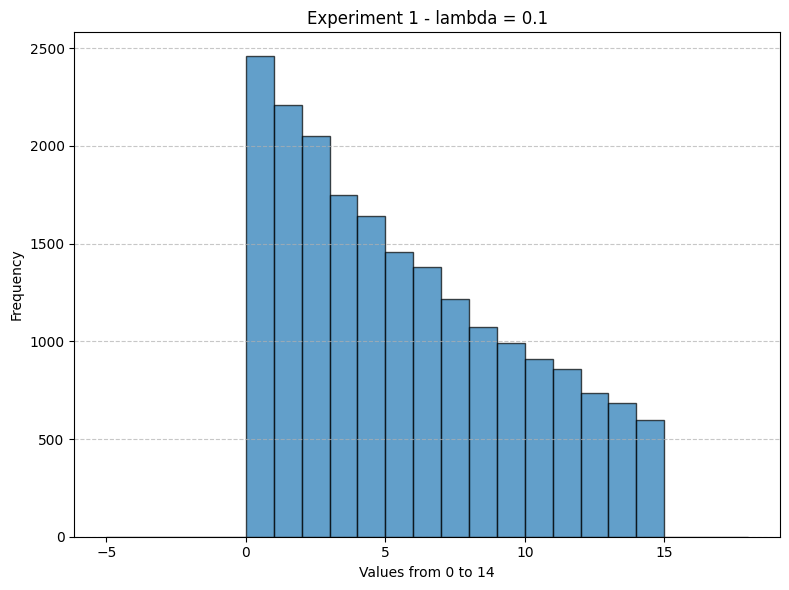

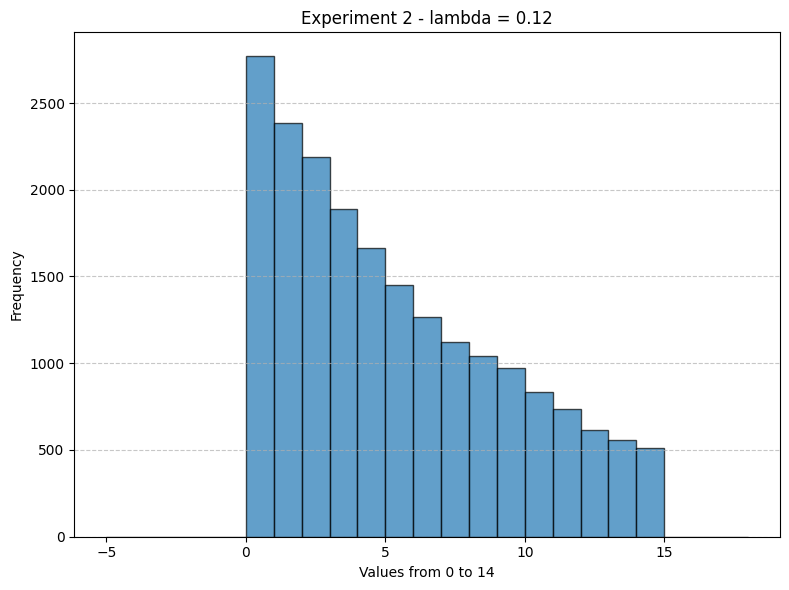

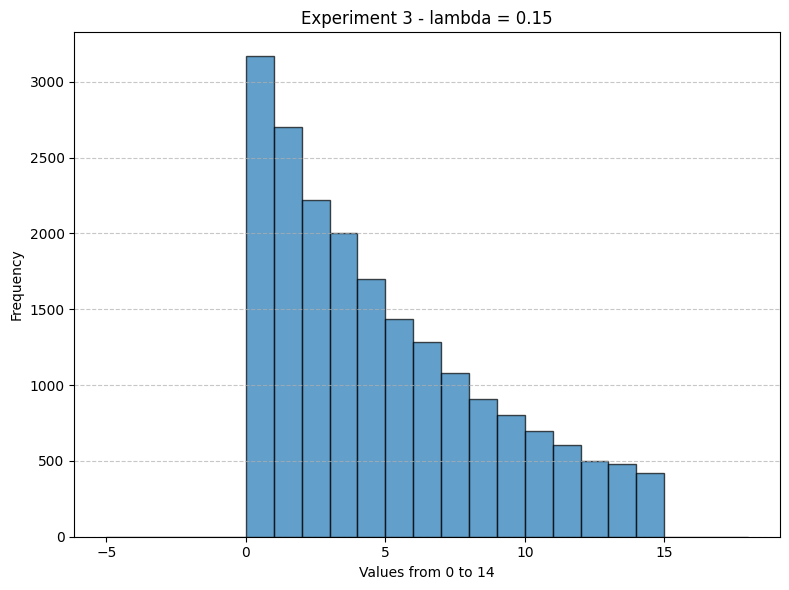

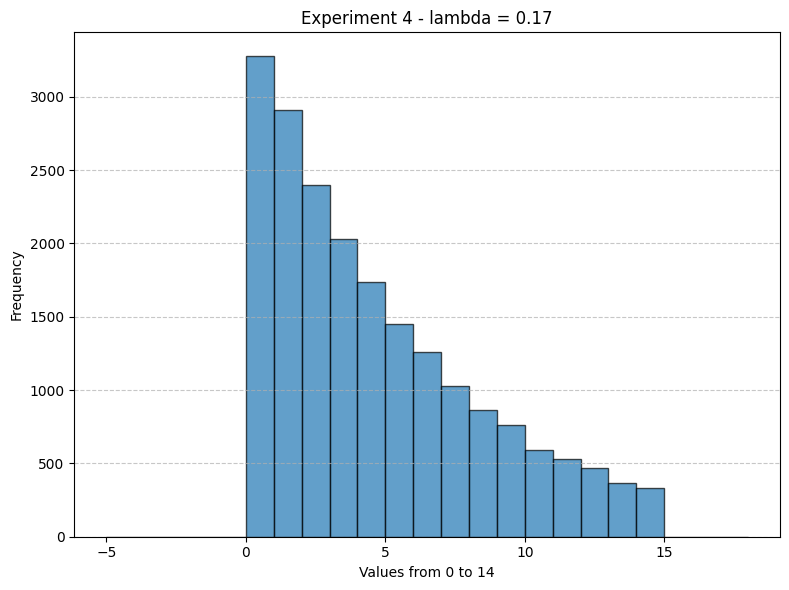

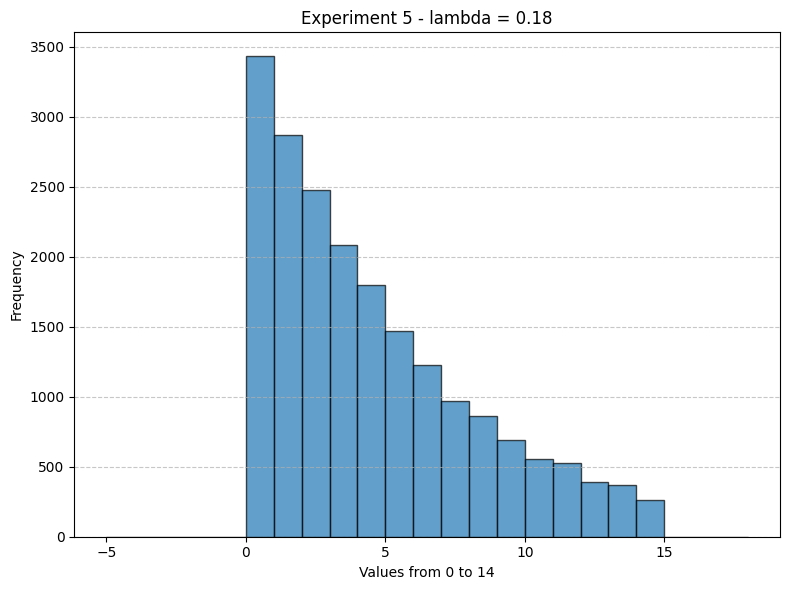

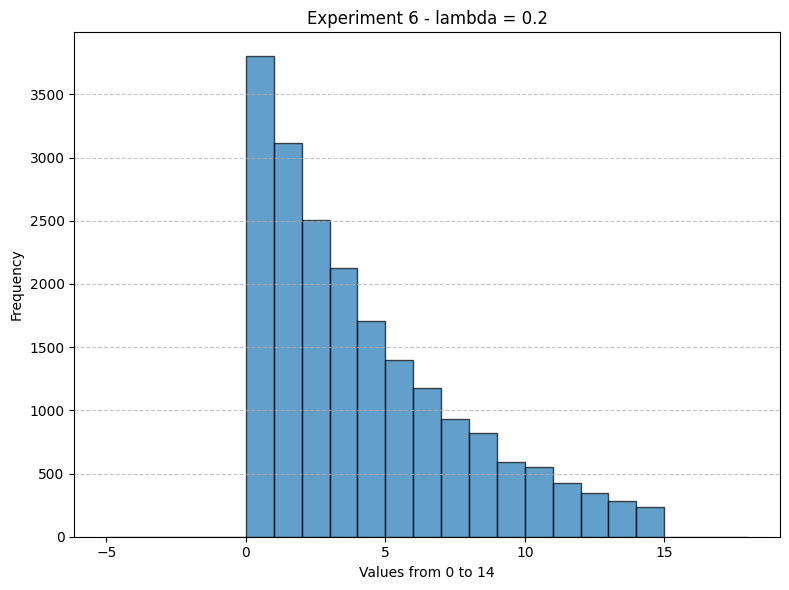

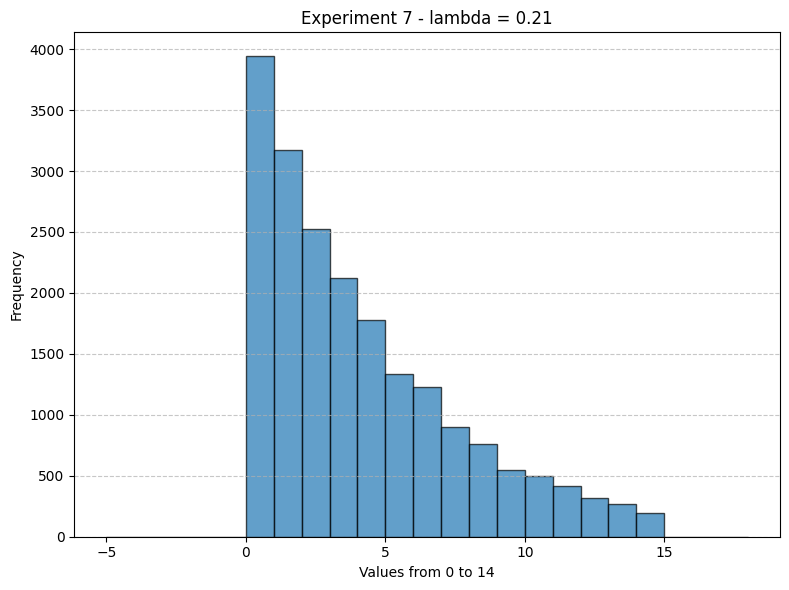

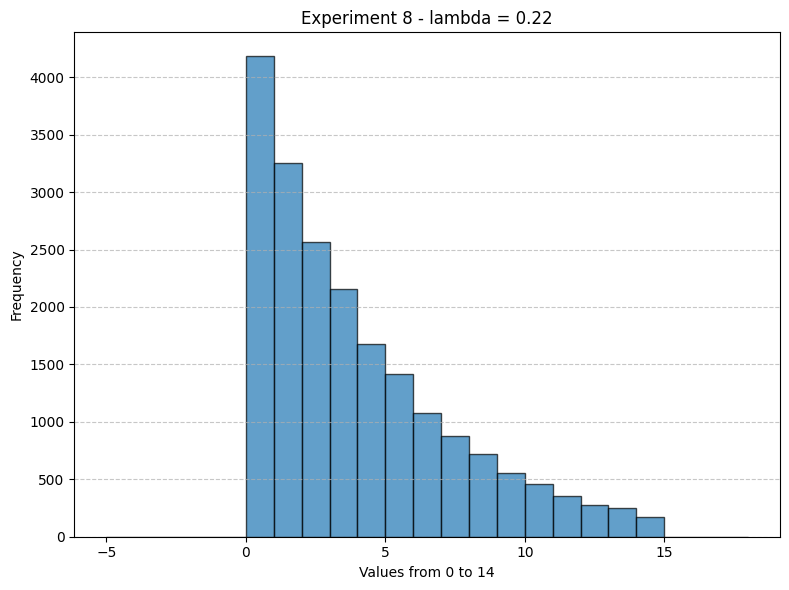

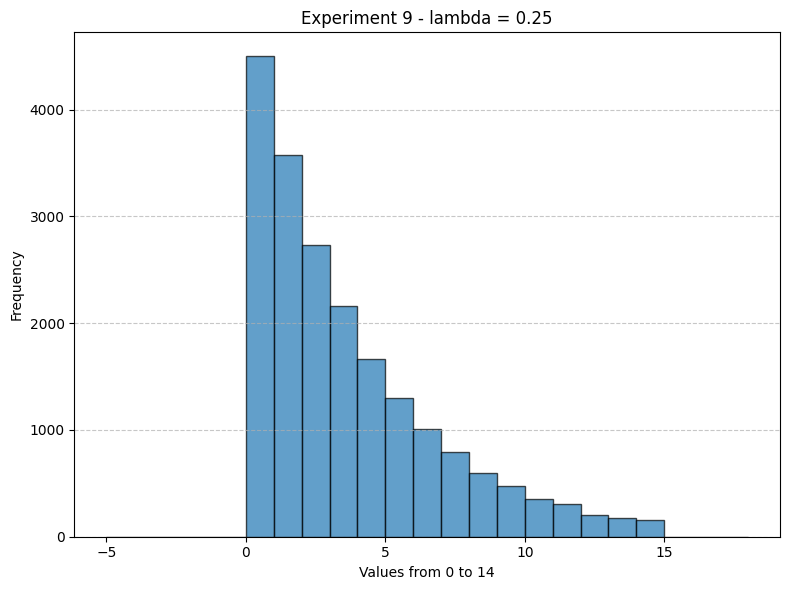

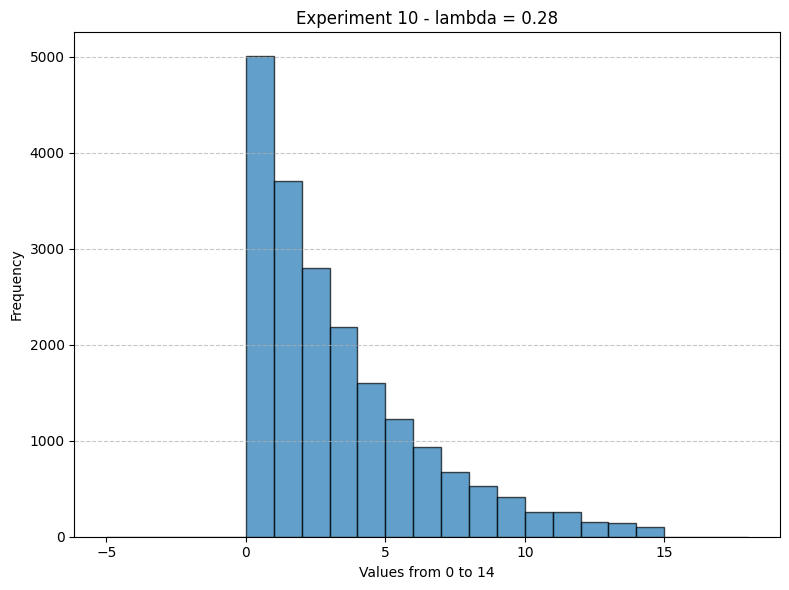

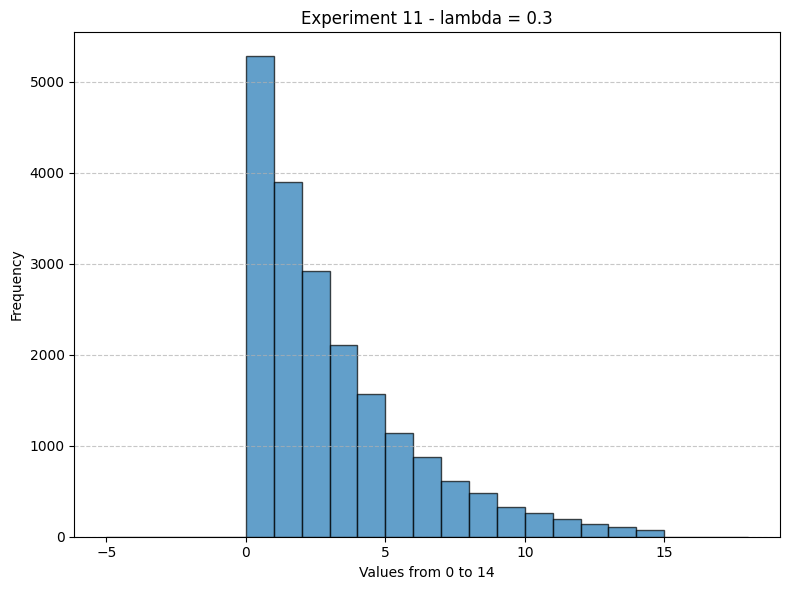

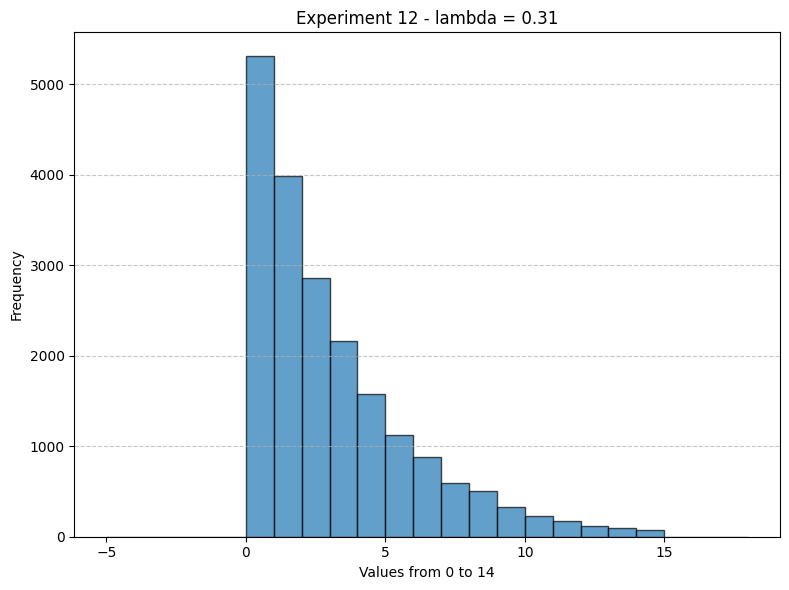

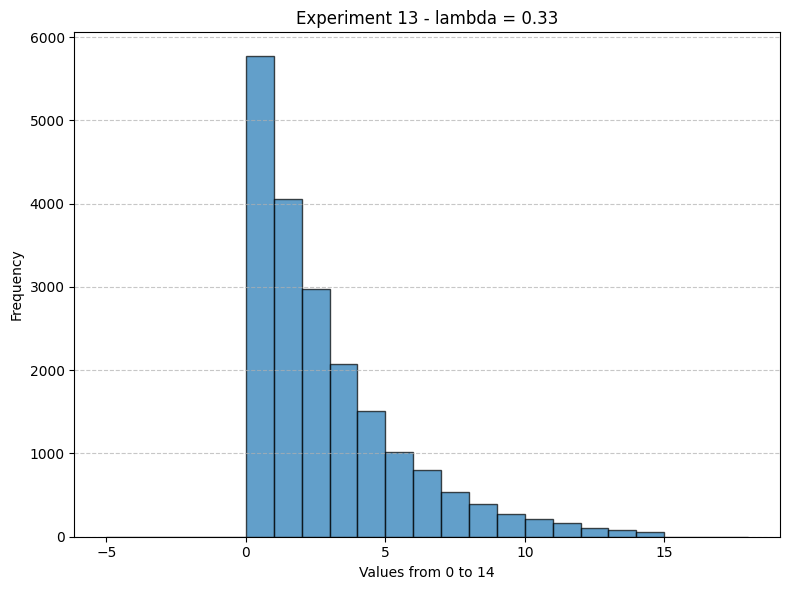

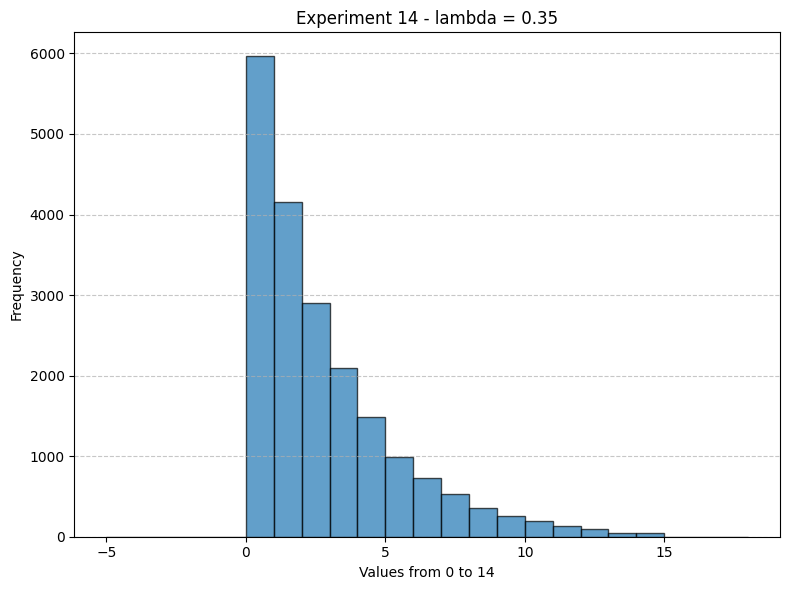

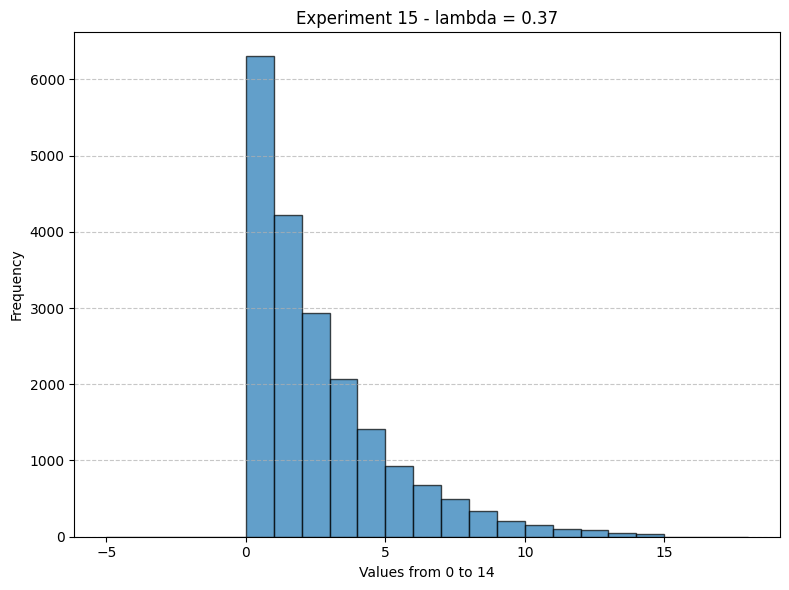

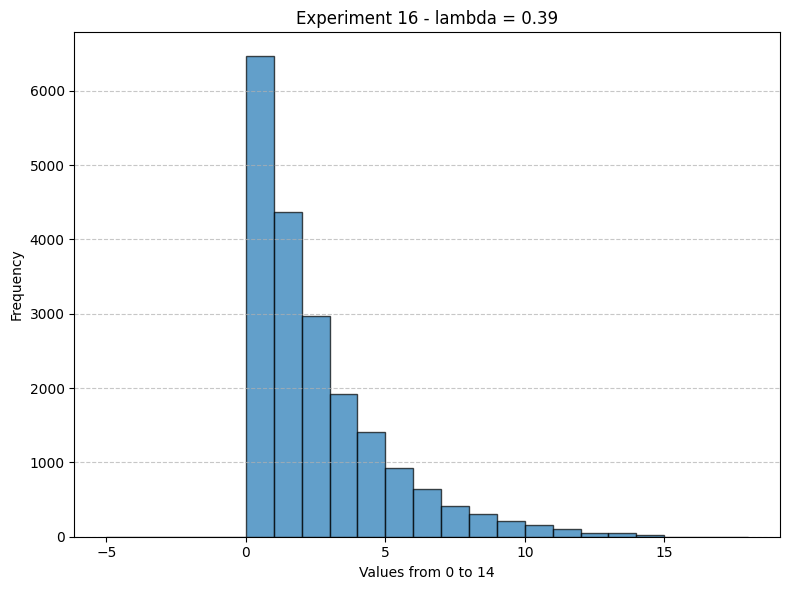

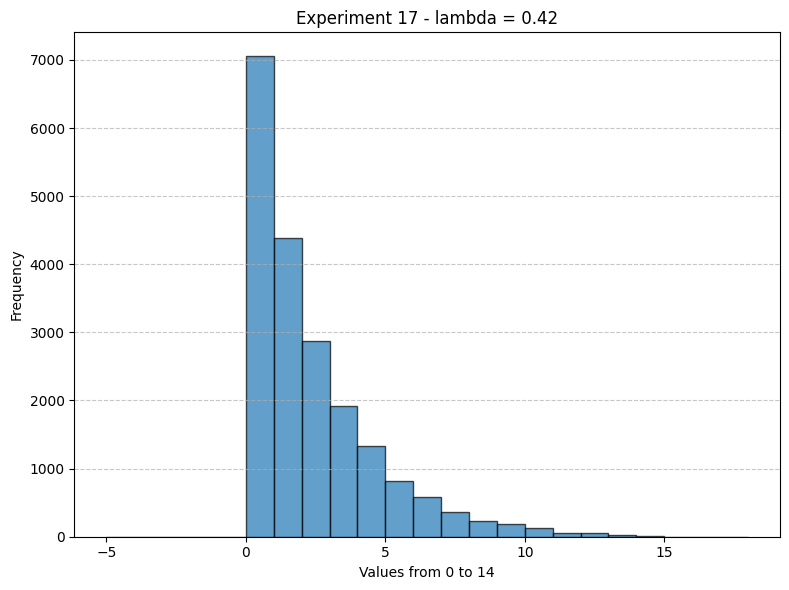

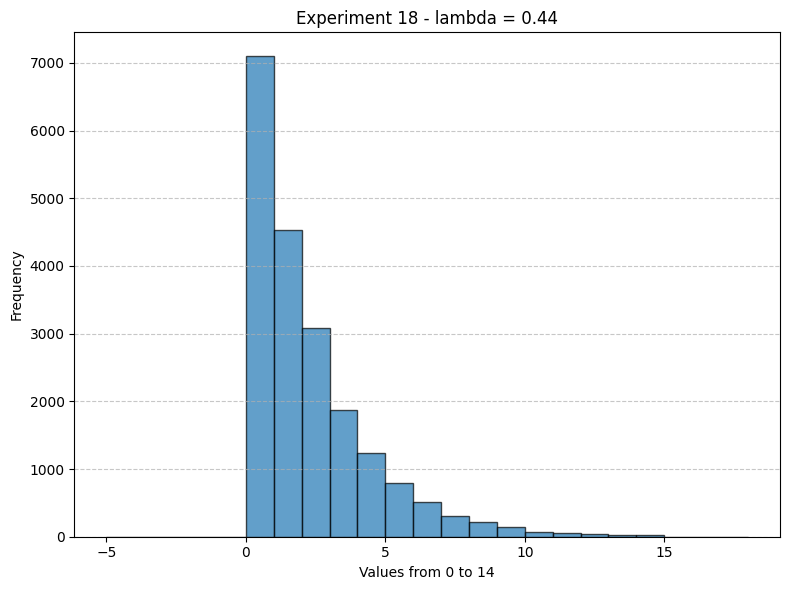

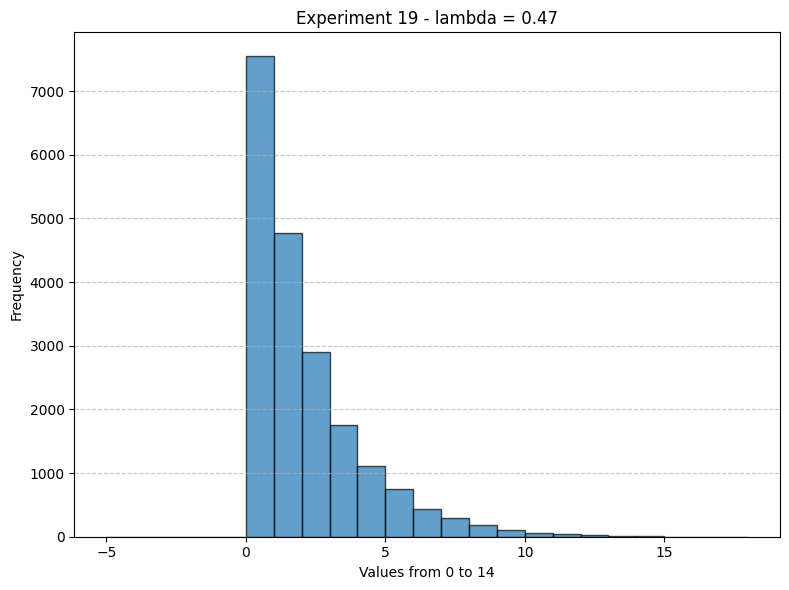

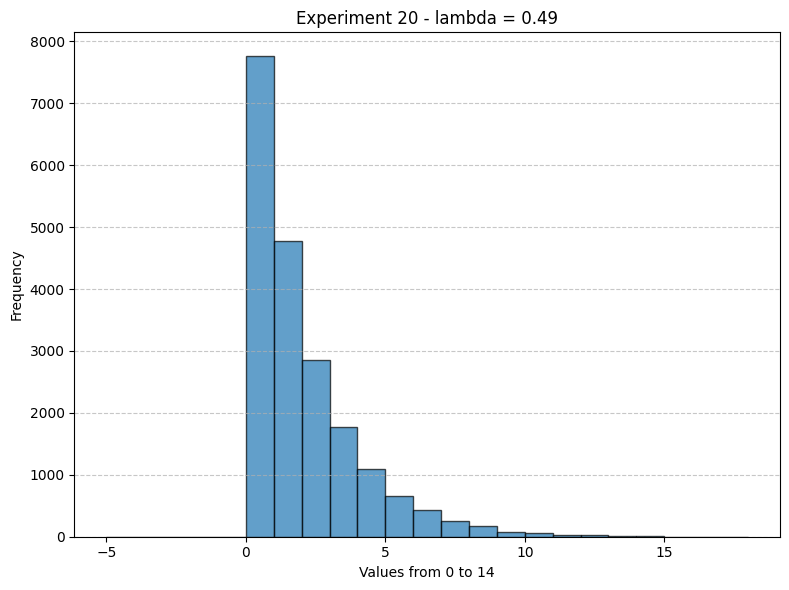

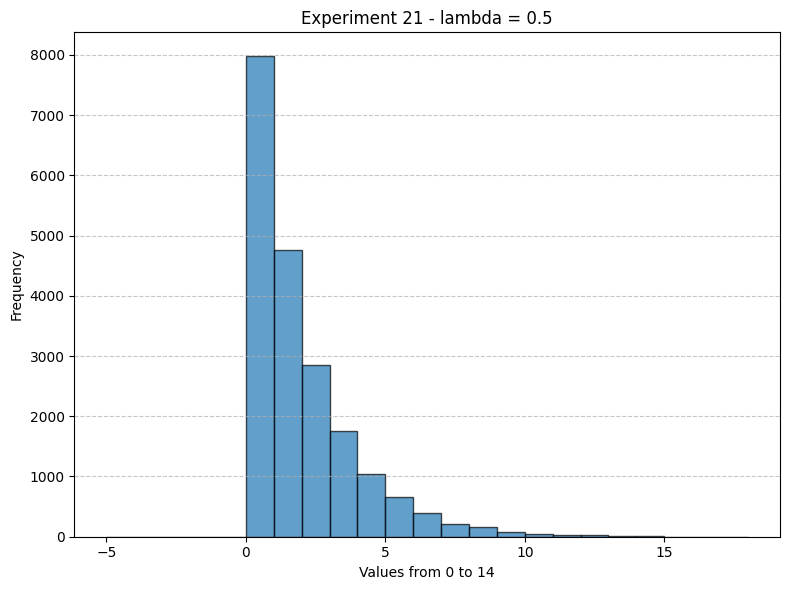

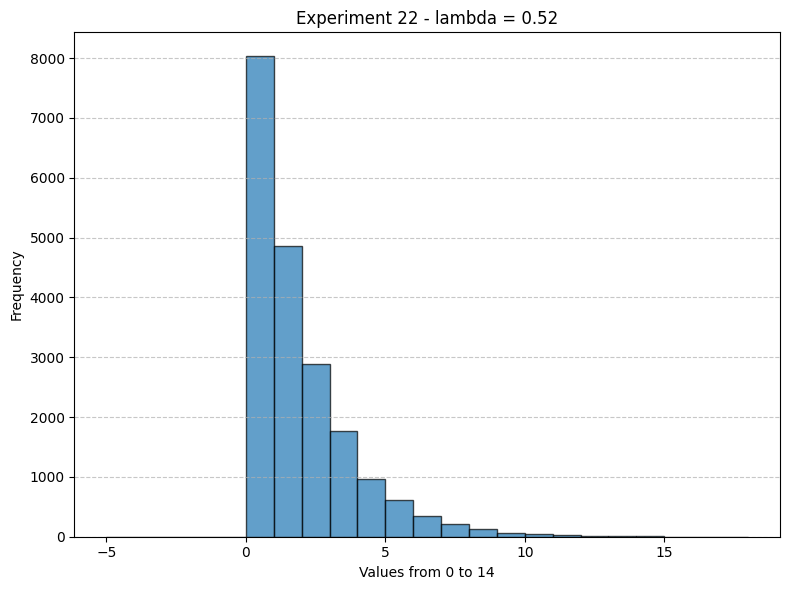

In [ ]:
# Define the start and end values
start_val = 0
end_val = 14

# Define parameters for experiments
lambda_values = [0.1, 0.12, 0.15, 0.17, 0.18, 0.2, 0.21, 0.22, 0.25,0.28, 0.3, 0.31, 0.33, 0.35, 0.37, 0.39, 0.42,
                 0.44, 0.47, 0.49, 0.5, 0.52] # Different lambda values for each experiment

num_experiments = len(lambda_values)
num_trials = 20000

# Run experiments
experiment_results = run_experiments_exp_int(num_experiments, num_trials, start_val, end_val, lambda_values)
plot_histograms_exp_int(experiment_results, start_val, end_val, lambda_values)


# **Normal Distribution**

## *Functions Implementation*

In [ ]:
import random
import math
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


# Approximate normal distribution using Box-Muller transform
def get_normal_random():
    u1 = random.random()
    u2 = random.random()
    z = math.sqrt(-2 * math.log(u1)) * math.sin(2 * math.pi * u2)
    return z


# Function to run experiments X number of times
def generate_time_normal(start_time, end_time, confidence_interval=2.58):
    # Generate a value from the normal distribution
    mean = (start_time.timestamp() + end_time.timestamp()) / 2  # Mean of the distribution
    # Standard deviation of the distribution with default 99% confidence interval. (confidence_interval = 1.96) for 95% confidence interval.
    std_dev = (end_time.timestamp() - start_time.timestamp()) / (2*confidence_interval)
    # Generate a value from the normal distribution, ensuring it falls within the interval
    normal_ticks = mean + std_dev * get_normal_random()  # Generate ticks value from normal distribution

    while normal_ticks < start_time.timestamp() or normal_ticks > end_time.timestamp():
        normal_ticks = mean + std_dev * get_normal_random()  # Generate ticks value from normal distribution

    return datetime.fromtimestamp(normal_ticks)



# Function to run experiments X number of times
def run_experiments_normal(start_time, end_time, num_experiments, confidence_interval=2.58):
    results = []
    for i in range(num_experiments):
        # Generate a value from the normal distribution
        mean = (start_time.timestamp() + end_time.timestamp()) / 2  # Mean of the distribution
        # Standard deviation of the distribution with default 99% confidence interval. (confidence_interval = 1.96) for 95% confidence interval.
        std_dev = (end_time.timestamp() - start_time.timestamp()) / (2*confidence_interval)
        # Generate a value from the normal distribution, ensuring it falls within the interval
        normal_ticks = mean + std_dev * get_normal_random()  # Generate ticks value from normal distribution

        while normal_ticks < start_time.timestamp() or normal_ticks > end_time.timestamp():
            normal_ticks = mean + std_dev * get_normal_random()  # Generate ticks value from normal distribution

        t_start_normal = datetime.fromtimestamp(normal_ticks)  # Convert ticks to datetime
        results.append(t_start_normal)
        # Output the computed time
        #print(f"Experiment {i+1}: Computed normal start time: {t_start_normal}")
    return results

def plot_histogram_normal(start_time, end_time, experiment_results):
    # Create a histogram
    times_in_minutes = [result.hour*60 + result.minute for result in experiment_results]
    plt.hist(times_in_minutes, bins=range(start_time.hour*60 + start_time.minute - 5, end_time.hour*60 + end_time.minute + 5), edgecolor='black', alpha=0.7)
    start_time_str = start_time.strftime("%I:%M %p")
    end_time_str = end_time.strftime("%I:%M %p")
    plt.xlabel(f"Minutes from {start_time_str} to {end_time_str}")
    plt.ylabel('Frequency')
    plt.title('Histogram of Computed Normal Times')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## *t_start_OnTime: Drawing 90000 values from the interval [07:30 AM - 08:30 AM] adhering to a normal distirbution*

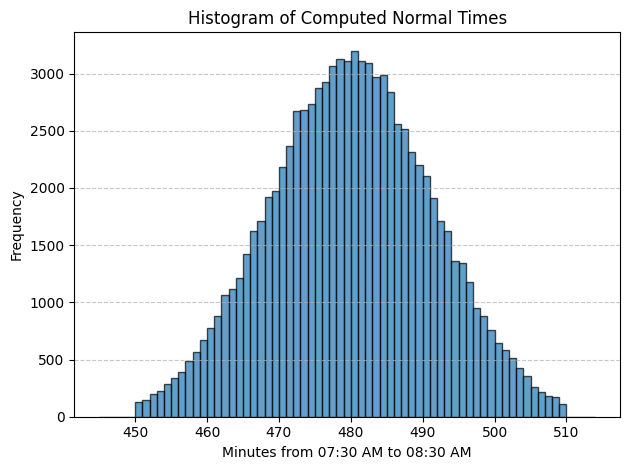

In [ ]:
# Define the start and end times of the interval
start_time = datetime.strptime("7:30 AM", "%I:%M %p")
end_time = datetime.strptime("8:30 AM", "%I:%M %p")

# Execute experiments n times
number_of_experiments = 90000
experiment_results = run_experiments_normal(start_time, end_time, number_of_experiments)
plot_histogram_normal(start_time, end_time, experiment_results)


### *Plotting the results of a Powershell script that conducted 20000 trials*

#### *The histogram*

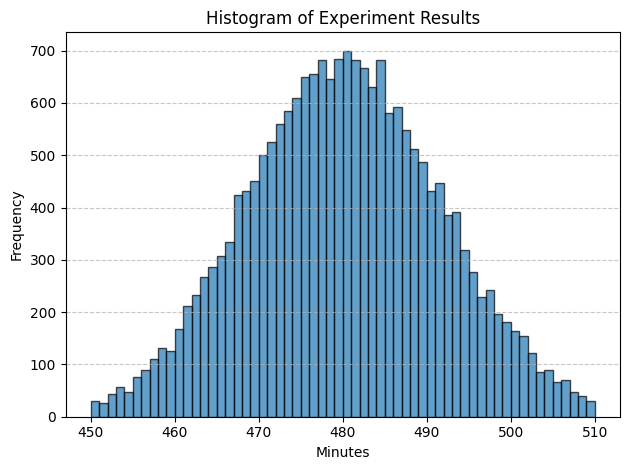

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt

# Read the experiment results from the text file
experiment_results = []
with open('experiment_results.txt', 'r', encoding='utf-16') as file:
    for line in file:
        parts = line.split(': ')
        if len(parts) == 2:
            timestamp_str = parts[1].strip()
            timestamp = datetime.strptime(timestamp_str, '%m/%d/%Y %H:%M:%S')
            experiment_results.append(timestamp)

# Convert timestamps to minutes
experiment_minutes = [(result.hour * 60) + result.minute for result in experiment_results]

# Create a histogram
plt.hist(experiment_minutes, bins=range(450, 511), edgecolor='black', alpha=0.7)
plt.xlabel('Minutes from 07:30 AM to 08:30 AM')
plt.ylabel('Frequency')
plt.title('Histogram of Experiment Results')
plt.xticks(range(450, 511, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### *The powershell script*

In [ ]:
# # Define the start and end times of the interval
# $startTime = Get-Date -Hour 7 -Minute 30 -Second 0
# $endTime = Get-Date -Hour 8 -Minute 30 -Second 0
# # Approximate normal distribution using Box-Muller transform
# function Get-NormalRandom {
#     [double]$u1 = Get-Random -Minimum 0.0 -Maximum 1.0
#     [double]$u2 = Get-Random -Minimum 0.0 -Maximum 1.0
#     [double]$z = [math]::Sqrt(-2.0 * [math]::Log($u1)) * [math]::Sin(2.0 * [math]::PI * $u2)  # Apply Box-Muller transform
#     return $z
# }
# # Function to run experiments X number of times
# function Run-Experiments {
#     param (
#         [int]$numExperiments
#     )
#     $results = @()  # Array to store results
#     # Loop through the experiments
#     for ($i = 1; $i -le $numExperiments; $i++) {
#         # Generate a value from the normal distribution
#         $mean = ($startTime.Ticks + $endTime.Ticks) / 2  # Mean of the distribution
#         $stdDev = ($endTime.Ticks - $startTime.Ticks) / (2 * 2.58)  # Standard deviation of the distribution with 99% confidence interval
#         # Generate a value from the normal distribution, ensuring it falls within the interval
#         $normalTicks = $mean + $stdDev * (Get-NormalRandom)  # Generate ticks value from normal distribution
#         while($normalTicks -lt $startTime.Ticks -or $normalTicks -gt $endTime.Ticks){
#             $normalTicks = $mean + $stdDev * (Get-NormalRandom)  # Generate ticks value from normal distribution
#         }
#         $t_start_normal = [datetime]::new($normalTicks)  # Convert ticks to datetime
#         # Output the computed time
#         #Write-Host "Experiment $i: Computed normal start time: $t_start_normal"
#         # Add result to array
#         $results += "Experiment ${i}: $t_start_normal"
#     }
#     # Write results to file
#     $results | Out-File -FilePath "C:\Users\Administrator\Desktop\experiment_results.txt"
# }
# # Execute experiments X times
# $numberOfExperiments = 20000  # Set X here
# Run-Experiments -numExperiments $numberOfExperiment

## *t_end_OnTime: Drawing 90000 values from the interval [04:30 PM - 05:30 PM] adhering to a normal distirbution*

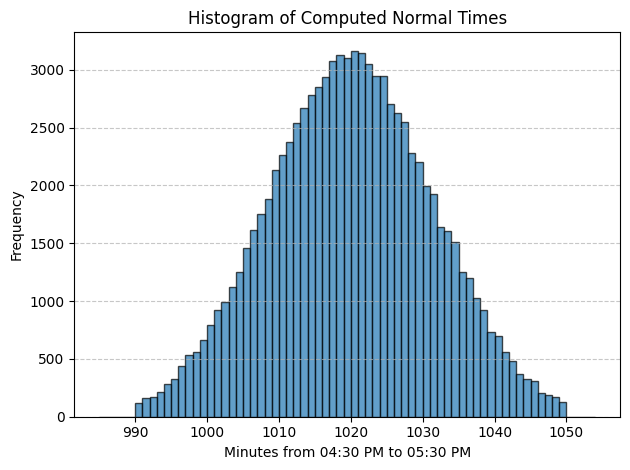

In [ ]:
# Define the start and end times of the interval
start_time = datetime.strptime("04:30 PM", "%I:%M %p")
end_time = datetime.strptime("05:30 PM", "%I:%M %p")

# Execute experiments n times
number_of_experiments = 90000
experiment_results = run_experiments_normal(start_time, end_time, number_of_experiments)
plot_histogram_normal(start_time, end_time, experiment_results)


## lunch break

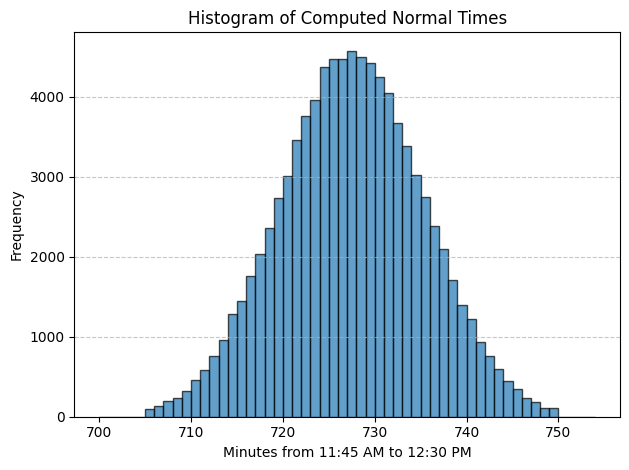

In [ ]:
# Define the start and end times of the interval
start_time = datetime.strptime("11:45 AM", "%I:%M %p")
end_time = datetime.strptime("12:30 PM", "%I:%M %p")

# Execute experiments n times
number_of_experiments = 90000
confidence_interval = 2.85
experiment_results = run_experiments_normal(start_time, end_time, number_of_experiments, confidence_interval)
plot_histogram_normal(start_time, end_time, experiment_results)


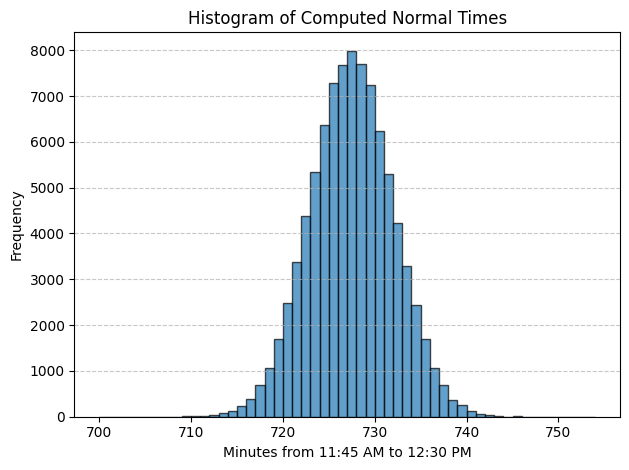

In [ ]:
# Define the start and end times of the interval
start_time = datetime.strptime("11:45 AM", "%I:%M %p")
end_time = datetime.strptime("12:30 PM", "%I:%M %p")

# Execute experiments n times
number_of_experiments = 90000
confidence_interval = 5
experiment_results = run_experiments_normal(start_time, end_time, number_of_experiments, confidence_interval)
plot_histogram_normal(start_time, end_time, experiment_results)


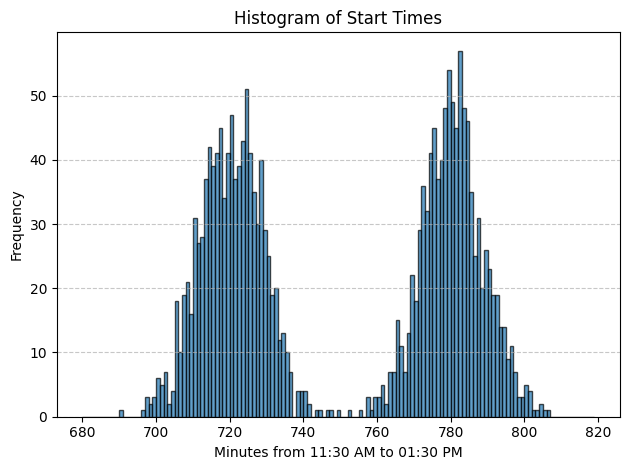

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime

# Read the experiment results from the text file
results_file_path = "/content/lunch_times_results.txt"  # the file contains 20000 trials
with open(results_file_path, 'r') as file:
    results = [line.strip() for line in file]

# Convert the results to datetime objects
#results = [datetime.strptime(result, "%m/%d/%Y %H:%M:%S") for result in results]

results = [datetime.strptime(result, "%A, %B %d, %Y %I:%M:%S %p") for result in results]

# Extract the hours from the results
packets = [result.hour*60 + result.minute for result in results]

# Create a histogram
plt.hist(packets, bins=range(690-10, 810+10), edgecolor='black', alpha=0.7)
plt.xlabel('Minutes from 11:30 AM to 01:30 PM')
plt.ylabel('Frequency')
plt.title('Histogram of Start Times')
#plt.xticks(range(210, 449))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the histogram
plt.show()


# **[Testing the START_TIME powershell implementation by running 20000 trials]**



## The histogram

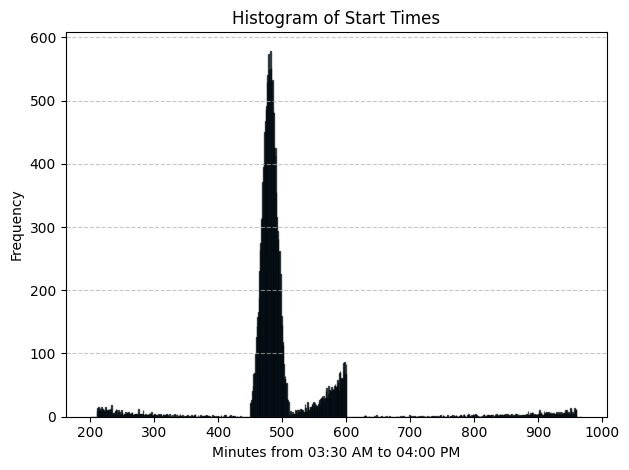

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime

# Read the experiment results from the text file
results_file_path = "/content/trial_results.txt"  # the file contains 20000 trials
with open(results_file_path, 'r') as file:
    results = [line.strip() for line in file]

# Convert the results to datetime objects
#results = [datetime.strptime(result, "%m/%d/%Y %H:%M:%S") for result in results]

results = [datetime.strptime(result, "%A, %B %d, %Y %I:%M:%S %p") for result in results]

# Extract the hours from the results
packets = [result.hour*60 + result.minute for result in results]

# Create a histogram
plt.hist(packets, bins=range(210-10, 960+10), edgecolor='black', alpha=0.7)
plt.xlabel('Minutes from 03:30 AM to 04:00 PM')
plt.ylabel('Frequency')
plt.title('Histogram of Start Times')
#plt.xticks(range(210, 449))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the histogram
plt.show()


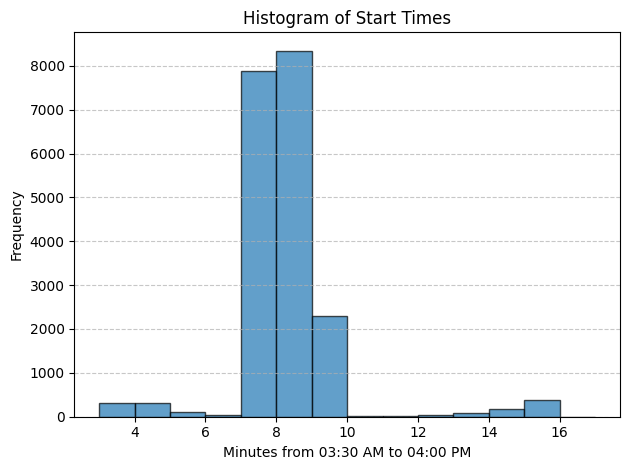

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime

# Read the experiment results from the text file
results_file_path = "/content/trial_results.txt"  # the file contains 20000 trials
with open(results_file_path, 'r') as file:
    results = [line.strip() for line in file]

# Convert the results to datetime objects
#results = [datetime.strptime(result, "%m/%d/%Y %H:%M:%S") for result in results]

results = [datetime.strptime(result, "%A, %B %d, %Y %I:%M:%S %p") for result in results]

# Extract the hours from the results
packets = [result.hour for result in results]

# Create a histogram
plt.hist(packets, bins=range(3, 18), edgecolor='black', alpha=0.7)
plt.xlabel('Minutes from 03:30 AM to 04:00 PM')
plt.ylabel('Frequency')
plt.title('Histogram of Start Times')
#plt.xticks(range(210, 449))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the histogram
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime

# Read the experiment results from the text file
results_file_path = "/content/trial_results.txt"  # the file contains 20000 trials
with open(results_file_path, 'r') as file:
    results = [line.strip() for line in file]

# Convert the results to datetime objects
#results = [datetime.strptime(result, "%m/%d/%Y %H:%M:%S") for result in results]

results = [datetime.strptime(result, "%A, %B %d, %Y %I:%M:%S %p") for result in results]

# Extract the hours from the results
packets = [(result.hour*60 + result.minute)/2 for result in results]

# Create a histogram
plt.hist(packets, bins=range(105-10, 480+10), edgecolor='black', alpha=0.7)
plt.xlabel('Minutes from 03:30 AM to 04:00 PM')
plt.ylabel('Frequency')
plt.title('Histogram of Start Times')
#plt.xticks(range(210, 449))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the histogram
plt.show()


## The Powershell script

In [ ]:
# # Implementation of the two functions GenerateTime-Exponential and GenerateTime-Normal,
# # these functions will draw random time from the given interval adhering to the given distribution.
# function GenerateTime-Exponential {
#     param (
#         [datetime]$start_time,
#         [datetime]$end_time,
#         [double]$lambda_val,
#         [bool]$flipped = $false
#     )

#     while ($true) {
#         # Generate a random time using exponential distribution
#         $u = Get-Random -Minimum 0.0 -Maximum 0.9999
#         $t = -[math]::Log(1 - $u) / $lambda_val  # Compute the random value using the inverse CDF of exponential distribution

#         # Decide whether it is exponential distribution or flipped exponential distribution
#         if ($flipped) {
#             $t_exp = $end_time - [TimeSpan]::FromSeconds($t)  # Subtract the computed value from the end time
#         } else {
#             $t_exp = $start_time + [TimeSpan]::FromSeconds($t)  # Add the computed value to the start time
#         }

#         # Ensure the generated time is within the interval [start_time - end_time]
#         if ($start_time -le $t_exp -and $t_exp -le $end_time) {
#             return $t_exp
#         }
#     }
# }

# # Approximate normal distribution using Box-Muller transform
# function Get-NormalRandom {
#     $u1 = Get-Random -Minimum 0.0 -Maximum 1.0
#     $u2 = Get-Random -Minimum 0.0 -Maximum 1.0
#     $z = [math]::Sqrt(-2 * [math]::Log($u1)) * [math]::Sin(2 * [math]::PI * $u2)
#     return $z
# }

# # Function to run experiments N number of times
# function GenerateTime-Normal {
#     param (
#         [datetime]$start_time,
#         [datetime]$end_time,
#         [double]$confidence_interval = 2.58
#     )

#     # Generate a value from the normal distribution
#     $mean = ($start_time.Ticks + $end_time.Ticks) / 2  # Mean of the distribution
#     # Standard deviation of the distribution with default 99% confidence interval. (confidence_interval = 1.96) for 95% confidence interval.
#     $std_dev = ($end_time.Ticks - $start_time.Ticks) / (2 * $confidence_interval)
#     # Generate a value from the normal distribution, ensuring it falls within the interval
#     $normal_ticks = $mean + $std_dev * (Get-NormalRandom)  # Generate ticks value from normal distribution

#     while ($normal_ticks -lt $start_time.Ticks -or $normal_ticks -gt $end_time.Ticks) {
#         $normal_ticks = $mean + $std_dev * (Get-NormalRandom)  # Generate ticks value from normal distribution
#     }

#     return [datetime]::new($normal_ticks)  # Convert ticks to datetime
# }


# # Define the variables Intervals
# # t_start_abnormal_early (exponential distribution)
# $start_time1 = Get-Date -Hour 3 -Minute 30 -Second 0
# $end_time1 = Get-Date -Hour 7 -Minute 29 -Second 59
# $lambda1 = 0.00028
# $flipped1 = $false

# # t_start_abnormal_late
# $start_time2 = Get-Date -Hour 10 -Minute 01 -Second 0
# $end_time2 = Get-Date -Hour 16 -Minute 0 -Second 0
# $lambda2 = 0.0002
# $flipped2 = $true

# # t_start_ontime (normal distribution)
# $start_time3 = Get-Date -Hour 7 -Minute 30 -Second 0
# $end_time3 = Get-Date -Hour 8 -Minute 30 -Second 0

# # t_start_late (flipped exponential distribution)
# $start_time4 = Get-Date -Hour 8 -Minute 31 -Second 0
# $end_time4 = Get-Date -Hour 10 -Minute 0 -Second 0
# $lambda4 = 0.0005
# $flipped4 = $true


# # Define the number of trials
# $N = 20000

# # Define arrays to store the results of each trial
# $results = @()

# # Perform N trials
# for ($i = 1; $i -le $N; $i++) {

#     # Generate the random times
#     $t_start_abnormal_early = GenerateTime-Exponential -start_time $start_time1 -end_time $end_time1 -lambda_val $lambda1
#     $t_start_abnormal_late = GenerateTime-Exponential -start_time $start_time2 -end_time $end_time2 -lambda_val $lambda2 -flipped $flipped2
#     $t_start_ontime = GenerateTime-Normal -start_time $start_time3 -end_time $end_time3
#     $t_start_late = GenerateTime-Exponential -start_time $start_time4 -end_time $end_time4 -lambda_val $lambda4 -flipped $flipped4

#     # Define the probability of each event for this trial
#     $prob_t_start_abnormal_early = Get-Random -Minimum 0.025 -Maximum 0.05
#     $prob_t_start_abnormal_late = Get-Random -Minimum 0.025 -Maximum 0.05
#     $prob_t_start_late = Get-Random -Minimum 0.05 -Maximum 0.20
#     $prob_t_start_ontime = 1 - $prob_t_start_abnormal_early - $prob_t_start_abnormal_late - $prob_t_start_late

#     # Define the sides of the dice and their probabilities as tuples for this trial
#     $dice = @(
#         ($t_start_abnormal_early, $prob_t_start_abnormal_early),
#         ($t_start_ontime, $prob_t_start_ontime),
#         ($t_start_late, $prob_t_start_late),
#         ($t_start_abnormal_late, $prob_t_start_abnormal_late)
#     )

#     # Generate a random number between 0 and 1 for this trial
#     $random_number = Get-Random -Minimum 0.0 -Maximum 1.0

#     # Determine the side of the dice based on the generated random number and probabilities for this trial
#     $cumulative_probability = 0
#     foreach ($side in $dice) {
#         $cumulative_probability += $side[1]  # Accessing the probability from the tuple
#         if ($random_number -le $cumulative_probability) {
#             $selected_side = $side[0]  # Accessing the side from the tuple
#             break
#         }
#     }

#     # Add the selected side to the results array for this trial
#     $results += $selected_side
# }

# # Write the results to a file
# $results | Out-File -FilePath "C:\Users\Administrator\Desktop\trial_results.txt"


# **[Testing the END_TIME powershell implementation by running 20000 trials]**

## The histogram

In [ ]:
# Define the start and end times of the interval
from datetime import datetime, timedelta
# Get the current date
current_date = datetime.now().date()
# Define the start time as today's date with the specified time
start_time = datetime.strptime("08:01 PM", "%I:%M %p").replace(year=current_date.year, month=current_date.month, day=current_date.day)
# Define the end time as the next day with the specified time
end_time = datetime.strptime("02:30 AM", "%I:%M %p").replace(year=current_date.year, month=current_date.month, day=current_date.day) + timedelta(days=1)


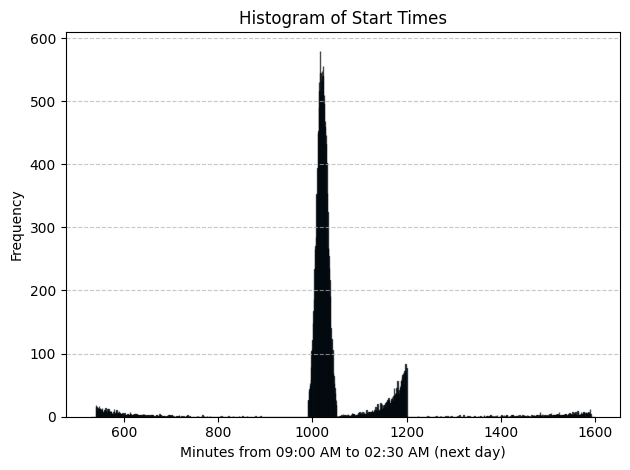

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Read the experiment results from the text file
results_file_path = "/content/end_time_trial_results.txt"  # the file contains 20000 trials
with open(results_file_path, 'r', encoding='utf-8') as file:
    results = [line.strip() for line in file]

# Convert the results to datetime objects
#results = [datetime.strptime(result, "%m/%d/%Y %H:%M:%S") for result in results]

results = [datetime.strptime(result, "%A, %B %d, %Y %I:%M:%S %p") for result in results]

current_date = datetime.now().date()

# Extract the hours from the results
packets = [(result.hour + 24) * 60 + result.minute if result.day != current_date.day else result.hour * 60 + result.minute for result in results]

# Create a histogram
plt.hist(packets, bins=range(540-10, 1590+10), edgecolor='black', alpha=0.7)
plt.xlabel('Minutes from 09:00 AM to 02:30 AM (next day)')
plt.ylabel('Frequency')
plt.title('Histogram of Start Times')
#plt.xticks(range(210, 449))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the histogram
plt.show()


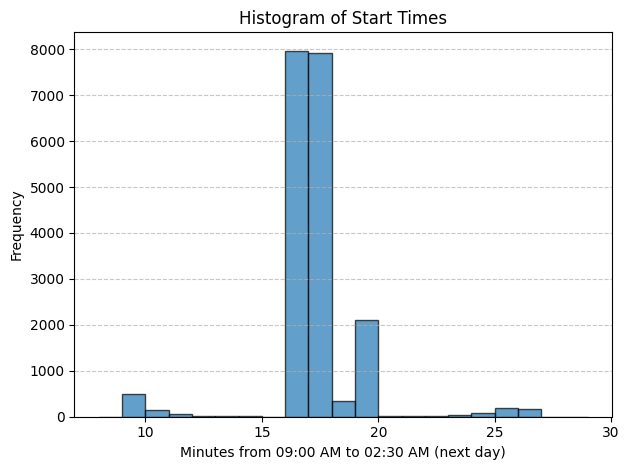

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Read the experiment results from the text file
results_file_path = "/content/end_time_trial_results.txt"  # the file contains 20000 trials
with open(results_file_path, 'r', encoding='utf-8') as file:
    results = [line.strip() for line in file]

# Convert the results to datetime objects
#results = [datetime.strptime(result, "%m/%d/%Y %H:%M:%S") for result in results]

results = [datetime.strptime(result, "%A, %B %d, %Y %I:%M:%S %p") for result in results]

current_date = datetime.now().date()

# Extract the hours from the results
packets = [(result.hour + 24) if result.day != current_date.day else result.hour for result in results]

# Create a histogram
plt.hist(packets, bins=range(8, 30), edgecolor='black', alpha=0.7)
plt.xlabel('Minutes from 09:00 AM to 02:30 AM (next day)')
plt.ylabel('Frequency')
plt.title('Histogram of Start Times')
#plt.xticks(range(210, 449))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the histogram
plt.show()


## The Powershell code

In [ ]:
# # Implementation of the two functions GenerateTime-Exponential and GenerateTime-Normal,
# # these functions will draw random time from the given interval adhering to the given distribution.
# function GenerateTime-Exponential {
#     param (
#         [datetime]$start_time,
#         [datetime]$end_time,
#         [double]$lambda_val,
#         [bool]$flipped = $false
#     )

#     while ($true) {
#         # Generate a random time using exponential distribution
#         $u = Get-Random -Minimum 0.0 -Maximum 0.9999
#         $t = -[math]::Log(1 - $u) / $lambda_val  # Compute the random value using the inverse CDF of exponential distribution

#         # Decide whether it is exponential distribution or flipped exponential distribution
#         if ($flipped) {
#             $t_exp = $end_time - [TimeSpan]::FromSeconds($t)  # Subtract the computed value from the end time
#         } else {
#             $t_exp = $start_time + [TimeSpan]::FromSeconds($t)  # Add the computed value to the start time
#         }

#         # Ensure the generated time is within the interval [start_time - end_time]
#         if ($start_time -le $t_exp -and $t_exp -le $end_time) {
#             return $t_exp
#         }
#     }
# }

# # Approximate normal distribution using Box-Muller transform
# function Get-NormalRandom {
#     $u1 = Get-Random -Minimum 0.0 -Maximum 1.0
#     $u2 = Get-Random -Minimum 0.0 -Maximum 1.0
#     $z = [math]::Sqrt(-2 * [math]::Log($u1)) * [math]::Sin(2 * [math]::PI * $u2)
#     return $z
# }

# # Function to run experiments N number of times
# function GenerateTime-Normal {
#     param (
#         [datetime]$start_time,
#         [datetime]$end_time,
#         [double]$confidence_interval = 2.58
#     )

#     # Generate a value from the normal distribution
#     $mean = ($start_time.Ticks + $end_time.Ticks) / 2  # Mean of the distribution
#     # Standard deviation of the distribution with default 99% confidence interval. (confidence_interval = 1.96) for 95% confidence interval.
#     $std_dev = ($end_time.Ticks - $start_time.Ticks) / (2 * $confidence_interval)
#     # Generate a value from the normal distribution, ensuring it falls within the interval
#     $normal_ticks = $mean + $std_dev * (Get-NormalRandom)  # Generate ticks value from normal distribution

#     while ($normal_ticks -lt $start_time.Ticks -or $normal_ticks -gt $end_time.Ticks) {
#         $normal_ticks = $mean + $std_dev * (Get-NormalRandom)  # Generate ticks value from normal distribution
#     }

#     return [datetime]::new($normal_ticks)  # Convert ticks to datetime
# }


# function Roll-Dice {
#     param (
#         [array]$dice # array of tuples [(face, prob_of_face)]
#     )

#     # Generate a random number between 0 and 1
#     $random_number = Get-Random -Minimum 0.0 -Maximum 1.0

#     # Determine the side of the dice based on the generated random number and probabilities
#     $cumulative_probability = 0
#     foreach ($side in $dice) {
#         $cumulative_probability += $side[1]  # Accessing the probability from the tuple
#         if ($random_number -le $cumulative_probability) {
#             $selected_side = $side[0]  # Accessing the side from the tuple
#             return $selected_side
#         }
#     }
# }


# # Define the variables Intervals
# # t_end_abnormal_early: [9 AM - 3:00 PM] (exponential distribution)
# $start_time1 = Get-Date -Hour 9 -Minute 0 -Second 0
# $end_time1 = Get-Date -Hour 15 -Minute 0 -Second 0
# $lambda1 = 0.0003
# $flipped1 = $false

# # t_end_abnormal_late: [8:01 PM - 2:30 AM (next day)](flipped exponential distribution)
# $start_time2 = Get-Date -Hour 20 -Minute 01 -Second 0
# $end_time2 = Get-Date -Day ((Get-Date).Day + 1) -Hour 2 -Minute 30 -Second 0
# $lambda2 = 0.0002
# $flipped2 = $true

# # t_end_ontime: [4:30 PM - 5:30 PM] (normal distribution)
# $start_time3 = Get-Date -Hour 16 -Minute 30 -Second 0
# $end_time3 = Get-Date -Hour 17 -Minute 30 -Second 0

# # t_end_late: [5:31 PM - 8 PM] (flipped exponential distribution)
# $start_time4 = Get-Date -Hour 17 -Minute 31 -Second 0
# $end_time4 = Get-Date -Hour 20 -Minute 0 -Second 0
# $lambda4 = 0.00052
# $flipped4 = $true

# # Define the number of trials
# $N = 20000

# # Define arrays to store the results of each trial
# $results = @()

# # Perform N trials
# for ($i = 1; $i -le $N; $i++) {

#     $t_end_abnormal_early = GenerateTime-Exponential -start_time $start_time1 -end_time $end_time1 -lambda_val $lambda1 -flipped $flipped1
#     $t_end_abnormal_late = GenerateTime-Exponential -start_time $start_time2 -end_time $end_time2 -lambda_val $lambda2 -flipped $flipped2
#     $t_end_ontime = GenerateTime-Normal -start_time $start_time3 -end_time $end_time3
#     $t_end_late = GenerateTime-Exponential -start_time $start_time4 -end_time $end_time4 -lambda_val $lambda4 -flipped $flipped4

#     # Define the probability of each event
#     $prob_t_end_abnormal_early = Get-Random -Minimum 0.025 -Maximum 0.05
#     $prob_t_end_abnormal_late = Get-Random -Minimum 0.025 -Maximum 0.05
#     $prob_t_end_late = Get-Random -Minimum 0.05 -Maximum 0.20
#     $prob_t_end_ontime = 1 - $prob_t_start_abnormal_early - $prob_t_start_abnormal_late - $prob_t_start_late


#     # Define the sides of the dice and their probabilities as tuples
#     $dice = @(
#         ($t_end_abnormal_early, $prob_t_end_abnormal_early),
#         ($t_end_ontime, $prob_t_end_ontime),
#         ($t_end_late, $prob_t_end_late),
#         ($t_end_abnormal_late, $prob_t_end_abnormal_late)
#     )

#     # Add the selected side to the results array for this trial
#     $results += Roll-Dice -dice $dice
# }

# # Write the results to a file
# $results | Out-File -FilePath "C:\Users\Administrator\Desktop\end_time_trial_results.txt"


# playground

In [ ]:




#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#        Configurations
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


#--------------------------------

# Probabilities of an employee being absent
$isVal_probabilityAbsent = $false
$probabilityAbsent_val = 0.01
$probabilityAbsent_min = 0.01
$probabilityAbsent_max = 0.1

#--------------------------------

# t_start_abnormal_early: [3:30 AM - 7:29 AM] (exponential distribution)
$start_time_sae_hour = 3
$start_time_sae_minute = 30
$end_time_sae_hour = 7
$end_time_sae_minute = 29

$isExp_sae = $true
$lambda_sae = 0.00028
$flipped_sae = $false

$isVal_prob_t_sae = $false
$prob_t_sae_val = 0.025
$prob_t_sae_min = 0.025
$prob_t_sae_max = 0.05

#--------------------------------

# t_start_abnormal_late: [10:01 AM - 4:00 PM] (flipped exponential distribution)
$start_time_sal_hour = 10
$start_time_sal_minute = 1
$end_time_sal_hour = 16
$end_time_sal_minute = 0

$isExp_sal = $true
$lambda_sal = 0.0002
$flipped_sal = $true

$isVal_prob_t_sal = $false
$prob_t_sal_val = 0.025
$prob_t_sal_min = 0.025
$prob_t_sal_max = 0.05

#--------------------------------

# t_start_late: [8:31 AM - 10 AM] (flipped exponential distribution)
$start_time_sl_hour = 8
$start_time_sl_minute = 31
$end_time_sl_hour = 10
$end_time_sl_minute = 0

$isExp_sl = $true
$lambda_sl = 0.0005
$flipped_sl = $true

$isVal_prob_t_sl = $false
$prob_t_sl_val = 0.05
$prob_t_sl_min = 0.05
$prob_t_sl_max = 0.2

#--------------------------------

# t_start_ontime: [7:30 AM - 8:30 AM] (normal distribution)
$start_time_son_hour = 7
$start_time_son_minute = 30
$end_time_son_hour = 8
$end_time_son_minute = 30

$isExp_son = $false
$lambda_son = 0.0005
$flipped_son = $false

#--------------------------------

# t_end_abnormal_early: [9 AM - 3:00 PM] (exponential distribution)
$start_time_eae_hour = 9
$start_time_eae_minute = 0
$end_time_eae_hour = 15
$end_time_eae_minute = 0

$isExp_eae = $true
$lambda_eae = 0.0003
$flipped_eae = $false

$isVal_prob_t_eae = $false
$prob_t_eae_val = 0.025
$prob_t_eae_min = 0.025
$prob_t_eae_max = 0.05

#--------------------------------

# t_end_abnormal_late: [8:01 PM - 2:30 AM (next day)](flipped exponential distribution)
$start_time_eal_hour = 20
$start_time_eal_minute = 1
$end_time_eal_hour = 2
$end_time_eal_minute = 30
$end_time_eal_nextDay = $true

$isExp_eal = $true
$lambda_eal = 0.0002
$flipped_eal = $true

$isVal_prob_t_eal = $false
$prob_t_eal_val = 0.025
$prob_t_eal_min = 0.025
$prob_t_eal_max = 0.05

#--------------------------------

# t_end_late: [5:31 PM - 8 PM] (flipped exponential distribution)
$start_time_el_hour = 17
$start_time_el_minute = 31
$end_time_el_hour = 20
$end_time_el_minute = 0

$isExp_el = $true
$lambda_el = 0.00052
$flipped_el = $true

$isVal_prob_t_el = $false
$prob_t_el_val = 0.05
$prob_t_el_min = 0.05
$prob_t_el_max = 0.2

#--------------------------------

# t_end_ontime: [4:30 PM - 5:30 PM] (normal distribution)
$start_time_eon_hour = 16
$start_time_eon_minute = 30
$end_time_eon_hour = 17
$end_time_eon_minute = 30

$isExp_eon = $false
$lambda_eon = 0.00052
$flipped_eon = $false

#--------------------------------

# LUNCH LOGOUTs



# start_lunch_time: the interval in which the lunch break can start [11:30 AM - 12:30 PM] (normal distribution)
$start_lunch_start_time_hour = 11
$start_lunch_start_time_minute = 30
$start_lunch_end_time_hour = 12
$start_lunch_end_time_minute = 30

$isExp_lunch_start = $false
$lambda_lunch_start = 0.00052
$flipped_lunch_start = $false



# end_lunch_time: the interval in which the lunch break can end [12:31 PM - 01:30 PM] (normal distribution)
$end_lunch_start_time_hour = 12
$end_lunch_start_time_minute = 31
$end_lunch_end_time_hour = 13
$end_lunch_end_time_minute = 30

$isExp_lunch_end = $false
$lambda_lunch_end = 0.00052
$flipped_lunch_end = $false



# Conditions
# 1)
#       t_end - t_start >= min_tend_tstart_diff # e.g. 6 hours
#       This condition is defining the minimum amount of hours the employee is requried to work to get a lunch break
#
# 2)
#
#       start_lunch_end_time - t_start >= work_before_lunch # e.g. 2 hours
#       This condition is defining the minumum amount of hours the employee requried to work before getting a lunch break
#
# 3)
#       t_end - end_lunch_end_time >= work_after_lunch # e.g. 2 hours
#       This condition is defining the minumum amount of hours the employee requried to work after getting a lunch break
#
# 4)
#       t_end_lunch - t_start_lunch >= min_lunch_period # e.g. 15 minutes
#

$min_tend_tstart_diff = 6
$min_work_befor_lunch = 2
$min_work_after_lunch = 2
$havingLunch = $true


# probability of having a lunch break, if the conditions is not satisfied the probability is Zero
$isVal_probabilityLunch = $false
$probabilityLunch_val = 0.85
$probabilityLunch_min = 0.85
$probabilityLunch_max = 0.99


#--------------------------------

######################################################################################################################################################
######################################################################################################################################################
######################################################################################################################################################

#@@@@@@@@@@@@@@@@@@@@@@@@
#        CODE
#@@@@@@@@@@@@@@@@@@@@@@@@

# Implementation of the two functions GenerateTime-Exponential and GenerateTime-Normal,
# these functions will draw random time from the given interval adhering to the given distribution.
function GenerateTime-Exponential {
    param (
        [datetime]$start_time,
        [datetime]$end_time,
        [double]$lambda_val,
        [bool]$flipped = $false
    )

    while ($true) {
        # Generate a random time using exponential distribution
        $u = Get-Random -Minimum 0.0 -Maximum 0.9999
        $t = -[math]::Log(1 - $u) / $lambda_val  # Compute the random value using the inverse CDF of exponential distribution

        # Decide whether it is exponential distribution or flipped exponential distribution
        if ($flipped) {
            $t_exp = $end_time - [TimeSpan]::FromSeconds($t)  # Subtract the computed value from the end time
        } else {
            $t_exp = $start_time + [TimeSpan]::FromSeconds($t)  # Add the computed value to the start time
        }

        # Ensure the generated time is within the interval [start_time - end_time]
        if ($start_time -le $t_exp -and $t_exp -le $end_time) {
            return $t_exp
        }
    }
}


# Approximate normal distribution using Box-Muller transform
function Get-NormalRandom {
    $u1 = Get-Random -Minimum 0.0 -Maximum 1.0
    $u2 = Get-Random -Minimum 0.0 -Maximum 1.0
    $z = [math]::Sqrt(-2 * [math]::Log($u1)) * [math]::Sin(2 * [math]::PI * $u2)
    return $z
}


# Function to run experiments N number of times
function GenerateTime-Normal {
    param (
        [datetime]$start_time,
        [datetime]$end_time,
        [double]$confidence_interval = 2.58
    )

    # Generate a value from the normal distribution
    $mean = ($start_time.Ticks + $end_time.Ticks) / 2  # Mean of the distribution
    # Standard deviation of the distribution with default 99% confidence interval. (confidence_interval = 1.96) for 95% confidence interval.
    $std_dev = ($end_time.Ticks - $start_time.Ticks) / (2 * $confidence_interval)
    # Generate a value from the normal distribution, ensuring it falls within the interval
    $normal_ticks = $mean + $std_dev * (Get-NormalRandom)  # Generate ticks value from normal distribution

    while ($normal_ticks -lt $start_time.Ticks -or $normal_ticks -gt $end_time.Ticks) {
        $normal_ticks = $mean + $std_dev * (Get-NormalRandom)  # Generate ticks value from normal distribution
    }

    return [datetime]::new($normal_ticks)  # Convert ticks to datetime
}


function Roll-Dice {
    param (
        [array]$dice # array of tuples [(face, prob_of_face)]
    )

    # Generate a random number between 0 and 1
    $random_number = Get-Random -Minimum 0.0 -Maximum 1.0

    # Determine the side of the dice based on the generated random number and probabilities
    $cumulative_probability = 0
    foreach ($side in $dice) {
        $cumulative_probability += $side[1]  # Accessing the probability from the tuple
        if ($random_number -le $cumulative_probability) {
            $selected_side = $side[0]  # Accessing the side from the tuple
            return $selected_side
        }
    }
}


$distribution_functions = @({GenerateTime-Exponential}, {GenerateTime-Normal})


######################################################################################################################################################




# Decide whether the employee will be absent or not
if($probabilityAbsent_val){
    $probabilityAbsent = $probabilityAbsent_val
}
else{
    $probabilityAbsent = Get-Random -Minimum $probabilityAbsent_min -Maximum $probabilityAbsent_max
}

$toss = Get-Random -Minimum 0.0 -Maximum 1.0

# Decide if the user is absent or working based on probabilities
$isAbsent = if ($toss -le $probabilityAbsent) { $true } else { $false }



# Define the intervals of all the start_time types (start_late, start_ontime, ..)
$start_time_sae = Get-Date -Hour $start_time_sae_hour -Minute $start_time_sae_minute -Second 0
$end_time_sae = Get-Date -Hour $end_time_sae_hour -Minute $end_time_sae_minute -Second 0

$start_time_sal = Get-Date -Hour $start_time_sal_hour -Minute $start_time_sal_minute -Second 0
$end_time_sal = Get-Date -Hour $end_time_sal_hour -Minute $end_time_sal_minute -Second 0

$start_time_sl = Get-Date -Hour $start_time_sl_hour -Minute $start_time_sl_minute -Second 0
$end_time_sl = Get-Date -Hour $end_time_sl_hour -Minute $end_time_sl_minute -Second 0

$start_time_son = Get-Date -Hour $start_time_son_hour -Minute $start_time_son_minute -Second 0
$end_time_son = Get-Date -Hour $end_time_son_hour -Minute $end_time_son_minute -Second 0


# Define the intervals of all the end_time types (end_ontime, end_late, ...)
$start_time_eae = Get-Date -Hour $start_time_eae_hour -Minute $start_time_eae_minute -Second 0
$end_time_eae = Get-Date -Hour $end_time_eae_hour -Minute $end_time_eae_minute -Second 0

$start_time_eal = Get-Date -Hour $start_time_eal_hour -Minute $start_time_eal_minute -Second 0
if($end_time_eal_nextDay){
    $end_time_eal = Get-Date -Day ((Get-Date).Day + 1) -Hour $end_time_eal_hour -Minute $end_time_eal_minute -Second 0
}
else{
    $end_time_eal = Get-Date -Hour $end_time_eal_hour -Minute $end_time_eal_minute -Second 0
}

$start_time_el = Get-Date -Hour $start_time_el_hour -Minute $start_time_el_minute -Second 0
$end_time_el = Get-Date -Hour $end_time_el_hour -Minute $end_time_el_minute -Second 0

$start_time_eon = Get-Date -Hour $start_time_eon_hour -Minute $start_time_eon_minute -Second 0
$end_time_eon = Get-Date -Hour $end_time_eon_hour -Minute $end_time_eon_minute -Second 0





# Defining the start time for each type (start_late, start_ontime, ..) and their probabilities
if($isExp_sae){
    $t_start_abnormal_early = GenerateTime-Exponential -start_time $start_time_sae -end_time $end_time_sae -lambda_val $lambda_sae -flipped $flipped_sae
}else {
    $t_start_abnormal_early = GenerateTime-Normal -start_time $start_time_sae -end_time $end_time_sae
}
if($isVal_prob_t_sae){
    $prob_t_start_abnormal_early = $prob_t_sae_val
}else{
    $prob_t_start_abnormal_early = Get-Random -Minimum $prob_t_sae_min -Maximum $prob_t_sae_max
}


if($isExp_sal){
    $t_start_abnormal_late = GenerateTime-Exponential -start_time $start_time_sal -end_time $end_time_sal -lambda_val $lambda_sal -flipped $flipped_sal
}else {
    $t_start_abnormal_late = GenerateTime-Normal -start_time $start_time_sal -end_time $end_time_sal
}
if($isVal_prob_t_sal){
    $prob_t_start_abnormal_late = $prob_t_sal_val
}else{
    $prob_t_start_abnormal_late = Get-Random -Minimum $prob_t_sal_min -Maximum $prob_t_sal_max
}


if($isExp_sl){
    $t_start_late = GenerateTime-Exponential -start_time $start_time_sl -end_time $end_time_sl -lambda_val $lambda_sl -flipped $flipped_sl
}else {
    $t_start_late = GenerateTime-Normal -start_time $start_time_sl -end_time $end_time_sl
}
if($isVal_prob_t_sl){
    $prob_t_start_late = $prob_t_sl_val
}else{
    $prob_t_start_late = Get-Random -Minimum $prob_t_sl_min -Maximum $prob_t_sl_max
}


if($isExp_son){
    $t_start_ontime = GenerateTime-Exponential -start_time $start_time_son -end_time $end_time_son -lambda_val $lambda_son -flipped $flipped_son
}else {
    $t_start_ontime = GenerateTime-Normal -start_time $start_time_son -end_time $end_time_son
}
$prob_t_start_ontime = 1 - $prob_t_start_abnormal_early - $prob_t_start_abnormal_late - $prob_t_start_late





# Defining the end time for each type (end_late, end_ontime, ..) and their probabilities
if($isExp_eae){
    $t_end_abnormal_early = GenerateTime-Exponential -start_time $start_time_eae -end_time $end_time_eae -lambda_val $lambda_eae -flipped $flipped_eae
}else {
    $t_end_abnormal_early = GenerateTime-Normal -start_time $start_time_eae -end_time $end_time_eae
}
if($isVal_prob_t_eae){
    $prob_t_end_abnormal_early = $prob_t_eae_val
}else{
    $prob_t_end_abnormal_early = Get-Random -Minimum $prob_t_eae_min -Maximum $prob_t_eae_max
}


if($isExp_eal){
    $t_end_abnormal_late = GenerateTime-Exponential -start_time $start_time_eal -end_time $end_time_eal -lambda_val $lambda_eal -flipped $flipped_eal
}else {
    $t_end_abnormal_late = GenerateTime-Normal -start_time $start_time_eal -end_time $end_time_eal
}
if($isVal_prob_t_eal){
    $prob_t_end_abnormal_late = $prob_t_eal_val
}else{
    $prob_t_end_abnormal_late = Get-Random -Minimum $prob_t_eal_min -Maximum $prob_t_eal_max
}


if($isExp_el){
    $t_end_late = GenerateTime-Exponential -start_time $start_time_el -end_time $end_time_el -lambda_val $lambda_el -flipped $flipped_el
}else {
    $t_end_late = GenerateTime-Normal -start_time $start_time_el -end_time $end_time_el
}
if($isVal_prob_t_el){
    $prob_t_end_late = $prob_t_el_val
}else{
    $prob_t_end_late = Get-Random -Minimum $prob_t_el_min -Maximum $prob_t_el_max
}


if($isExp_eon){
    $t_end_ontime = GenerateTime-Exponential -start_time $start_time_eon -end_time $end_time_eon -lambda_val $lambda_eon -flipped $flipped_eon
}else {
    $t_end_ontime = GenerateTime-Normal -start_time $start_time_eon -end_time $end_time_eon
}
$prob_t_end_ontime = 1 - $prob_t_end_abnormal_early - $prob_t_end_abnormal_late - $prob_t_end_late




# Creating a biased dice from the start times and their probabilites
$start_time_dice = @(
    ($t_start_abnormal_early, $prob_t_start_abnormal_early),
    ($t_start_abnormal_late, $prob_t_start_abnormal_late),
    ($t_start_late, $prob_t_start_late),
    ($t_start_ontime, $prob_t_start_ontime)
)


# Creating a biased dice from the end times and their probabilites
$end_time_dice = @(
    ($t_end_abnormal_early, $prob_t_end_abnormal_early),
    ($t_end_abnormal_late, $prob_t_end_abnormal_late),
    ($t_end_late, $prob_t_end_late),
    ($t_end_ontime, $prob_t_end_ontime)
)


# Rolling the dice to decide the final start time
$t_start = Roll-Dice -dice $start_time_dice


# Rolling the dice to decide the final end time
$t_end = Roll-Dice -dice $end_time_dice


# If the end_time is less than or equal the start_time then the employee is absent (normally the probability of this should be very small)
if($t_end -le $t_start){
    $isAbsent = $true
}



#############################################################################################################################################################


# Lunch code
























